In [1]:
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

Cell below from https://scipy-cookbook.readthedocs.io/items/FittingData.html.

In [2]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

## Check that coords in rca_coords.csv line up with spots in rca.png

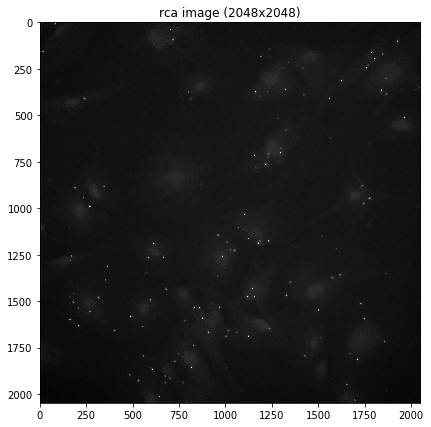

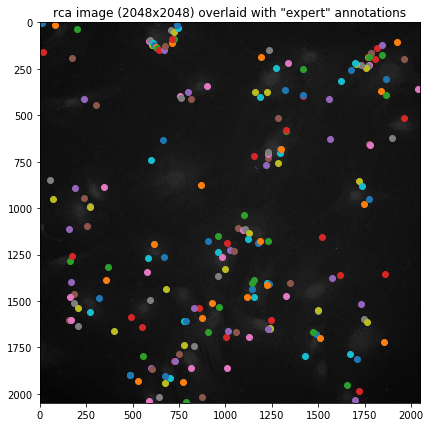

In [8]:
from skimage.io import imread
from skimage.color import rgb2gray

fig = plt.figure(figsize = (12,7))
im = imread('rca.png')
im = rgb2gray(im)
plt.imshow(im, cmap='gray')
plt.title('rca image (2048x2048)')
plt.show()

fig = plt.figure(figsize = (12,7))
coords = np.genfromtxt('rca_coords.csv', delimiter=',')
for x, y in coords:
    plt.scatter(x, y)
plt.ylim(0,2048)
plt.gca().invert_yaxis()
im = imread('rca.png')
plt.imshow(im, cmap='gray')
plt.title('rca image (2048x2048) overlaid with "expert" annotations')
plt.show()

## Fit a 2D gaussian to each spot.

Find gaussian fit parameters as in the scipy example here: https://scipy-cookbook.readthedocs.io/items/FittingData.html. Show that these parameters produce reasonable reconstructed spots.

204 spots found by expert:


---------------------------------------------------

x: 14.067
y: 6.1475
sigma_min: 1.0317860533558112
sigma_max: 1.033957326378055
height: 222.02146359091316
max_intensity: 255


Original crop around spot at (14, 6):


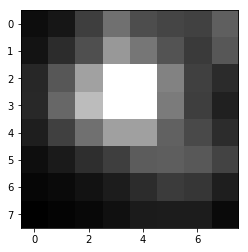

Spot reconstructed from gaussian fit parameters using sigma_min:


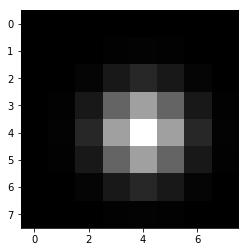

Spot reconstructed from gaussian fit parameters using sigma_max:


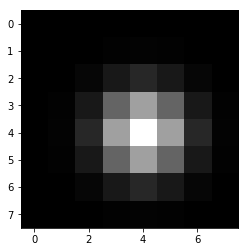

Original crop
[[ 31  40  77 123  90  83  80 107]
 [ 37  60  92 160 128  96  73 100]
 [ 55 100 168 255 255 139  78  59]
 [ 57 114 193 255 255 133  77  49]
 [ 47  78 123 167 167 110  88  61]
 [ 32  43  62  77 104 106 101  81]
 [ 25  29  36  45  61  74  69  47]
 [ 19  23  27  34  44  45  45  29]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  24  38  24   5   0]
 [  0   2  24  99 159  99  24   2]
 [  0   3  38 159 255 159  38   3]
 [  0   2  24  99 159  99  24   2]
 [  0   0   5  24  38  24   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   6  24  39  24   6   0]
 [  0   2  24 100 159 100  24   2]
 [  0   3  39 159 255 159  39   3]
 [  0   2  24 100 159 100  24   2]
 [  0   0   6  24  39  24   6   0]
 [  0   0   0   2   3   2   0   0]]

---------------------------------------------------

x: 82.963
y: 12.483
sigma_min

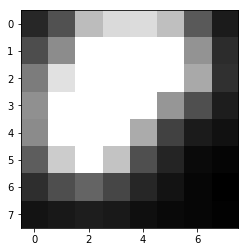

Spot reconstructed from gaussian fit parameters using sigma_min:


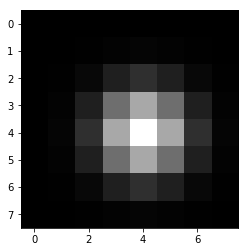

Spot reconstructed from gaussian fit parameters using sigma_max:


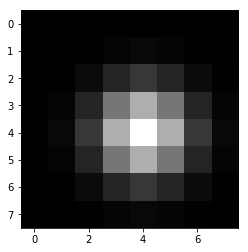

Original crop
[[ 54  93 192 220 222 195 101  43]
 [ 89 148 255 255 255 255 155  59]
 [133 227 255 255 255 255 175  62]
 [151 255 255 255 255 157  91  44]
 [147 255 255 255 176  78  43  33]
 [104 207 255 200  91  52  27  22]
 [ 60  90 110  83  53  35  23  17]
 [ 35  40  44  41  31  26  23  19]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   8  31  47  31   8   1]
 [  0   3  31 110 167 110  31   3]
 [  0   5  47 167 255 167  47   5]
 [  0   3  31 110 167 110  31   3]
 [  0   1   8  31  47  31   8   1]
 [  0   0   1   3   5   3   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   8   5   1   0]
 [  0   1  11  37  54  37  11   1]
 [  0   5  37 118 173 118  37   5]
 [  0   8  54 173 255 173  54   8]
 [  0   5  37 118 173 118  37   5]
 [  0   1  11  37  54  37  11   1]
 [  0   0   1   5   8   5   1   0]]

---------------------------------------------------

x: 200.96
y: 33.865
sigma_min

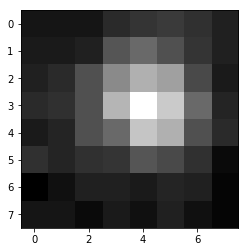

Spot reconstructed from gaussian fit parameters using sigma_min:


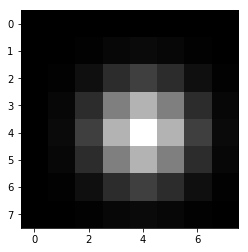

Spot reconstructed from gaussian fit parameters using sigma_max:


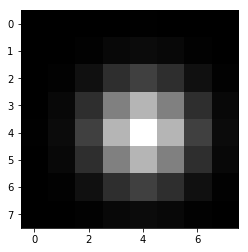

Original crop
[[18 18 18 22 24 25 23 20]
 [19 19 20 30 34 29 24 20]
 [20 22 29 40 47 44 28 19]
 [22 23 29 48 62 52 34 21]
 [19 21 29 34 51 47 29 22]
 [23 21 23 24 30 28 23 16]
 [14 17 20 20 19 21 20 15]
 [18 18 16 19 17 20 17 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  1 10 30 43 30 10  1]
 [ 0  2 15 43 62 43 15  2]
 [ 0  1 10 30 43 30 10  1]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2  0  0]
 [ 0  0  3 11 15 11  3  0]
 [ 0  2 11 31 43 31 11  2]
 [ 0  2 15 43 62 43 15  2]
 [ 0  2 11 31 43 31 11  2]
 [ 0  0  3 11 15 11  3  0]
 [ 0  0  0  2  2  2  0  0]]

---------------------------------------------------

x: 17.234
y: 160.57
sigma_min: 0.9758819564262846
sigma_max: 1.0851342219920799
height: 277.2010209570637
max_intensity: 255


Original crop around spot at (17, 160):


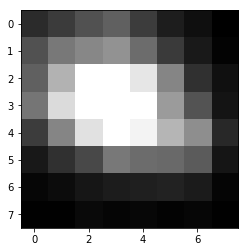

Spot reconstructed from gaussian fit parameters using sigma_min:


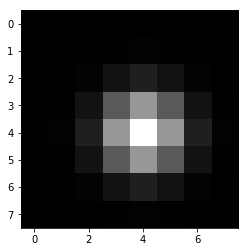

Spot reconstructed from gaussian fit parameters using sigma_max:


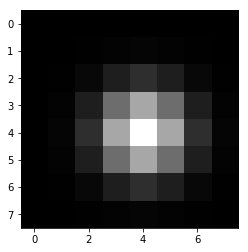

Original crop
[[ 67  81 100 114  82  54  42  28]
 [100 135 148 158 124  80  51  31]
 [114 186 255 255 232 146  72  43]
 [132 223 255 255 255 166 102  46]
 [ 82 146 228 255 244 189 154  64]
 [ 50  72  92 135 124 122 109  47]
 [ 34  39  48  53  56  59  52  33]
 [ 29  29  36  33  35  31  34  29]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  18  31  18   3   0]
 [  0   1  18  89 150  89  18   1]
 [  0   2  31 150 255 150  31   2]
 [  0   1  18  89 150  89  18   1]
 [  0   0   3  18  31  18   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   8  30  46  30   8   1]
 [  0   3  30 109 166 109  30   3]
 [  0   5  46 166 255 166  46   5]
 [  0   3  30 109 166 109  30   3]
 [  0   1   8  30  46  30   8   1]
 [  0   0   1   3   5   3   1   0]]

---------------------------------------------------

x: 239.76
y: 413.19
sigma_min

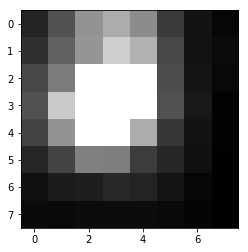

Spot reconstructed from gaussian fit parameters using sigma_min:


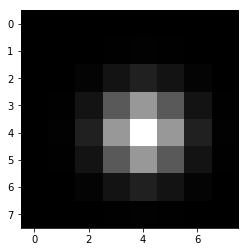

Spot reconstructed from gaussian fit parameters using sigma_max:


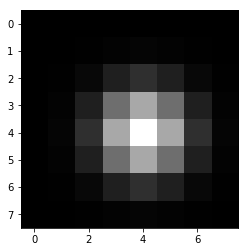

Original crop
[[ 66 104 161 183 155  85  51  40]
 [ 77 117 163 212 188  96  50  44]
 [ 96 141 255 255 255 101  52  41]
 [104 208 255 255 255 105  55  36]
 [ 92 162 255 255 183  82  50  37]
 [ 67  93 145 143  87  67  48  35]
 [ 48  59  60  69  65  52  40  35]
 [ 43  41  45  45  45  42  39  34]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  18  31  18   3   0]
 [  0   1  18  90 151  90  18   1]
 [  0   2  31 151 255 151  31   2]
 [  0   1  18  90 151  90  18   1]
 [  0   0   3  18  31  18   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   8  31  47  31   8   1]
 [  0   3  31 109 167 109  31   3]
 [  0   5  47 167 255 167  47   5]
 [  0   3  31 109 167 109  31   3]
 [  0   1   8  31  47  31   8   1]
 [  0   0   1   3   5   3   1   0]]

---------------------------------------------------

x: 303.12
y: 443.29
sigma_min

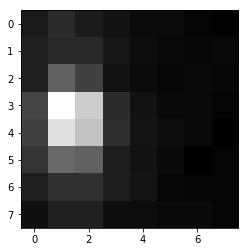

Spot reconstructed from gaussian fit parameters using sigma_min:


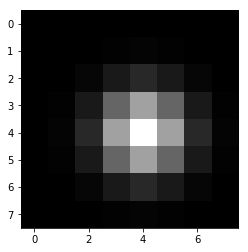

Spot reconstructed from gaussian fit parameters using sigma_max:


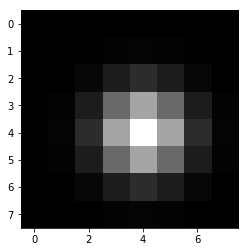

Original crop
[[ 27  35  28  24  21  21  18  17]
 [ 30  34  34  26  22  20  19  20]
 [ 30  58  44  24  21  19  20  19]
 [ 46 126 104  35  24  20  20  18]
 [ 44 112  99  36  25  22  20  16]
 [ 39  61  58  29  24  20  16  18]
 [ 30  37  37  29  25  19  18  18]
 [ 23  30  30  22  22  20  20  18]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   3  12  19  12   3   0]
 [  0   1  12  50  79  50  12   1]
 [  0   1  19  79 126  79  19   1]
 [  0   1  12  50  79  50  12   1]
 [  0   0   3  12  19  12   3   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  14  21  14   3   0]
 [  0   1  14  52  81  52  14   1]
 [  0   2  21  81 126  81  21   2]
 [  0   1  14  52  81  52  14   1]
 [  0   0   3  14  21  14   3   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 588.23
y: 99.487
sigma_min

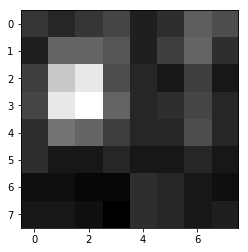

Spot reconstructed from gaussian fit parameters using sigma_min:


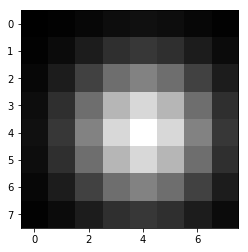

Spot reconstructed from gaussian fit parameters using sigma_max:


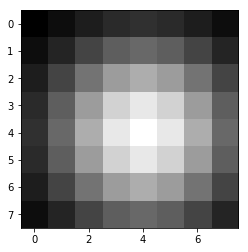

Original crop
[[35 33 35 37 32 34 40 38]
 [32 41 41 39 32 36 41 34]
 [36 54 58 38 33 31 36 31]
 [37 58 61 41 33 34 37 33]
 [34 43 41 36 33 33 38 33]
 [34 31 31 33 31 31 33 31]
 [30 30 29 29 34 33 31 30]
 [31 31 30 28 34 33 31 32]]
Reconstructed using sigma min
[[ 0  0  2  3  4  3  2  0]
 [ 0  3  6 11 13 11  6  3]
 [ 2  6 16 26 31 26 16  6]
 [ 3 11 26 43 51 43 26 11]
 [ 4 13 31 51 61 51 31 13]
 [ 3 11 26 43 51 43 26 11]
 [ 2  6 16 26 31 26 16  6]
 [ 0  3  6 11 13 11  6  3]]
Reconstructed using sigma max
[[ 3  6  9 12 14 12  9  6]
 [ 6 11 18 24 26 24 18 11]
 [ 9 18 29 38 42 38 29 18]
 [12 24 38 50 55 50 38 24]
 [14 26 42 55 61 55 42 26]
 [12 24 38 50 55 50 38 24]
 [ 9 18 29 38 42 38 29 18]
 [ 6 11 18 24 26 24 18 11]]

---------------------------------------------------

x: 595.37
y: 93.139
sigma_min: 1.3243962732725973
sigma_max: 3.503587969449063
height: 4834.84060734603
max_intensity: 133


Original crop around spot at (595, 93):


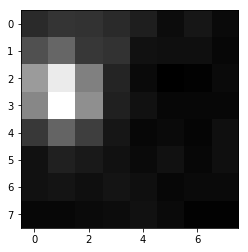

Spot reconstructed from gaussian fit parameters using sigma_min:


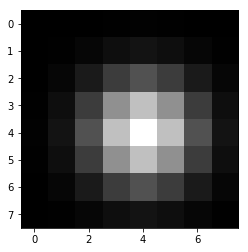

Spot reconstructed from gaussian fit parameters using sigma_max:


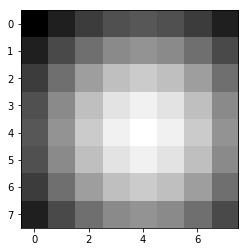

Original crop
[[ 48  52  51  48  43  36  40  35]
 [ 63  72  53  51  38  37  37  34]
 [ 93 125  82  46  35  31  32  35]
 [ 85 133  88  44  38  34  34  34]
 [ 54  71  56  40  34  35  33  37]
 [ 38  44  41  38  35  38  34  37]
 [ 38  39  37  39  37  34  35  35]
 [ 34  34  35  36  38  35  32  32]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   7  10   7   3   0]
 [  0   3  13  31  42  31  13   3]
 [  1   7  31  75 100  75  31   7]
 [  1  10  42 100 133 100  42  10]
 [  1   7  31  75 100  75  31   7]
 [  0   3  13  31  42  31  13   3]
 [  0   0   3   7  10   7   3   0]]
Reconstructed using sigma max
[[ 36  48  58  66  69  66  58  48]
 [ 48  63  78  88  92  88  78  63]
 [ 58  78  96 108 113 108  96  78]
 [ 66  88 108 122 127 122 108  88]
 [ 69  92 113 127 133 127 113  92]
 [ 66  88 108 122 127 122 108  88]
 [ 58  78  96 108 113 108  96  78]
 [ 48  63  78  88  92  88  78  63]]

---------------------------------------------------

x: 604.89
y: 120.12
sigma_min

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


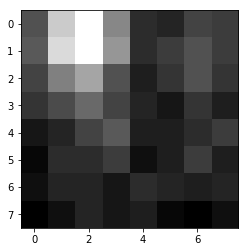

Spot reconstructed from gaussian fit parameters using sigma_min:


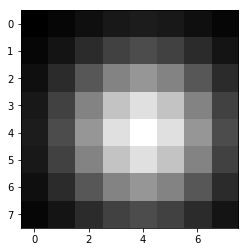

Spot reconstructed from gaussian fit parameters using sigma_max:


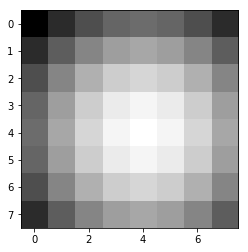

Original crop
[[36 52 59 43 31 30 34 33]
 [37 54 59 45 31 33 36 33]
 [34 42 47 36 29 32 36 32]
 [32 35 39 34 30 28 32 29]
 [28 30 34 37 29 29 31 33]
 [26 31 31 33 27 29 33 29]
 [27 30 30 28 31 30 29 30]
 [25 27 30 28 29 26 25 27]]
Reconstructed using sigma min
[[ 0  2  4  6  7  6  4  2]
 [ 2  5 10 16 18 16 10  5]
 [ 4 10 20 30 35 30 20 10]
 [ 6 16 30 45 51 45 30 16]
 [ 7 18 35 51 59 51 35 18]
 [ 6 16 30 45 51 45 30 16]
 [ 4 10 20 30 35 30 20 10]
 [ 2  5 10 16 18 16 10  5]]
Reconstructed using sigma max
[[32 36 40 42 43 42 40 36]
 [36 42 46 48 49 48 46 42]
 [40 46 50 53 54 53 50 46]
 [42 48 53 56 57 56 53 48]
 [43 49 54 57 59 57 54 49]
 [42 48 53 56 57 56 53 48]
 [40 46 50 53 54 53 50 46]
 [36 42 46 48 49 48 46 42]]

---------------------------------------------------

x: 612.03
y: 112.97
sigma_min: 1.379077434416216
sigma_max: 2.4786941180649853
height: 81.38873676021991
max_intensity: 94


Original crop around spot at (612, 112):


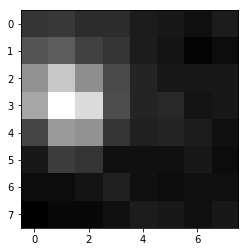

Spot reconstructed from gaussian fit parameters using sigma_min:


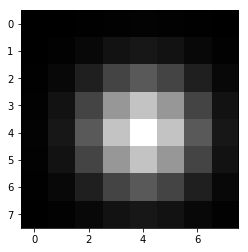

Spot reconstructed from gaussian fit parameters using sigma_max:


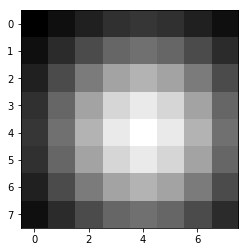

Original crop
[[44 45 42 42 38 37 35 38]
 [52 54 47 44 38 36 32 34]
 [67 80 66 49 40 37 37 37]
 [72 94 85 50 40 41 36 37]
 [48 69 67 44 39 40 38 35]
 [37 46 44 35 35 35 37 34]
 [34 34 36 39 35 34 35 35]
 [31 33 33 35 38 37 35 37]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  3  6  8  6  3  0]
 [ 0  3 11 25 32 25 11  3]
 [ 1  6 25 55 72 55 25  6]
 [ 1  8 32 72 94 72 32  8]
 [ 1  6 25 55 72 55 25  6]
 [ 0  3 11 25 32 25 11  3]
 [ 0  0  3  6  8  6  3  0]]
Reconstructed using sigma max
[[ 6 12 18 23 25 23 18 12]
 [12 21 32 41 45 41 32 21]
 [18 32 49 62 67 62 49 32]
 [23 41 62 79 86 79 62 41]
 [25 45 67 86 94 86 67 45]
 [23 41 62 79 86 79 62 41]
 [18 32 49 62 67 62 49 32]
 [12 21 32 41 45 41 32 21]]

---------------------------------------------------

x: 616.0
y: 122.5
sigma_min: 1.7042422534473987
sigma_max: 2.023360058523137
height: 44.24643039308156
max_intensity: 73


Original crop around spot at (616, 122):


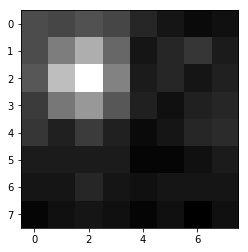

Spot reconstructed from gaussian fit parameters using sigma_min:


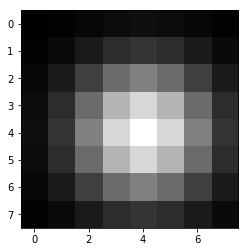

Spot reconstructed from gaussian fit parameters using sigma_max:


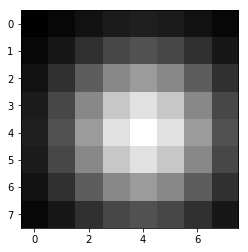

Original crop
[[40 39 41 39 33 30 28 29]
 [40 49 58 45 30 33 36 31]
 [42 61 73 50 31 33 30 32]
 [37 48 54 42 32 29 32 33]
 [36 32 37 32 28 30 33 34]
 [31 31 31 31 27 27 29 31]
 [30 30 33 30 29 30 30 30]
 [27 29 30 29 27 29 26 29]]
Reconstructed using sigma min
[[ 0  0  2  3  4  3  2  0]
 [ 0  3  7 13 15 13  7  3]
 [ 2  7 18 30 36 30 18  7]
 [ 3 13 30 51 61 51 30 13]
 [ 4 15 36 61 73 61 36 15]
 [ 3 13 30 51 61 51 30 13]
 [ 2  7 18 30 36 30 18  7]
 [ 0  3  7 13 15 13  7  3]]
Reconstructed using sigma max
[[ 1  3  6  9 10  9  6  3]
 [ 3  8 14 21 24 21 14  8]
 [ 6 14 27 39 44 39 27 14]
 [ 9 21 39 57 64 57 39 21]
 [10 24 44 64 73 64 44 24]
 [ 9 21 39 57 64 57 39 21]
 [ 6 14 27 39 44 39 27 14]
 [ 3  8 14 21 24 21 14  8]]

---------------------------------------------------

x: 624.73
y: 132.02
sigma_min: 1.3482453294203849
sigma_max: 1.353051691876798
height: 59.604527390471524
max_intensity: 94


Original crop around spot at (624, 132):


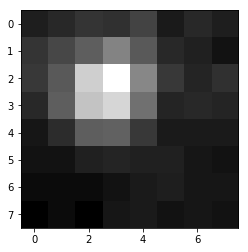

Spot reconstructed from gaussian fit parameters using sigma_min:


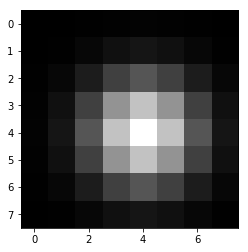

Spot reconstructed from gaussian fit parameters using sigma_max:


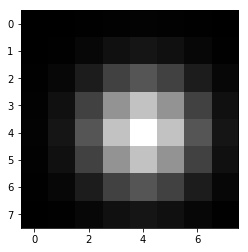

Original crop
[[34 37 40 39 44 33 37 34]
 [40 45 51 61 50 37 35 31]
 [41 50 81 94 62 41 36 39]
 [37 51 78 83 56 36 37 36]
 [32 38 51 52 41 33 33 33]
 [31 31 35 36 35 35 32 31]
 [29 29 29 31 33 34 32 32]
 [26 29 26 32 33 31 32 31]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  6  7  6  2  0]
 [ 0  2 10 23 31 23 10  2]
 [ 0  6 23 54 71 54 23  6]
 [ 1  7 31 71 94 71 31  7]
 [ 0  6 23 54 71 54 23  6]
 [ 0  2 10 23 31 23 10  2]
 [ 0  0  2  6  7  6  2  0]]
Reconstructed using sigma max
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  6  8  6  2  0]
 [ 0  2 10 23 31 23 10  2]
 [ 0  6 23 54 71 54 23  6]
 [ 1  8 31 71 94 71 31  8]
 [ 0  6 23 54 71 54 23  6]
 [ 0  2 10 23 31 23 10  2]
 [ 0  0  2  6  8  6  2  0]]

---------------------------------------------------

x: 629.49
y: 139.95
sigma_min: 1.578964155017658
sigma_max: 7.513074750044503
height: 6374.628248727809
max_intensity: 66


Original crop around spot at (629, 139):


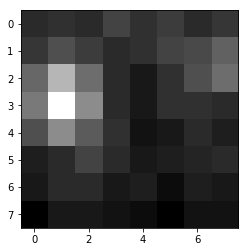

Spot reconstructed from gaussian fit parameters using sigma_min:


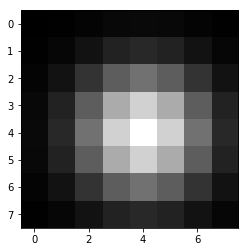

Spot reconstructed from gaussian fit parameters using sigma_max:


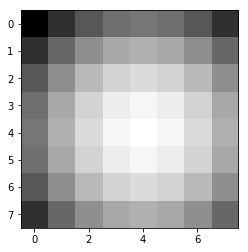

Original crop
[[31 32 31 35 32 34 31 33]
 [33 37 34 31 32 35 36 40]
 [41 54 42 31 28 32 37 42]
 [44 66 47 31 28 32 32 31]
 [37 47 39 32 27 28 31 29]
 [29 31 35 31 28 29 30 31]
 [28 31 31 28 29 26 29 28]
 [24 28 28 27 26 24 27 27]]
Reconstructed using sigma min
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  4  8 10  8  4  1]
 [ 1  4 13 24 29 24 13  4]
 [ 2  8 24 44 54 44 24  8]
 [ 2 10 29 54 66 54 29 10]
 [ 2  8 24 44 54 44 24  8]
 [ 1  4 13 24 29 24 13  4]
 [ 0  1  4  8 10  8  4  1]]
Reconstructed using sigma max
[[49 52 55 56 57 56 55 52]
 [52 56 58 60 60 60 58 56]
 [55 58 61 63 63 63 61 58]
 [56 60 63 64 65 64 63 60]
 [57 60 63 65 66 65 63 60]
 [56 60 63 64 65 64 63 60]
 [55 58 61 63 63 63 61 58]
 [52 56 58 60 60 60 58 56]]

---------------------------------------------------

x: 641.39
y: 147.88
sigma_min: 1.6079947569512834
sigma_max: 5.864919497583022
height: 5164.8451538188165
max_intensity: 58


Original crop around spot at (641, 147):


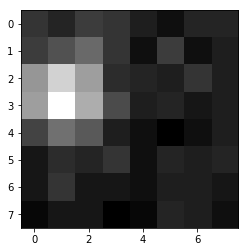

Spot reconstructed from gaussian fit parameters using sigma_min:


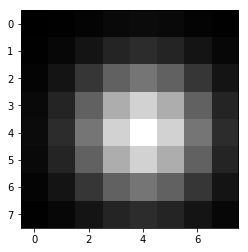

Spot reconstructed from gaussian fit parameters using sigma_max:


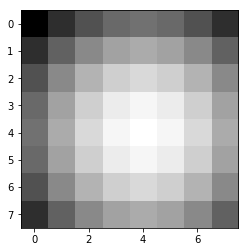

Original crop
[[31 29 32 31 28 26 29 29]
 [32 35 38 31 26 32 26 28]
 [44 52 45 30 29 28 31 28]
 [45 58 47 34 28 29 27 28]
 [33 39 36 28 26 24 26 28]
 [27 30 29 31 26 29 28 29]
 [27 31 27 27 26 28 28 27]
 [25 27 27 24 25 29 28 26]]
Reconstructed using sigma min
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  4  8 10  8  4  1]
 [ 1  4 12 22 26 22 12  4]
 [ 2  8 22 39 47 39 22  8]
 [ 2 10 26 47 58 47 26 10]
 [ 2  8 22 39 47 39 22  8]
 [ 1  4 12 22 26 22 12  4]
 [ 0  1  4  8 10  8  4  1]]
Reconstructed using sigma max
[[36 40 43 45 45 45 43 40]
 [40 44 48 50 50 50 48 44]
 [43 48 51 53 54 53 51 48]
 [45 50 53 56 57 56 53 50]
 [45 50 54 57 58 57 54 50]
 [45 50 53 56 57 56 53 50]
 [43 48 51 53 54 53 51 48]
 [40 44 48 50 50 50 48 44]]

---------------------------------------------------

x: 669.16
y: 151.85
sigma_min: 1.6049885815373637
sigma_max: 1.6306173822052015
height: 41.10741165478812
max_intensity: 68


Original crop around spot at (669, 151):


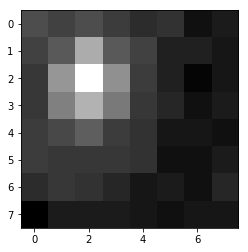

Spot reconstructed from gaussian fit parameters using sigma_min:


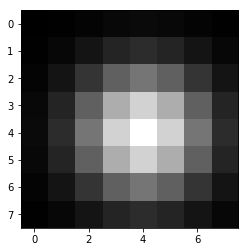

Spot reconstructed from gaussian fit parameters using sigma_max:


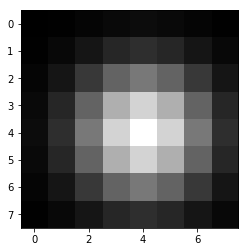

Original crop
[[36 34 36 33 30 31 25 27]
 [34 38 53 38 34 28 28 26]
 [32 49 68 48 33 28 23 26]
 [32 45 54 44 32 29 25 27]
 [33 35 39 33 31 26 26 25]
 [33 32 32 32 31 25 25 27]
 [30 32 31 29 26 27 25 29]
 [22 27 27 27 26 25 26 26]]
Reconstructed using sigma min
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  5  9 11  9  5  2]
 [ 1  5 14 25 31 25 14  5]
 [ 2  9 25 46 56 46 25  9]
 [ 3 11 31 56 68 56 31 11]
 [ 2  9 25 46 56 46 25  9]
 [ 1  5 14 25 31 25 14  5]
 [ 0  2  5  9 11  9  5  2]]
Reconstructed using sigma max
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  5 10 12 10  5  2]
 [ 1  5 15 26 32 26 15  5]
 [ 2 10 26 46 56 46 26 10]
 [ 3 12 32 56 68 56 32 12]
 [ 2 10 26 46 56 46 26 10]
 [ 1  5 15 26 32 26 15  5]
 [ 0  2  5 10 12 10  5  2]]

---------------------------------------------------

x: 673.92
y: 127.26
sigma_min: 1.0137021062539622
sigma_max: 1.1600955692047346
height: 115.96862135278164
max_intensity: 187


Original crop around spot at (673, 127):


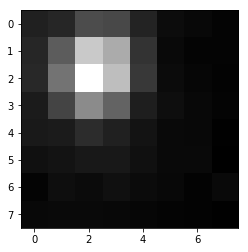

Spot reconstructed from gaussian fit parameters using sigma_min:


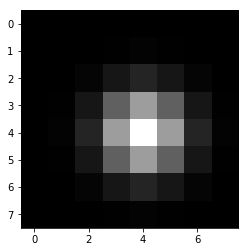

Spot reconstructed from gaussian fit parameters using sigma_max:


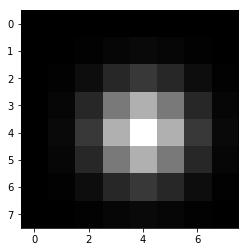

Original crop
[[ 47  51  75  72  49  35  32  30]
 [ 51  85 153 134  59  33  30  30]
 [ 52  99 187 146  63  34  31  29]
 [ 44  70 114  89  46  36  32  30]
 [ 43  44  55  48  39  33  32  28]
 [ 37  39  42  42  37  33  33  27]
 [ 30  36  34  37  34  32  29  33]
 [ 32  33  33  32  31  30  29  28]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  16  26  16   3   0]
 [  0   1  16  70 114  70  16   1]
 [  0   2  26 114 187 114  26   2]
 [  0   1  16  70 114  70  16   1]
 [  0   0   3  16  26  16   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  29  42  29   9   1]
 [  0   4  29  88 128  88  29   4]
 [  0   6  42 128 187 128  42   6]
 [  0   4  29  88 128  88  29   4]
 [  0   1   9  29  42  29   9   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 717.56
y: 97.9
sigma_min: 

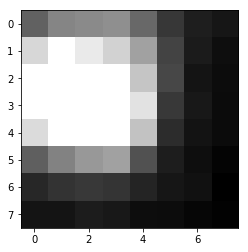

Spot reconstructed from gaussian fit parameters using sigma_min:


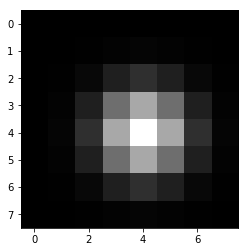

Spot reconstructed from gaussian fit parameters using sigma_max:


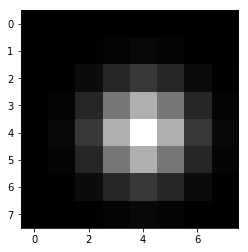

Original crop
[[117 148 153 157 123  80  59  52]
 [220 255 236 215 173  91  56  45]
 [255 255 255 255 204  94  50  43]
 [255 255 255 255 229  82  53  42]
 [223 255 255 255 201  71  49  42]
 [115 146 165 173 103  58  45  36]
 [ 66  77  82  79  64  52  47  32]
 [ 50  50  57  53  44  43  38  34]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   8  31  47  31   8   1]
 [  0   3  31 109 167 109  31   3]
 [  0   5  47 167 255 167  47   5]
 [  0   3  31 109 167 109  31   3]
 [  0   1   8  31  47  31   8   1]
 [  0   0   1   3   5   3   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   8   5   1   0]
 [  0   1  12  38  55  38  12   1]
 [  0   5  38 119 174 119  38   5]
 [  0   8  55 174 255 174  55   8]
 [  0   5  38 119 174 119  38   5]
 [  0   1  12  38  55  38  12   1]
 [  0   0   1   5   8   5   1   0]]

---------------------------------------------------

x: 704.86
y: 42.361
sigma_min

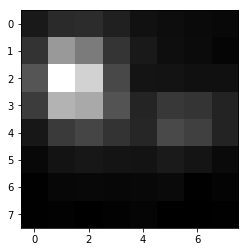

Spot reconstructed from gaussian fit parameters using sigma_min:


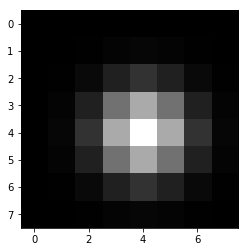

Spot reconstructed from gaussian fit parameters using sigma_max:


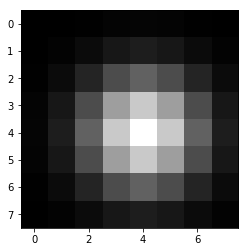

Original crop
[[ 50  62  64  55  45  42  40  39]
 [ 68 137 117  69  50  43  41  37]
 [ 91 207 176  82  47  46  44  44]
 [ 74 155 148  90  58  72  69  57]
 [ 49  73  80  68  59  83  77  57]
 [ 39  46  49  47  46  51  47  40]
 [ 34  38  39  38  39  40  34  36]
 [ 34  35  33  35  37  33  33  34]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   8  27  40  27   8   1]
 [  0   3  27  91 137  91  27   3]
 [  0   5  40 137 207 137  40   5]
 [  0   3  27  91 137  91  27   3]
 [  0   1   8  27  40  27   8   1]
 [  0   0   1   3   5   3   1   0]]
Reconstructed using sigma max
[[  0   0   1   3   4   3   1   0]
 [  0   2   9  18  23  18   9   2]
 [  1   9  30  62  79  62  30   9]
 [  3  18  62 127 162 127  62  18]
 [  4  23  79 162 207 162  79  23]
 [  3  18  62 127 162 127  62  18]
 [  1   9  30  62  79  62  30   9]
 [  0   2   9  18  23  18   9   2]]

---------------------------------------------------

x: 722.32
y: 50.295
sigma_min

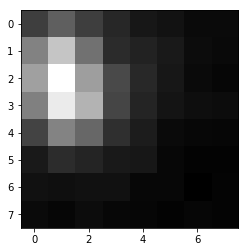

Spot reconstructed from gaussian fit parameters using sigma_min:


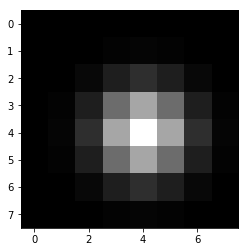

Spot reconstructed from gaussian fit parameters using sigma_max:


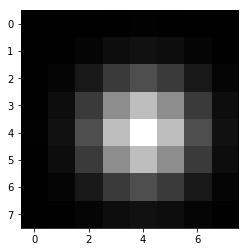

Original crop
[[ 65  86  65  50  40  37  32  32]
 [108 151  98  53  47  41  33  31]
 [127 188 126  72  51  40  32  29]
 [107 175 139  69  48  38  34  33]
 [ 68 109  91  55  43  32  30  29]
 [ 41  54  49  41  40  30  27  27]
 [ 36  35  36  36  30  30  25  28]
 [ 32  29  33  30  29  27  29  28]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  22  33  22   6   0]
 [  0   2  22  79 122  79  22   2]
 [  0   4  33 122 188 122  33   4]
 [  0   2  22  79 122  79  22   2]
 [  0   0   6  22  33  22   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   4   9  13   9   4   0]
 [  0   4  17  42  57  42  17   4]
 [  1   9  42 104 139 104  42   9]
 [  1  13  57 139 188 139  57  13]
 [  1   9  42 104 139 104  42   9]
 [  0   4  17  42  57  42  17   4]
 [  0   0   4   9  13   9   4   0]]

---------------------------------------------------

x: 742.15
y: 32.046
sigma_min

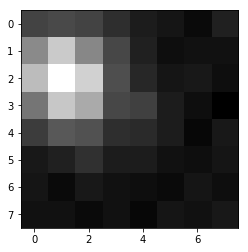

Spot reconstructed from gaussian fit parameters using sigma_min:


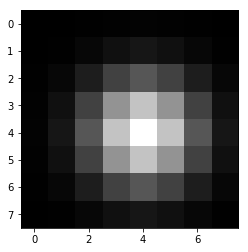

Spot reconstructed from gaussian fit parameters using sigma_max:


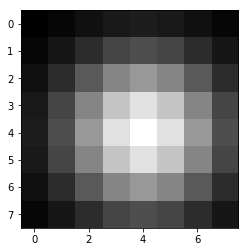

Original crop
[[44 46 44 38 33 31 28 34]
 [64 82 63 45 34 29 30 30]
 [78 97 84 47 36 31 32 29]
 [58 81 73 45 43 33 29 25]
 [42 50 48 38 37 33 27 32]
 [32 34 39 33 33 30 29 31]
 [31 28 32 30 29 28 31 29]
 [30 30 28 30 27 31 30 32]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  6  8  6  2  0]
 [ 0  2 11 24 32 24 11  2]
 [ 0  6 24 56 73 56 24  6]
 [ 1  8 32 73 97 73 32  8]
 [ 0  6 24 56 73 56 24  6]
 [ 0  2 11 24 32 24 11  2]
 [ 0  0  2  6  8  6  2  0]]
Reconstructed using sigma max
[[ 1  4  7 11 12 11  7  4]
 [ 4  9 18 27 31 27 18  9]
 [ 7 18 35 51 58 51 35 18]
 [11 27 51 75 85 75 51 27]
 [12 31 58 85 97 85 58 31]
 [11 27 51 75 85 75 51 27]
 [ 7 18 35 51 58 51 35 18]
 [ 4  9 18 27 31 27 18  9]]

---------------------------------------------------

x: 738.18
y: 13.004
sigma_min: 1.6108134133312475
sigma_max: 1.9255986400353151
height: 45.746963773257356
max_intensity: 64


Original crop around spot at (738, 13):


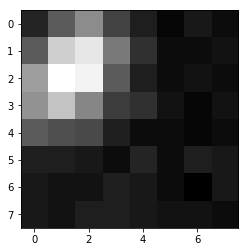

Spot reconstructed from gaussian fit parameters using sigma_min:


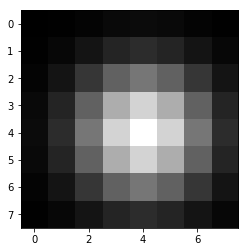

Spot reconstructed from gaussian fit parameters using sigma_max:


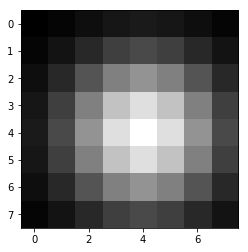

Original crop
[[28 37 45 33 27 23 26 24]
 [37 56 60 42 30 24 24 25]
 [48 64 62 37 27 24 25 24]
 [46 54 44 32 30 25 23 25]
 [37 35 34 27 24 24 23 24]
 [27 27 26 24 28 24 27 26]
 [26 25 25 27 26 24 22 26]
 [26 25 27 27 26 25 25 24]]
Reconstructed using sigma min
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  5  9 11  9  5  1]
 [ 1  5 13 24 29 24 13  5]
 [ 2  9 24 43 52 43 24  9]
 [ 2 11 29 52 64 52 29 11]
 [ 2  9 24 43 52 43 24  9]
 [ 1  5 13 24 29 24 13  5]
 [ 0  1  5  9 11  9  5  1]]
Reconstructed using sigma max
[[ 0  2  4  6  7  6  4  2]
 [ 2  5 11 16 19 16 11  5]
 [ 4 11 21 32 37 32 21 11]
 [ 6 16 32 48 55 48 32 16]
 [ 7 19 37 55 64 55 37 19]
 [ 6 16 32 48 55 48 32 16]
 [ 4 11 21 32 37 32 21 11]
 [ 2  5 11 16 19 16 11  5]]

---------------------------------------------------

x: 710.41
y: 112.97
sigma_min: 1.3516983686701864
sigma_max: 1.3821028812938065
height: 62.05905687868734
max_intensity: 81


Original crop around spot at (710, 112):


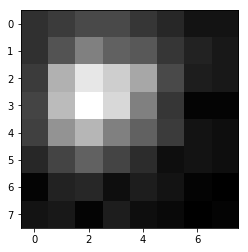

Spot reconstructed from gaussian fit parameters using sigma_min:


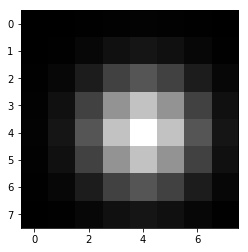

Spot reconstructed from gaussian fit parameters using sigma_max:


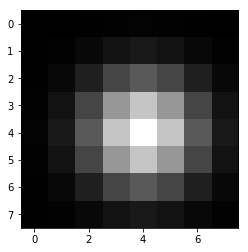

Original crop
[[39 41 44 44 40 37 33 33]
 [39 46 55 49 47 40 36 34]
 [41 65 76 71 63 44 35 34]
 [43 67 81 73 55 40 30 30]
 [42 59 66 55 49 41 33 32]
 [37 43 49 43 38 32 33 32]
 [30 36 37 32 35 33 30 29]
 [33 34 30 35 32 31 29 30]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  6  5  2  0]
 [ 0  2  9 20 27 20  9  2]
 [ 0  5 20 46 61 46 20  5]
 [ 1  6 27 61 81 61 27  6]
 [ 0  5 20 46 61 46 20  5]
 [ 0  2  9 20 27 20  9  2]
 [ 0  0  2  5  6  5  2  0]]
Reconstructed using sigma max
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  7  5  2  0]
 [ 0  2  9 21 28 21  9  2]
 [ 0  5 21 47 62 47 21  5]
 [ 1  7 28 62 81 62 28  7]
 [ 0  5 21 47 62 47 21  5]
 [ 0  2  9 21 28 21  9  2]
 [ 0  0  2  5  7  5  2  0]]

---------------------------------------------------

x: 721.52
y: 88.379
sigma_min: 1.5077052943874893
sigma_max: 1.5670586822303838
height: 73.95053492028936
max_intensity: 125


Original crop around spot at (721, 88):


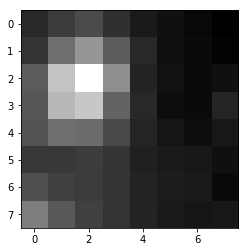

Spot reconstructed from gaussian fit parameters using sigma_min:


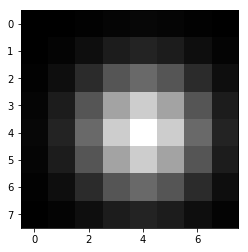

Spot reconstructed from gaussian fit parameters using sigma_max:


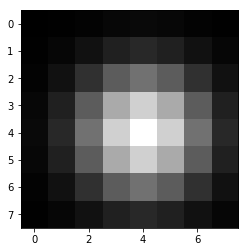

Original crop
[[ 45  52  58  48  40  36  33  30]
 [ 49  71  86  64  45  36  34  31]
 [ 64 103 125  83  43  37  34  36]
 [ 62  98 104  67  45  35  34  44]
 [ 61  71  70  57  44  38  35  39]
 [ 51  51  53  50  42  40  39  36]
 [ 60  54  52  49  43  41  40  34]
 [ 77  63  54  49  43  40  38  39]]
Reconstructed using sigma min
[[  0   0   1   2   3   2   1   0]
 [  0   2   7  13  17  13   7   2]
 [  1   7  21  41  51  41  21   7]
 [  2  13  41  80 100  80  41  13]
 [  3  17  51 100 125 100  51  17]
 [  2  13  41  80 100  80  41  13]
 [  1   7  21  41  51  41  21   7]
 [  0   2   7  13  17  13   7   2]]
Reconstructed using sigma max
[[  0   0   2   3   4   3   2   0]
 [  0   3   8  16  20  16   8   3]
 [  2   8  24  45  55  45  24   8]
 [  3  16  45  83 101  83  45  16]
 [  4  20  55 101 125 101  55  20]
 [  3  16  45  83 101  83  45  16]
 [  2   8  24  45  55  45  24   8]
 [  0   3   8  16  20  16   8   3]]

---------------------------------------------------

x: 713.59
y: 87.585
sigma_min

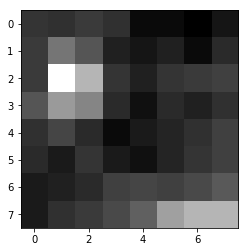

Spot reconstructed from gaussian fit parameters using sigma_min:


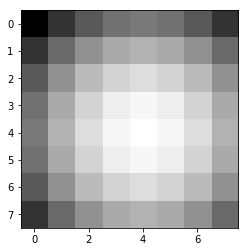

Spot reconstructed from gaussian fit parameters using sigma_max:


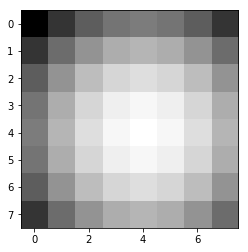

Original crop
[[44 43 45 43 36 36 34 38]
 [45 56 50 40 38 40 36 42]
 [45 82 68 44 40 44 45 46]
 [50 63 59 42 37 42 40 43]
 [43 47 42 36 39 41 43 46]
 [42 39 44 39 37 41 44 46]
 [39 40 42 46 47 46 48 51]
 [39 43 45 48 52 64 68 68]]
Reconstructed using sigma min
[[66 69 72 73 74 73 72 69]
 [69 73 75 76 77 76 75 73]
 [72 75 77 79 79 79 77 75]
 [73 76 79 80 81 80 79 76]
 [74 77 79 81 82 81 79 77]
 [73 76 79 80 81 80 79 76]
 [72 75 77 79 79 79 77 75]
 [69 73 75 76 77 76 75 73]]
Reconstructed using sigma max
[[74 75 77 77 78 77 77 75]
 [75 77 78 79 79 79 78 77]
 [77 78 79 80 80 80 79 78]
 [77 79 80 81 81 81 80 79]
 [78 79 80 81 82 81 80 79]
 [77 79 80 81 81 81 80 79]
 [77 78 79 80 80 80 79 78]
 [75 77 78 79 79 79 78 77]]

---------------------------------------------------

x: 800.86
y: 376.39
sigma_min: 1.0212440173894504
sigma_max: 1.0678994005952633
height: 184.01240263056405
max_intensity: 243


Original crop around spot at (800, 376):


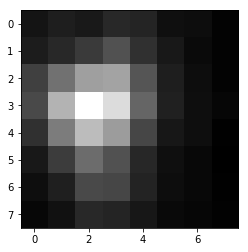

Spot reconstructed from gaussian fit parameters using sigma_min:


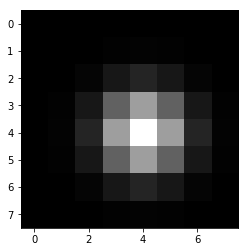

Spot reconstructed from gaussian fit parameters using sigma_max:


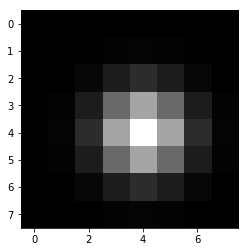

Original crop
[[ 50  58  54  66  63  46  44  36]
 [ 56  66  81 100  73  53  42  36]
 [ 86 127 164 168 103  58  44  36]
 [ 93 181 243 214 116  60  45  38]
 [ 74 135 188 161  91  52  45  34]
 [ 53  83 122 101  65  46  40  33]
 [ 45  59  93  91  62  44  40  34]
 [ 39  47  66  64  52  41  38  35]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  22  35  22   5   0]
 [  0   2  22  93 150  93  22   2]
 [  0   3  35 150 243 150  35   3]
 [  0   2  22  93 150  93  22   2]
 [  0   0   5  22  35  22   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   4   3   0   0]
 [  0   0   7  27  42  27   7   0]
 [  0   3  27 101 156 101  27   3]
 [  0   4  42 156 243 156  42   4]
 [  0   3  27 101 156 101  27   3]
 [  0   0   7  27  42  27   7   0]
 [  0   0   0   3   4   3   0   0]]

---------------------------------------------------

x: 813.56
y: 414.47
sigma_min

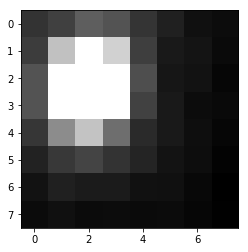

Spot reconstructed from gaussian fit parameters using sigma_min:


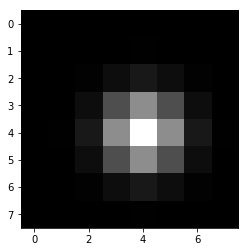

Spot reconstructed from gaussian fit parameters using sigma_max:


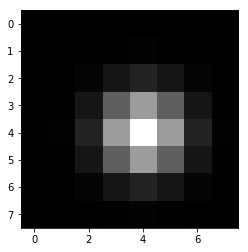

Original crop
[[ 76  87 114 104  77  60  45  42]
 [ 84 200 255 214  86  53  49  40]
 [104 255 255 255 100  51  47  37]
 [104 255 255 255  89  53  42  39]
 [ 79 154 203 128  68  53  44  37]
 [ 61  81  91  76  63  48  43  34]
 [ 47  59  55  55  46  45  38  31]
 [ 41  45  41  42  40  41  37  32]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  13  23  13   2   0]
 [  0   0  13  78 141  78  13   0]
 [  0   1  23 141 255 141  23   1]
 [  0   0  13  78 141  78  13   0]
 [  0   0   2  13  23  13   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   3   1   0   0]
 [  0   0   5  21  35  21   5   0]
 [  0   1  21  95 156  95  21   1]
 [  0   3  35 156 255 156  35   3]
 [  0   1  21  95 156  95  21   1]
 [  0   0   5  21  35  21   5   0]
 [  0   0   0   1   3   1   0   0]]

---------------------------------------------------

x: 757.23
y: 395.43
sigma_min

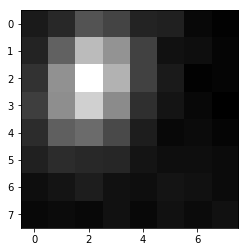

Spot reconstructed from gaussian fit parameters using sigma_min:


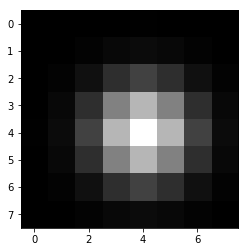

Spot reconstructed from gaussian fit parameters using sigma_max:


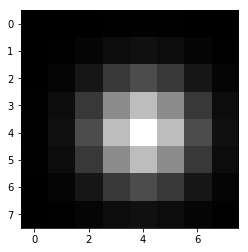

Original crop
[[ 33  38  52  47  36  35  27  25]
 [ 36  57  87  74  46  30  29  26]
 [ 41  73 110  84  46  33  25  26]
 [ 45  72  94  71  40  31  27  24]
 [ 39  56  60  49  34  27  28  26]
 [ 35  39  38  37  31  29  29  28]
 [ 29  31  34  30  29  31  30  28]
 [ 27  28  27  30  27  30  28  30]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   7  20  28  20   7   1]
 [  0   3  20  55  78  55  20   3]
 [  0   5  28  78 110  78  28   5]
 [  0   3  20  55  78  55  20   3]
 [  0   1   7  20  28  20   7   1]
 [  0   0   1   3   5   3   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   5   7   5   2   0]
 [  0   2   9  24  32  24   9   2]
 [  0   5  24  60  81  60  24   5]
 [  0   7  32  81 110  81  32   7]
 [  0   5  24  60  81  60  24   5]
 [  0   2   9  24  32  24   9   2]
 [  0   0   2   5   7   5   2   0]]

---------------------------------------------------

x: 761.99
y: 404.95
sigma_min

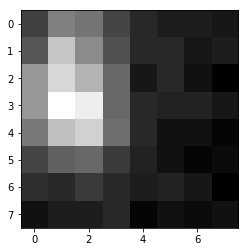

Spot reconstructed from gaussian fit parameters using sigma_min:


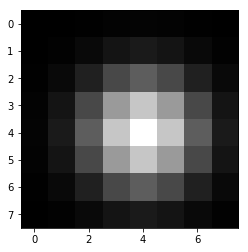

Spot reconstructed from gaussian fit parameters using sigma_max:


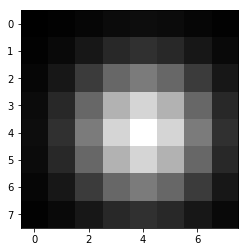

Original crop
[[31 42 40 32 27 25 25 24]
 [35 54 44 34 27 27 24 25]
 [46 57 51 38 24 27 23 20]
 [46 64 61 38 27 26 26 24]
 [41 53 56 39 27 23 23 21]
 [32 37 38 30 26 23 21 22]
 [28 27 30 27 25 26 24 20]
 [23 25 25 27 21 23 22 23]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  6  5  2  0]
 [ 0  2  8 18 23 18  8  2]
 [ 0  5 18 38 49 38 18  5]
 [ 1  6 23 49 64 49 23  6]
 [ 0  5 18 38 49 38 18  5]
 [ 0  2  8 18 23 18  8  2]
 [ 0  0  2  5  6  5  2  0]]
Reconstructed using sigma max
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  6 10 12 10  6  2]
 [ 1  6 15 25 31 25 15  6]
 [ 2 10 25 44 53 44 25 10]
 [ 3 12 31 53 64 53 31 12]
 [ 2 10 25 44 53 44 25 10]
 [ 1  6 15 25 31 25 15  6]
 [ 0  2  6 10 12 10  6  2]]

---------------------------------------------------

x: 1160.3
y: 377.18
sigma_min: 1.00341982815881
sigma_max: 1.1819389382295231
height: 249.4649009829385
max_intensity: 255


Original crop around spot at (1160, 377):


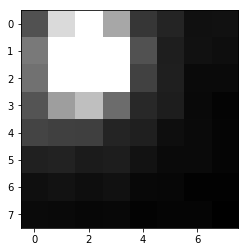

Spot reconstructed from gaussian fit parameters using sigma_min:


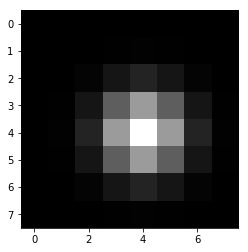

Spot reconstructed from gaussian fit parameters using sigma_max:


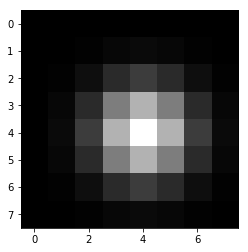

Original crop
[[107 223 255 180  84  69  52  53]
 [142 255 255 255 108  64  53  50]
 [134 255 255 255  94  65  47  47]
 [110 172 200 130  72  63  46  42]
 [ 96  93  92  70  65  50  47  43]
 [ 66  67  61  63  54  47  47  43]
 [ 51  54  50  53  45  44  40  40]
 [ 47  46  44  45  41  43  43  38]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  21  34  21   4   0]
 [  0   1  21  94 155  94  21   1]
 [  0   2  34 155 255 155  34   2]
 [  0   1  21  94 155  94  21   1]
 [  0   0   4  21  34  21   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   7  10   7   2   0]
 [  0   2  14  42  60  42  14   2]
 [  0   7  42 124 178 124  42   7]
 [  0  10  60 178 255 178  60  10]
 [  0   7  42 124 178 124  42   7]
 [  0   2  14  42  60  42  14   2]
 [  0   0   2   7  10   7   2   0]]

---------------------------------------------------

x: 1183.3
y: 404.16
sigma_min

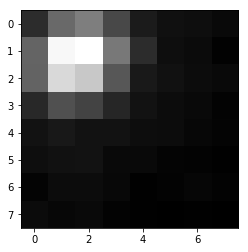

Spot reconstructed from gaussian fit parameters using sigma_min:


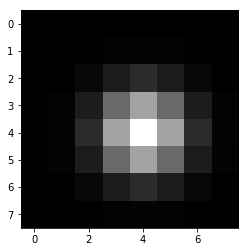

Spot reconstructed from gaussian fit parameters using sigma_max:


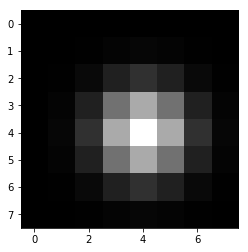

Original crop
[[ 69 118 135  91  54  45  44  40]
 [114 234 240 130  68  44  41  34]
 [113 209 195 103  53  46  42  40]
 [ 66  97  87  63  47  42  40  35]
 [ 47  52  47  47  43  42  38  36]
 [ 44  46  47  40  40  36  35  33]
 [ 36  42  42  39  33  35  37  35]
 [ 41  38  40  35  33  32  33  32]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  26  40  26   6   0]
 [  0   2  26  99 154  99  26   2]
 [  0   4  40 154 240 154  40   4]
 [  0   2  26  99 154  99  26   2]
 [  0   0   6  26  40  26   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  31  46  31   9   1]
 [  0   4  31 105 159 105  31   4]
 [  0   6  46 159 240 159  46   6]
 [  0   4  31 105 159 105  31   4]
 [  0   1   9  31  46  31   9   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 1322.9
y: 366.87
sigma_min

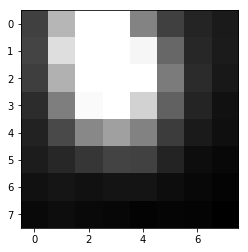

Spot reconstructed from gaussian fit parameters using sigma_min:


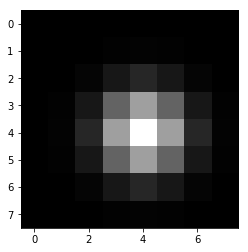

Spot reconstructed from gaussian fit parameters using sigma_max:


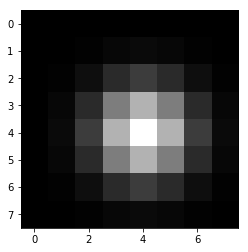

Original crop
[[ 93 193 255 255 150  93  71  61]
 [ 97 227 255 255 247 126  72  62]
 [ 92 189 255 255 255 143  76  60]
 [ 77 146 250 255 217 122  70  54]
 [ 68 101 154 174 149  91  61  52]
 [ 63  72  85  96  94  69  50  46]
 [ 54  57  54  56  56  50  46  43]
 [ 47  50  47  45  42  44  43  39]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  23  38  23   5   0]
 [  0   2  23  98 158  98  23   2]
 [  0   3  38 158 255 158  38   3]
 [  0   2  23  98 158  98  23   2]
 [  0   0   5  23  38  23   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   7  10   7   2   0]
 [  0   2  14  42  60  42  14   2]
 [  0   7  42 124 178 124  42   7]
 [  0  10  60 178 255 178  60  10]
 [  0   7  42 124 178 124  42   7]
 [  0   2  14  42  60  42  14   2]
 [  0   0   2   7  10   7   2   0]]

---------------------------------------------------

x: 1188.8
y: 187.56
sigma_min

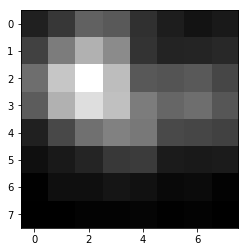

Spot reconstructed from gaussian fit parameters using sigma_min:


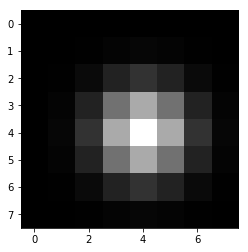

Spot reconstructed from gaussian fit parameters using sigma_max:


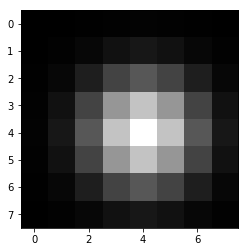

Original crop
[[ 49  60  82  78  57  47  42  45]
 [ 66  95 122 103  58  50  51  53]
 [ 88 133 162 128  77  75  78  68]
 [ 79 122 145 130  95  84  88  76]
 [ 49  69  89  98  93  70  68  66]
 [ 40  45  51  61  62  46  45  46]
 [ 33  40  40  43  41  37  38  34]
 [ 32  32  34  34  35  33  34  32]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  21  32  21   6   0]
 [  0   2  21  72 108  72  21   2]
 [  0   4  32 108 162 108  32   4]
 [  0   2  21  72 108  72  21   2]
 [  0   0   6  21  32  21   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   2   1   0   0]
 [  0   1   5  11  14  11   5   1]
 [  0   5  19  42  55  42  19   5]
 [  1  11  42  94 124  94  42  11]
 [  2  14  55 124 162 124  55  14]
 [  1  11  42  94 124  94  42  11]
 [  0   5  19  42  55  42  19   5]
 [  0   1   5  11  14  11   5   1]]

---------------------------------------------------

x: 1415.8
y: 252.62
sigma_min

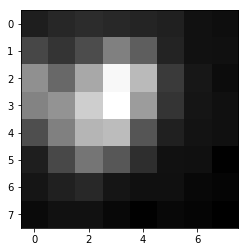

Spot reconstructed from gaussian fit parameters using sigma_min:


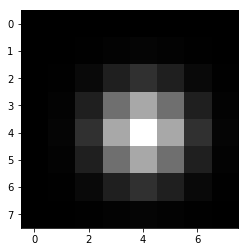

Spot reconstructed from gaussian fit parameters using sigma_max:


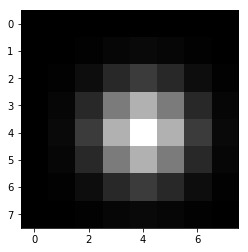

Original crop
[[ 51  56  59  57  55  52  44  42]
 [ 74  64  77 106  87  54  44  43]
 [115  93 129 174 139  67  47  41]
 [108 117 150 178 122  64  46  43]
 [ 78 106 136 140  82  52  45  43]
 [ 51  75 100  83  60  44  43  35]
 [ 46  52  57  46  43  43  39  37]
 [ 40  44  44  39  35  39  37  34]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  22  33  22   6   0]
 [  0   2  22  77 117  77  22   2]
 [  0   4  33 117 178 117  33   4]
 [  0   2  22  77 117  77  22   2]
 [  0   0   6  22  33  22   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  28  41  28   9   1]
 [  0   4  28  85 123  85  28   4]
 [  0   6  41 123 178 123  41   6]
 [  0   4  28  85 123  85  28   4]
 [  0   1   9  28  41  28   9   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 1418.9
y: 394.64
sigma_min

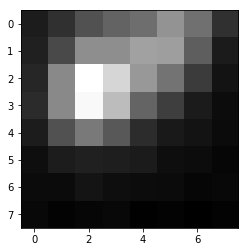

Spot reconstructed from gaussian fit parameters using sigma_min:


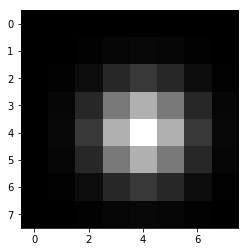

Spot reconstructed from gaussian fit parameters using sigma_max:


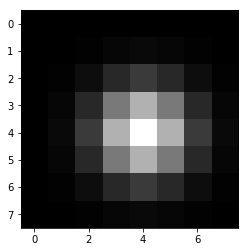

Original crop
[[ 49  61  82  93 100 123 101  62]
 [ 52  77 120 120 132 130  90  48]
 [ 55 117 191 165 126 103  68  43]
 [ 58 117 187 149  94  70  48  39]
 [ 49  82 107  86  59  47  43  38]
 [ 40  49  52  50  48  40  39  35]
 [ 38  38  44  40  39  38  35  36]
 [ 36  33  35  36  32  33  31  33]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  29  42  29   9   1]
 [  0   4  29  90 131  90  29   4]
 [  0   6  42 131 191 131  42   6]
 [  0   4  29  90 131  90  29   4]
 [  0   1   9  29  42  29   9   1]
 [  0   0   1   4   6   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1  10  30  43  30  10   1]
 [  0   4  30  91 132  91  30   4]
 [  0   6  43 132 191 132  43   6]
 [  0   4  30  91 132  91  30   4]
 [  0   1  10  30  43  30  10   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 1557.0
y: 412.09
sigma_min

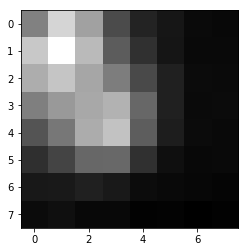

Spot reconstructed from gaussian fit parameters using sigma_min:


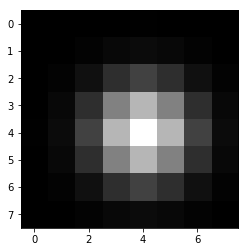

Spot reconstructed from gaussian fit parameters using sigma_max:


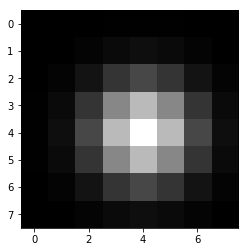

Original crop
[[148 219 175 102  68  57  47  45]
 [208 255 196 116  79  56  46  46]
 [185 205 179 144 101  66  48  47]
 [146 168 181 189 126  66  47  48]
 [110 139 184 203 117  63  48  46]
 [ 78  96 126 127  80  51  45  46]
 [ 59  60  66  60  49  46  44  43]
 [ 48  51  45  45  40  41  38  40]]
Reconstructed using sigma min
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   8  11   8   3   0]
 [  0   3  16  46  65  46  16   3]
 [  0   8  46 128 181 128  46   8]
 [  1  11  65 181 255 181  65  11]
 [  0   8  46 128 181 128  46   8]
 [  0   3  16  46  65  46  16   3]
 [  0   0   3   8  11   8   3   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   4  10  14  10   4   0]
 [  0   4  19  51  71  51  19   4]
 [  1  10  51 134 185 134  51  10]
 [  1  14  71 185 255 185  71  14]
 [  1  10  51 134 185 134  51  10]
 [  0   4  19  51  71  51  19   4]
 [  0   0   4  10  14  10   4   0]]

---------------------------------------------------

x: 1282.5
y: 515.24
sigma_min

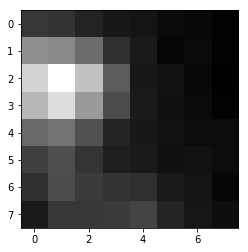

Spot reconstructed from gaussian fit parameters using sigma_min:


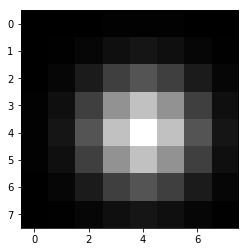

Spot reconstructed from gaussian fit parameters using sigma_max:


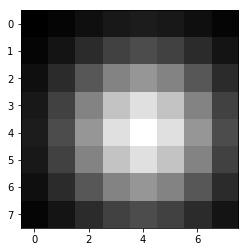

Original crop
[[ 60  58  50  45  43  38  37  34]
 [103 100  85  56  46  36  38  34]
 [136 157 127  78  45  42  37  33]
 [122 140 108  70  46  41  38  34]
 [ 84  89  72  51  45  42  39  39]
 [ 64  71  59  48  46  41  42  39]
 [ 57  70  62  58  56  46  43  36]
 [ 46  60  60  62  66  51  44  40]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   1   4   9  12   9   4   1]
 [  0   4  17  39  51  39  17   4]
 [  1   9  39  90 118  90  39   9]
 [  1  12  51 118 157 118  51  12]
 [  1   9  39  90 118  90  39   9]
 [  0   4  17  39  51  39  17   4]
 [  0   1   4   9  12   9   4   1]]
Reconstructed using sigma max
[[  2   6  11  17  19  17  11   6]
 [  6  15  28  42  48  42  28  15]
 [ 11  28  55  81  93  81  55  28]
 [ 17  42  81 120 137 120  81  42]
 [ 19  48  93 137 157 137  93  48]
 [ 17  42  81 120 137 120  81  42]
 [ 11  28  55  81  93  81  55  28]
 [  6  15  28  42  48  42  28  15]]

---------------------------------------------------

x: 1338.8
y: 219.29
sigma_min

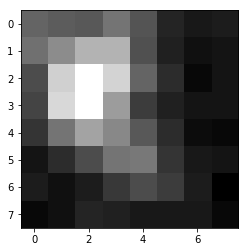

Spot reconstructed from gaussian fit parameters using sigma_min:


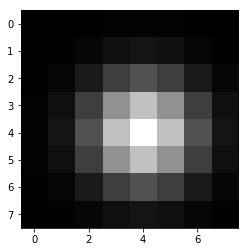

Spot reconstructed from gaussian fit parameters using sigma_max:


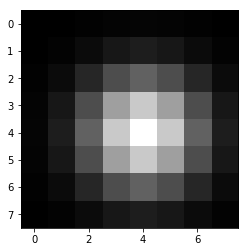

Original crop
[[54 52 51 58 50 38 35 36]
 [57 64 74 74 49 37 33 34]
 [48 81 93 82 54 40 31 34]
 [46 83 93 68 44 37 34 34]
 [42 58 70 63 51 40 32 31]
 [34 40 48 58 59 42 35 34]
 [36 33 36 43 48 44 36 29]
 [31 33 38 37 35 35 35 31]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  7  5  2  0]
 [ 0  2  9 22 30 22  9  2]
 [ 0  5 22 52 70 52 22  5]
 [ 1  7 30 70 93 70 30  7]
 [ 0  5 22 52 70 52 22  5]
 [ 0  2  9 22 30 22  9  2]
 [ 0  0  2  5  7  5  2  0]]
Reconstructed using sigma max
[[ 0  0  0  1  2  1  0  0]
 [ 0  1  4  8 10  8  4  1]
 [ 0  4 13 28 35 28 13  4]
 [ 1  8 28 57 73 57 28  8]
 [ 2 10 35 73 93 73 35 10]
 [ 1  8 28 57 73 57 28  8]
 [ 0  4 13 28 35 28 13  4]
 [ 0  1  4  8 10  8  4  1]]

---------------------------------------------------

x: 1233.3
y: 147.09
sigma_min: 1.568285503674065
sigma_max: 3.301167504354768
height: 67.61951362797667
max_intensity: 63


Original crop around spot at (1233, 147):


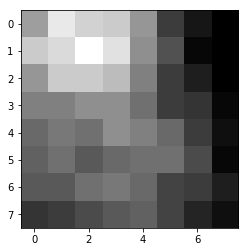

Spot reconstructed from gaussian fit parameters using sigma_min:


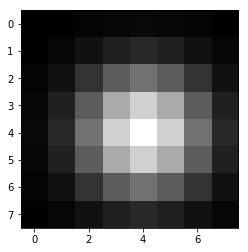

Spot reconstructed from gaussian fit parameters using sigma_max:


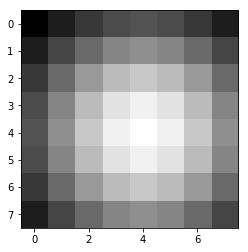

Original crop
[[50 60 57 56 49 37 32 29]
 [56 58 63 59 48 40 30 29]
 [49 56 56 54 46 37 33 29]
 [46 46 48 48 44 37 36 30]
 [43 45 44 48 46 43 37 31]
 [42 44 41 43 44 44 39 30]
 [41 41 44 45 43 38 37 33]
 [36 37 39 41 42 38 34 31]]
Reconstructed using sigma min
[[ 0  0  1  1  2  1  1  0]
 [ 0  1  4  8 10  8  4  1]
 [ 1  4 12 22 27 22 12  4]
 [ 1  8 22 41 51 41 22  8]
 [ 2 10 27 51 63 51 27 10]
 [ 1  8 22 41 51 41 22  8]
 [ 1  4 12 22 27 22 12  4]
 [ 0  1  4  8 10  8  4  1]]
Reconstructed using sigma max
[[14 20 25 28 30 28 25 20]
 [20 27 34 39 41 39 34 27]
 [25 34 43 50 52 50 43 34]
 [28 39 50 57 60 57 50 39]
 [30 41 52 60 63 60 52 41]
 [28 39 50 57 60 57 50 39]
 [25 34 43 50 52 50 43 34]
 [20 27 34 39 41 39 34 27]]

---------------------------------------------------

x: 1224.5
y: 374.8
sigma_min: 1.4376249576220186
sigma_max: 1.5949312545762153
height: 54.72288922188884
max_intensity: 93


Original crop around spot at (1224, 374):


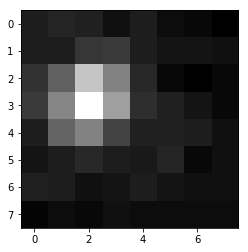

Spot reconstructed from gaussian fit parameters using sigma_min:


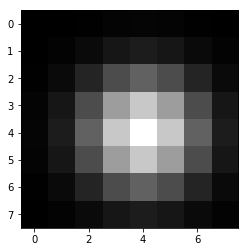

Spot reconstructed from gaussian fit parameters using sigma_max:


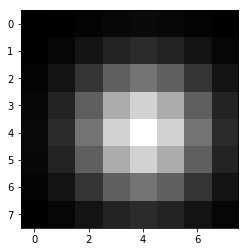

Original crop
[[39 41 40 36 39 35 34 32]
 [39 39 45 46 39 37 37 36]
 [44 55 79 63 42 34 32 34]
 [46 64 93 70 43 40 37 34]
 [39 56 63 48 40 40 39 36]
 [37 39 42 39 38 41 34 36]
 [40 39 36 37 39 37 36 36]
 [33 35 34 36 35 35 35 35]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  1  4  8 10  8  4  1]
 [ 0  4 13 27 35 27 13  4]
 [ 1  8 27 57 73 57 27  8]
 [ 1 10 35 73 93 73 35 10]
 [ 1  8 27 57 73 57 27  8]
 [ 0  4 13 27 35 27 13  4]
 [ 0  1  4  8 10  8  4  1]]
Reconstructed using sigma max
[[ 0  0  1  3  4  3  1  0]
 [ 0  2  7 13 15 13  7  2]
 [ 1  7 19 34 42 34 19  7]
 [ 3 13 34 62 76 62 34 13]
 [ 4 15 42 76 93 76 42 15]
 [ 3 13 34 62 76 62 34 13]
 [ 1  7 19 34 42 34 19  7]
 [ 0  2  7 13 15 13  7  2]]

---------------------------------------------------

x: 1272.9
y: 243.89
sigma_min: 1.7043833731887452
sigma_max: 1.788599967055137
height: 50.39808303073381
max_intensity: 80


Original crop around spot at (1272, 243):


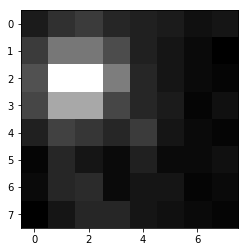

Spot reconstructed from gaussian fit parameters using sigma_min:


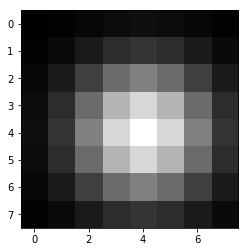

Spot reconstructed from gaussian fit parameters using sigma_max:


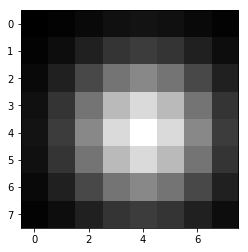

Original crop
[[38 42 44 40 39 38 36 37]
 [44 55 55 47 39 37 35 33]
 [48 80 80 56 40 37 35 34]
 [46 64 64 46 40 38 34 36]
 [39 45 43 40 44 37 35 34]
 [34 40 37 35 39 35 35 36]
 [35 40 41 35 37 37 34 35]
 [33 37 40 40 37 36 35 34]]
Reconstructed using sigma min
[[ 0  1  2  4  5  4  2  1]
 [ 1  3  8 14 16 14  8  3]
 [ 2  8 20 33 40 33 20  8]
 [ 4 14 33 56 67 56 33 14]
 [ 5 16 40 67 80 67 40 16]
 [ 4 14 33 56 67 56 33 14]
 [ 2  8 20 33 40 33 20  8]
 [ 1  3  8 14 16 14  8  3]]
Reconstructed using sigma max
[[ 0  1  3  5  6  5  3  1]
 [ 1  4 10 16 19 16 10  4]
 [ 3 10 22 36 42 36 22 10]
 [ 5 16 36 58 68 58 36 16]
 [ 6 19 42 68 80 68 42 19]
 [ 5 16 36 58 68 58 36 16]
 [ 3 10 22 36 42 36 22 10]
 [ 1  4 10 16 19 16 10  4]]

---------------------------------------------------

x: 1418.9
y: 389.08
sigma_min: 1.1463368561747977
sigma_max: 5.589810743672928
height: 108867.08524529512
max_intensity: 191


Original crop around spot at (1418, 389):


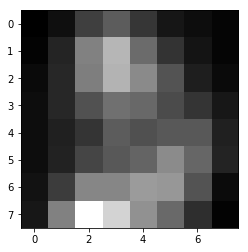

Spot reconstructed from gaussian fit parameters using sigma_min:


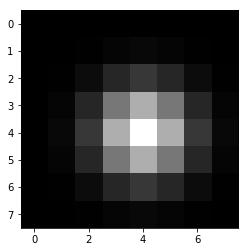

Spot reconstructed from gaussian fit parameters using sigma_max:


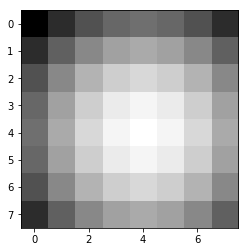

Original crop
[[ 41  50  78  95  73  54  49  44]
 [ 43  63 117 148 104  71  53  44]
 [ 47  64 115 147 122  90  59  47]
 [ 49  64  89 107 102  85  72  55]
 [ 49  60  72  95  88  93  93  60]
 [ 49  61  82  93 100 123 101  62]
 [ 52  77 120 120 132 130  90  48]
 [ 55 117 191 165 126 103  68  43]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  28  41  28   9   1]
 [  0   4  28  89 130  89  28   4]
 [  0   6  41 130 191 130  41   6]
 [  0   4  28  89 130  89  28   4]
 [  0   1   9  28  41  28   9   1]
 [  0   0   1   4   6   4   1   0]]
Reconstructed using sigma max
[[114 128 138 145 147 145 138 128]
 [128 143 155 162 165 162 155 143]
 [138 155 168 176 179 176 168 155]
 [145 162 176 184 187 184 176 162]
 [147 165 179 187 191 187 179 165]
 [145 162 176 184 187 184 176 162]
 [138 155 168 176 179 176 168 155]
 [128 143 155 162 165 162 155 143]]

---------------------------------------------------

x: 1924.0
y: 103.45
sigma_min

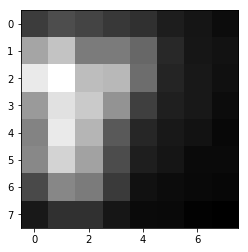

Spot reconstructed from gaussian fit parameters using sigma_min:


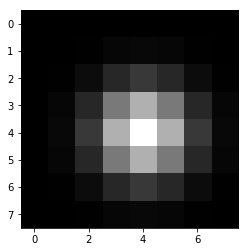

Spot reconstructed from gaussian fit parameters using sigma_max:


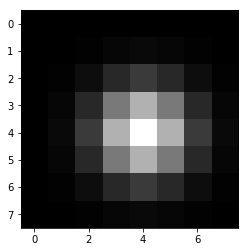

Original crop
[[ 76  91  83  74  66  50  43  36]
 [165 191 130 130 113  59  44  41]
 [224 242 186 181 118  57  46  39]
 [156 216 197 150  79  52  46  36]
 [137 224 179 101  58  46  41  32]
 [141 205 163  90  51  43  34  34]
 [ 87 140 130  75  40  36  33  31]
 [ 46  66  67  44  34  33  27  25]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   8   5   1   0]
 [  0   1  12  37  54  37  12   1]
 [  0   5  37 114 166 114  37   5]
 [  0   8  54 166 242 166  54   8]
 [  0   5  37 114 166 114  37   5]
 [  0   1  12  37  54  37  12   1]
 [  0   0   1   5   8   5   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   8   6   2   0]
 [  0   2  12  38  55  38  12   2]
 [  0   6  38 116 167 116  38   6]
 [  0   8  55 167 242 167  55   8]
 [  0   6  38 116 167 116  38   6]
 [  0   2  12  38  55  38  12   2]
 [  0   0   2   6   8   6   2   0]]

---------------------------------------------------

x: 1842.3
y: 174.07
sigma_min

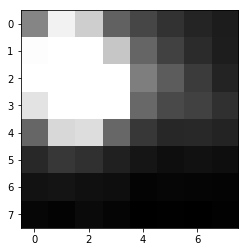

Spot reconstructed from gaussian fit parameters using sigma_min:


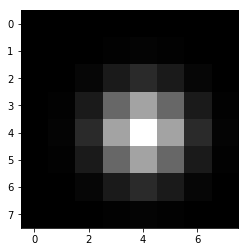

Spot reconstructed from gaussian fit parameters using sigma_max:


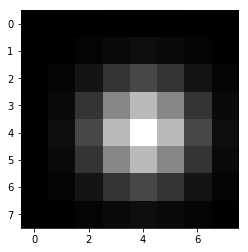

Original crop
[[148 243 212 117  93  76  65  57]
 [253 255 255 205 120  89  70  58]
 [255 255 255 255 142 113  84  63]
 [231 255 255 255 123  97  90  75]
 [121 221 225 122  80  66  67  63]
 [ 68  80  75  60  51  45  47  45]
 [ 48  50  46  45  36  38  37  36]
 [ 38  35  41  37  32  33  32  34]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  26  41  26   6   0]
 [  0   2  26 103 162 103  26   2]
 [  0   4  41 162 255 162  41   4]
 [  0   2  26 103 162 103  26   2]
 [  0   0   6  26  41  26   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   4  10  14  10   4   0]
 [  0   4  19  51  71  51  19   4]
 [  1  10  51 134 185 134  51  10]
 [  1  14  71 185 255 185  71  14]
 [  1  10  51 134 185 134  51  10]
 [  0   4  19  51  71  51  19   4]
 [  0   0   4  10  14  10   4   0]]

---------------------------------------------------

x: 1802.6
y: 200.25
sigma_min

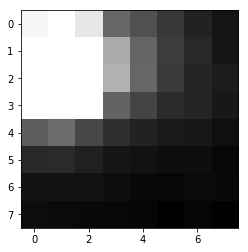

Spot reconstructed from gaussian fit parameters using sigma_min:


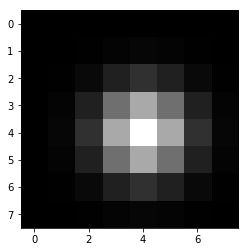

Spot reconstructed from gaussian fit parameters using sigma_max:


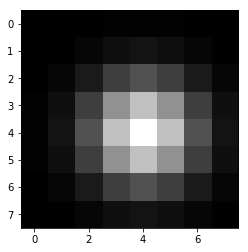

Original crop
[[247 255 233 120  99  79  59  46]
 [255 255 255 180 117  82  65  47]
 [255 255 255 186 120  81  61  53]
 [255 255 255 116  89  67  60  50]
 [111 123  91  69  59  51  49  42]
 [ 65  66  58  47  44  41  40  35]
 [ 45  45  44  41  36  35  37  36]
 [ 40  37  36  35  34  28  33  29]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  31  48  31   9   1]
 [  0   4  31 111 168 111  31   4]
 [  0   6  48 168 255 168  48   6]
 [  0   4  31 111 168 111  31   4]
 [  0   1   9  31  48  31   9   1]
 [  0   0   1   4   6   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   2   2   2   0   0]
 [  0   1   6  15  19  15   6   1]
 [  0   6  26  61  82  61  26   6]
 [  2  15  61 144 192 144  61  15]
 [  2  19  82 192 255 192  82  19]
 [  2  15  61 144 192 144  61  15]
 [  0   6  26  61  82  61  26   6]
 [  0   1   6  15  19  15   6   1]]

---------------------------------------------------

x: 1782.8
y: 163.75
sigma_min

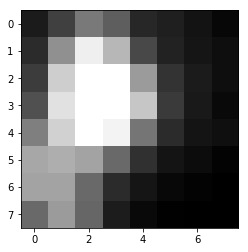

Spot reconstructed from gaussian fit parameters using sigma_min:


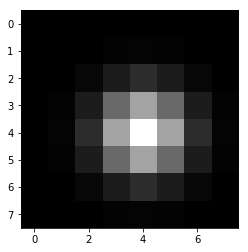

Spot reconstructed from gaussian fit parameters using sigma_max:


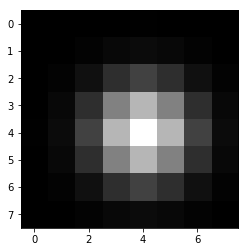

Original crop
[[ 65  96 143 121  75  68  58  48]
 [ 78 162 241 195 102  71  60  54]
 [ 93 214 255 255 171  85  65  54]
 [109 230 255 255 207  91  63  50]
 [148 216 255 245 140  78  59  55]
 [181 187 179 130  82  59  52  45]
 [178 178 130  78  60  49  45  42]
 [131 171 127  66  50  43  42  42]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   4   3   0   0]
 [  0   0   7  28  43  28   7   0]
 [  0   3  28 105 164 105  28   3]
 [  0   4  43 164 255 164  43   4]
 [  0   3  28 105 164 105  28   3]
 [  0   0   7  28  43  28   7   0]
 [  0   0   0   3   4   3   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   8  11   8   3   0]
 [  0   3  16  46  65  46  16   3]
 [  0   8  46 129 181 129  46   8]
 [  1  11  65 181 255 181  65  11]
 [  0   8  46 129 181 129  46   8]
 [  0   3  16  46  65  46  16   3]
 [  0   0   3   8  11   8   3   0]]

---------------------------------------------------

x: 1781.2
y: 166.93
sigma_min

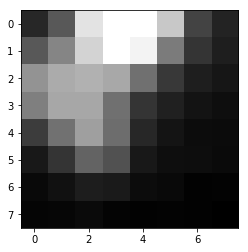

Spot reconstructed from gaussian fit parameters using sigma_min:


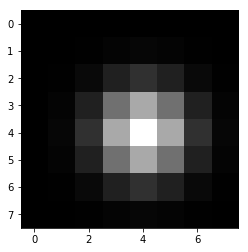

Spot reconstructed from gaussian fit parameters using sigma_max:


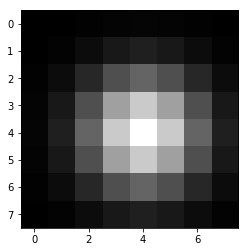

Original crop
[[ 66 109 230 255 255 207  91  63]
 [109 148 216 255 245 140  78  59]
 [161 181 187 179 130  82  59  52]
 [143 178 178 130  78  60  49  45]
 [ 86 131 171 127  66  50  43  42]
 [ 53  78 119 104  53  45  44  41]
 [ 40  47  58  55  43  40  34  35]
 [ 37  38  41  36  34  35  34  32]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  32  49  32   9   1]
 [  0   4  32 112 169 112  32   4]
 [  0   6  49 169 255 169  49   6]
 [  0   4  32 112 169 112  32   4]
 [  0   1   9  32  49  32   9   1]
 [  0   0   1   4   6   4   1   0]]
Reconstructed using sigma max
[[  0   0   2   4   6   4   2   0]
 [  0   3  12  24  31  24  12   3]
 [  2  12  39  79 100  79  39  12]
 [  4  24  79 159 201 159  79  24]
 [  6  31 100 201 255 201 100  31]
 [  4  24  79 159 201 159  79  24]
 [  2  12  39  79 100  79  39  12]
 [  0   3  12  24  31  24  12   3]]

---------------------------------------------------

x: 1771.7
y: 231.99
sigma_min

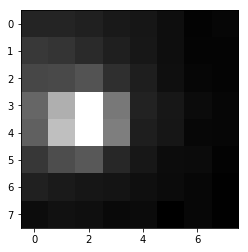

Spot reconstructed from gaussian fit parameters using sigma_min:


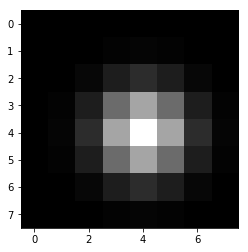

Spot reconstructed from gaussian fit parameters using sigma_max:


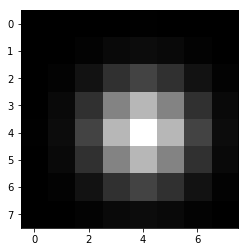

Original crop
[[ 54  53  51  46  44  39  32  34]
 [ 66  64  57  50  45  39  33  33]
 [ 75  77  83  60  49  40  34  33]
 [ 95 141 192 106  52  45  37  34]
 [ 91 151 192 110  49  44  35  34]
 [ 65  79  86  55  45  38  37  32]
 [ 51  47  44  43  40  37  35  31]
 [ 38  41  40  36  37  30  35  31]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  21  33  21   5   0]
 [  0   2  21  80 124  80  21   2]
 [  0   3  33 124 192 124  33   3]
 [  0   2  21  80 124  80  21   2]
 [  0   0   5  21  33  21   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  13  36  50  36  13   2]
 [  0   6  36  98 137  98  36   6]
 [  0   9  50 137 192 137  50   9]
 [  0   6  36  98 137  98  36   6]
 [  0   2  13  36  50  36  13   2]
 [  0   0   2   6   9   6   2   0]]

---------------------------------------------------

x: 1765.4
y: 232.78
sigma_min

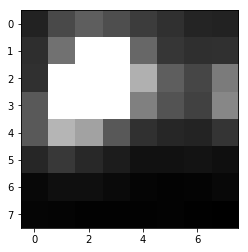

Spot reconstructed from gaussian fit parameters using sigma_min:


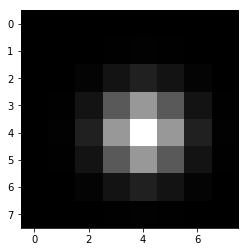

Spot reconstructed from gaussian fit parameters using sigma_max:


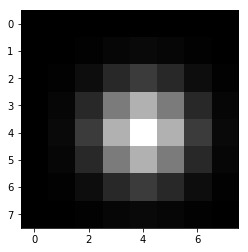

Original crop
[[ 64  98 116 102  86  76  66  64]
 [ 74 132 255 255 123  81  75  77]
 [ 77 255 255 255 186 116  95 141]
 [112 255 255 255 145 106  91 151]
 [112 191 174 110  76  67  65  79]
 [ 67  84  70  59  49  49  51  47]
 [ 41  47  47  43  39  37  38  41]
 [ 39  38  36  36  36  37  35  34]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  19  32  19   4   0]
 [  0   1  19  90 151  90  19   1]
 [  0   2  32 151 255 151  32   2]
 [  0   1  19  90 151  90  19   1]
 [  0   0   4  19  32  19   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  13  41  59  41  13   2]
 [  0   6  41 123 177 123  41   6]
 [  0   9  59 177 255 177  59   9]
 [  0   6  41 123 177 123  41   6]
 [  0   2  13  41  59  41  13   2]
 [  0   0   2   6   9   6   2   0]]

---------------------------------------------------

x: 1757.4
y: 247.85
sigma_min

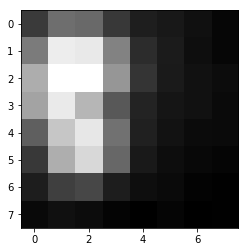

Spot reconstructed from gaussian fit parameters using sigma_min:


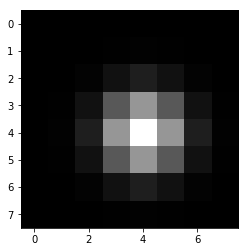

Spot reconstructed from gaussian fit parameters using sigma_max:


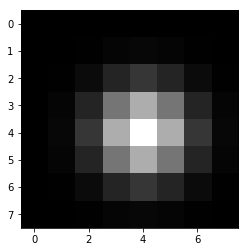

Original crop
[[ 83 128 125  82  59  53  46  38]
 [140 239 235 146  72  56  45  38]
 [183 255 255 163  79  55  47  43]
 [175 236 191 109  63  51  47  41]
 [115 205 234 131  61  48  42  41]
 [ 81 184 221 122  54  44  39  37]
 [ 58  87  94  58  45  41  35  33]
 [ 40  46  43  36  32  37  32  33]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  17  30  17   3   0]
 [  0   1  17  87 149  87  17   1]
 [  0   2  30 149 255 149  30   2]
 [  0   1  17  87 149  87  17   1]
 [  0   0   3  17  30  17   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   7   5   1   0]
 [  0   1  11  36  54  36  11   1]
 [  0   5  36 117 172 117  36   5]
 [  0   7  54 172 255 172  54   7]
 [  0   5  36 117 172 117  36   5]
 [  0   1  11  36  54  36  11   1]
 [  0   0   1   5   7   5   1   0]]

---------------------------------------------------

x: 1623.3
y: 318.47
sigma_min

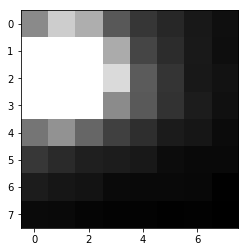

Spot reconstructed from gaussian fit parameters using sigma_min:


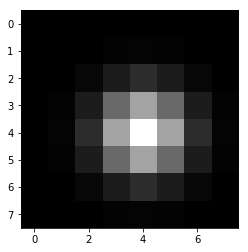

Spot reconstructed from gaussian fit parameters using sigma_max:


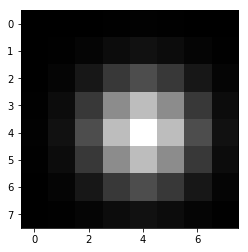

Original crop
[[155 212 186 112  83  71  58  50]
 [255 255 255 183  96  75  59  49]
 [255 255 255 223 115  82  58  53]
 [255 255 255 156 114  80  61  51]
 [137 162 124  92  77  60  56  47]
 [ 84  73  64  61  58  48  45  45]
 [ 61  56  54  46  45  45  44  38]
 [ 46  45  42  40  40  38  39  37]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   4   3   0   0]
 [  0   0   7  28  43  28   7   0]
 [  0   3  28 105 164 105  28   3]
 [  0   4  43 164 255 164  43   4]
 [  0   3  28 105 164 105  28   3]
 [  0   0   7  28  43  28   7   0]
 [  0   0   0   3   4   3   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   2   1   0   0]
 [  0   1   5  12  17  12   5   1]
 [  0   5  23  57  77  57  23   5]
 [  1  12  57 140 189 140  57  12]
 [  2  17  77 189 255 189  77  17]
 [  1  12  57 140 189 140  57  12]
 [  0   5  23  57  77  57  23   5]
 [  0   1   5  12  17  12   5   1]]

---------------------------------------------------

x: 1861.4
y: 307.36
sigma_min

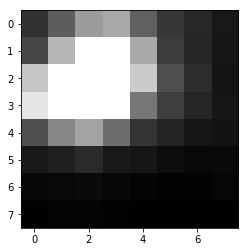

Spot reconstructed from gaussian fit parameters using sigma_min:


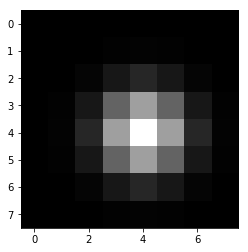

Spot reconstructed from gaussian fit parameters using sigma_max:


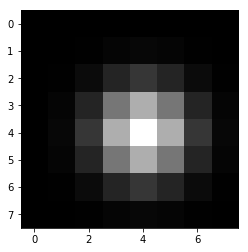

Original crop
[[ 84 120 172 183 122  87  76  62]
 [101 195 255 255 183  92  74  61]
 [206 255 255 255 211 107  79  60]
 [233 255 255 255 141  94  74  61]
 [108 154 178 132  86  72  61  58]
 [ 62  70  77  62  61  53  50  50]
 [ 48  50  51  48  46  45  45  47]
 [ 43  46  46  44  42  43  43  42]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  23  38  23   5   0]
 [  0   2  23  98 158  98  23   2]
 [  0   3  38 158 255 158  38   3]
 [  0   2  23  98 158  98  23   2]
 [  0   0   5  23  38  23   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   7   5   1   0]
 [  0   1  11  37  54  37  11   1]
 [  0   5  37 117 173 117  37   5]
 [  0   7  54 173 255 173  54   7]
 [  0   5  37 117 173 117  37   5]
 [  0   1  11  37  54  37  11   1]
 [  0   0   1   5   7   5   1   0]]

---------------------------------------------------

x: 1835.2
y: 367.66
sigma_min

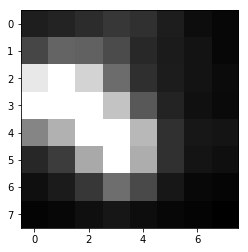

Spot reconstructed from gaussian fit parameters using sigma_min:


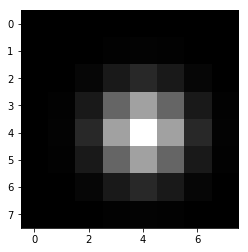

Spot reconstructed from gaussian fit parameters using sigma_max:


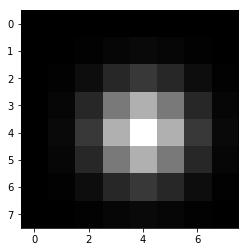

Original crop
[[ 66  70  78  87  81  65  51  46]
 [ 99 124 122 103  75  63  56  46]
 [235 255 218 131  80  64  56  50]
 [255 255 255 205 114  70  54  49]
 [152 189 255 255 195  81  60  57]
 [ 73  92 182 255 186  81  57  53]
 [ 53  63  87 133 102  60  47  45]
 [ 44  46  53  59  51  46  44  40]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   6  25  39  25   6   0]
 [  0   2  25 100 160 100  25   2]
 [  0   3  39 160 255 160  39   3]
 [  0   2  25 100 160 100  25   2]
 [  0   0   6  25  39  25   6   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   8   6   2   0]
 [  0   2  13  39  57  39  13   2]
 [  0   6  39 121 175 121  39   6]
 [  0   8  57 175 255 175  57   8]
 [  0   6  39 121 175 121  39   6]
 [  0   2  13  39  57  39  13   2]
 [  0   0   2   6   8   6   2   0]]

---------------------------------------------------

x: 1863.7
y: 389.88
sigma_min

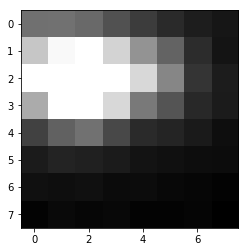

Spot reconstructed from gaussian fit parameters using sigma_min:


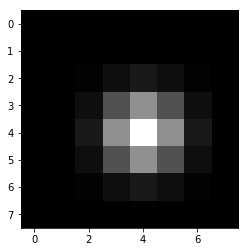

Spot reconstructed from gaussian fit parameters using sigma_max:


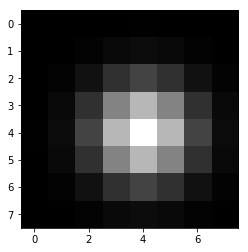

Original crop
[[129 131 124 103  84  68  57  51]
 [205 249 255 216 161 118  71  49]
 [255 255 255 255 220 149  78  56]
 [181 255 255 220 138 105  66  55]
 [ 89 117 130  94  68  64  54  44]
 [ 55  62  59  55  48  45  43  42]
 [ 45  44  45  41  42  38  37  34]
 [ 34  39  37  38  34  34  36  31]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  14  25  14   2   0]
 [  0   0  14  81 143  81  14   0]
 [  0   1  25 143 255 143  25   1]
 [  0   0  14  81 143  81  14   0]
 [  0   0   2  14  25  14   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   9  12   9   3   0]
 [  0   3  17  48  67  48  17   3]
 [  0   9  48 131 182 131  48   9]
 [  1  12  67 182 255 182  67  12]
 [  0   9  48 131 182 131  48   9]
 [  0   3  17  48  67  48  17   3]
 [  0   0   3   9  12   9   3   0]]

---------------------------------------------------

x: 1960.5
y: 515.24
sigma_min

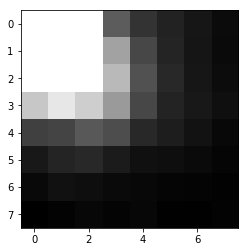

Spot reconstructed from gaussian fit parameters using sigma_min:


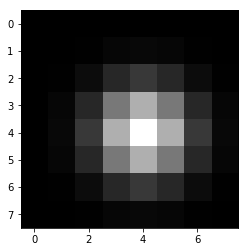

Spot reconstructed from gaussian fit parameters using sigma_max:


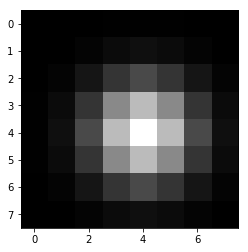

Original crop
[[255 255 255 116  82  67  57  48]
 [255 255 255 176  99  69  56  47]
 [255 255 255 195 108  72  57  49]
 [207 234 213 169  99  68  59  51]
 [ 93  96 113 104  73  63  54  45]
 [ 59  70  73  61  52  50  47  43]
 [ 46  53  50  47  45  43  42  40]
 [ 38  41  44  42  44  39  39  41]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   6   8   6   1   0]
 [  0   1  12  39  56  39  12   1]
 [  0   6  39 120 175 120  39   6]
 [  0   8  56 175 255 175  56   8]
 [  0   6  39 120 175 120  39   6]
 [  0   1  12  39  56  39  12   1]
 [  0   0   1   6   8   6   1   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   4  11  15  11   4   0]
 [  0   4  20  53  73  53  20   4]
 [  1  11  53 136 186 136  53  11]
 [  1  15  73 186 255 186  73  15]
 [  1  11  53 136 186 136  53  11]
 [  0   4  20  53  73  53  20   4]
 [  0   0   4  11  15  11   4   0]]

---------------------------------------------------

x: 189.14
y: 891.31
sigma_min

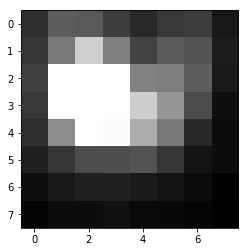

Spot reconstructed from gaussian fit parameters using sigma_min:


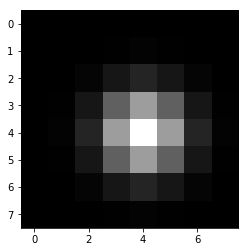

Spot reconstructed from gaussian fit parameters using sigma_max:


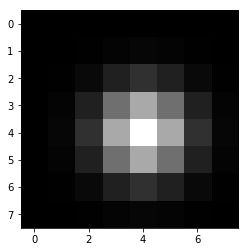

Original crop
[[ 77 115 112  86  70  83  86  54]
 [ 82 140 212 144  92 113 107  59]
 [ 89 255 255 255 147 143 115  56]
 [ 83 255 255 255 211 164  99  47]
 [ 75 154 255 252 183 136  68  45]
 [ 61  81 100 102 106  81  51  45]
 [ 47  55  62  63  57  50  45  35]
 [ 37  45  46  48  42  41  39  34]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   3   1   0   0]
 [  0   0   5  22  36  22   5   0]
 [  0   1  22  96 156  96  22   1]
 [  0   3  36 156 255 156  36   3]
 [  0   1  22  96 156  96  22   1]
 [  0   0   5  22  36  22   5   0]
 [  0   0   0   1   3   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  31  48  31   9   1]
 [  0   4  31 111 168 111  31   4]
 [  0   6  48 168 255 168  48   6]
 [  0   4  31 111 168 111  31   4]
 [  0   1   9  31  48  31   9   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 235.95
y: 943.68
sigma_min

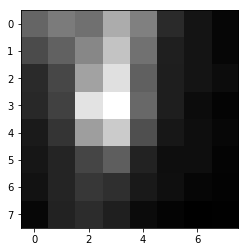

Spot reconstructed from gaussian fit parameters using sigma_min:


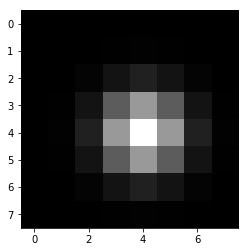

Spot reconstructed from gaussian fit parameters using sigma_max:


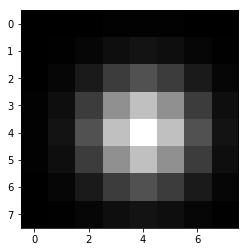

Original crop
[[ 90 104  97 135 107  53  39  30]
 [ 74  88 112 150  98  46  39  30]
 [ 53  71 129 168  87  45  39  34]
 [ 52  68 170 188  92  45  34  29]
 [ 43  59 126 155  76  41  35  31]
 [ 40  50  70  86  48  35  35  29]
 [ 38  50  61  56  42  36  30  28]
 [ 31  48  54  46  33  29  26  27]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   3  14  24  14   3   0]
 [  0   1  14  67 112  67  14   1]
 [  0   1  24 112 188 112  24   1]
 [  0   1  14  67 112  67  14   1]
 [  0   0   3  14  24  14   3   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   1   4  10  14  10   4   1]
 [  0   4  19  45  60  45  19   4]
 [  1  10  45 106 141 106  45  10]
 [  1  14  60 141 188 141  60  14]
 [  1  10  45 106 141 106  45  10]
 [  0   4  19  45  60  45  19   4]
 [  0   1   4  10  14  10   4   1]]

---------------------------------------------------

x: 347.03
y: 885.76
sigma_min

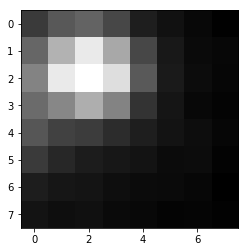

Spot reconstructed from gaussian fit parameters using sigma_min:


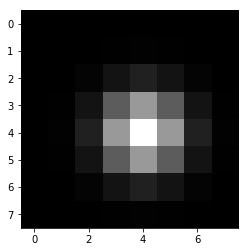

Spot reconstructed from gaussian fit parameters using sigma_max:


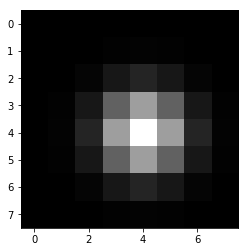

Original crop
[[ 79 106 116  91  54  43  35  28]
 [118 186 236 177  91  49  36  34]
 [144 236 255 225 107  51  38  33]
 [123 148 182 144  73  46  35  31]
 [104  85  82  67  54  44  39  33]
 [ 79  62  52  48  44  37  38  30]
 [ 53  47  45  40  37  36  34  27]
 [ 44  40  42  36  35  31  32  29]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  19  33  19   4   0]
 [  0   1  19  91 153  91  19   1]
 [  0   2  33 153 255 153  33   2]
 [  0   1  19  91 153  91  19   1]
 [  0   0   4  19  33  19   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  23  37  23   5   0]
 [  0   2  23  98 158  98  23   2]
 [  0   3  37 158 255 158  37   3]
 [  0   2  23  98 158  98  23   2]
 [  0   0   5  23  37  23   5   0]
 [  0   0   0   2   3   2   0   0]]

---------------------------------------------------

x: 268.48
y: 991.28
sigma_min

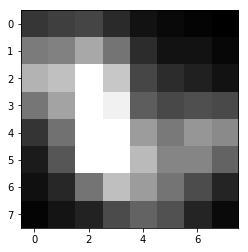

Spot reconstructed from gaussian fit parameters using sigma_min:


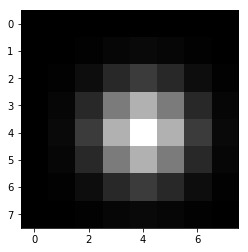

Spot reconstructed from gaussian fit parameters using sigma_max:


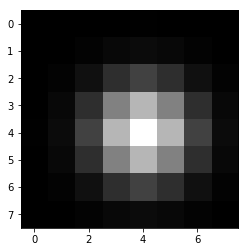

Original crop
[[ 87  95 100  77  57  50  46  42]
 [145 150 182 139  80  57  57  48]
 [192 202 255 208 101  79  69  57]
 [141 178 255 243 120 102 108 104]
 [ 86 137 255 255 172 144 167 157]
 [ 65 114 255 255 197 153 153 125]
 [ 56  75 139 201 172 139 106  72]
 [ 46  59  71 105 125 110  73  51]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  13  41  59  41  13   2]
 [  0   6  41 123 177 123  41   6]
 [  0   9  59 177 255 177  59   9]
 [  0   6  41 123 177 123  41   6]
 [  0   2  13  41  59  41  13   2]
 [  0   0   2   6   9   6   2   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   8  11   8   3   0]
 [  0   3  16  46  65  46  16   3]
 [  0   8  46 129 181 129  46   8]
 [  1  11  65 181 255 181  65  11]
 [  0   8  46 129 181 129  46   8]
 [  0   3  16  46  65  46  16   3]
 [  0   0   3   8  11   8   3   0]]

---------------------------------------------------

x: 272.45
y: 995.25
sigma_min

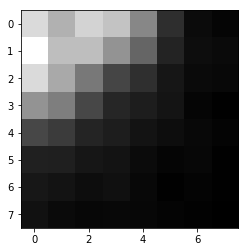

Spot reconstructed from gaussian fit parameters using sigma_min:


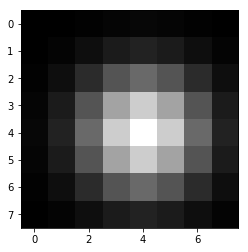

Spot reconstructed from gaussian fit parameters using sigma_max:


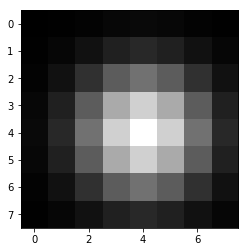

Original crop
[[172 144 167 157 116  56  33  29]
 [197 153 153 125  93  49  34  32]
 [172 139 106  72  57  40  32  31]
 [125 110  73  51  45  39  29  26]
 [ 73  65  50  45  38  34  31  28]
 [ 47  46  40  38  33  29  30  26]
 [ 41  38  34  36  31  26  28  26]
 [ 37  32  30  31  30  28  27  25]]
Reconstructed using sigma min
[[  0   0   2   4   5   4   2   0]
 [  0   3  11  21  26  21  11   3]
 [  2  11  33  64  81  64  33  11]
 [  4  21  64 126 157 126  64  21]
 [  5  26  81 157 197 157  81  26]
 [  4  21  64 126 157 126  64  21]
 [  2  11  33  64  81  64  33  11]
 [  0   3  11  21  26  21  11   3]]
Reconstructed using sigma max
[[  0   1   3   6   7   6   3   1]
 [  1   5  13  25  31  25  13   5]
 [  3  13  38  71  87  71  38  13]
 [  6  25  71 131 160 131  71  25]
 [  7  31  87 160 197 160  87  31]
 [  6  25  71 131 160 131  71  25]
 [  3  13  38  71  87  71  38  13]
 [  1   5  13  25  31  25  13   5]]

---------------------------------------------------

x: 598.54
y: 739.77
sigma_min

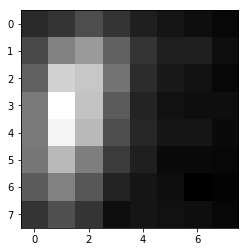

Spot reconstructed from gaussian fit parameters using sigma_min:


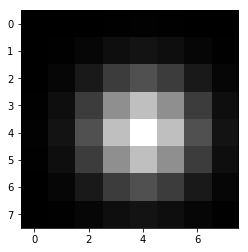

Spot reconstructed from gaussian fit parameters using sigma_max:


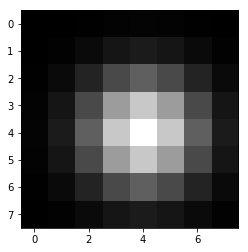

Original crop
[[34 37 44 37 31 28 26 24]
 [43 59 66 50 37 31 31 26]
 [50 82 79 55 35 29 27 24]
 [57 95 78 48 32 27 26 26]
 [57 92 75 44 33 28 28 25]
 [56 75 58 39 31 25 25 24]
 [48 59 47 32 28 26 22 23]
 [37 45 37 26 28 27 26 24]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  2  5  7  5  2  0]
 [ 0  2  9 22 30 22  9  2]
 [ 0  5 22 53 71 53 22  5]
 [ 0  7 30 71 95 71 30  7]
 [ 0  5 22 53 71 53 22  5]
 [ 0  2  9 22 30 22  9  2]
 [ 0  0  2  5  7  5  2  0]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  1  3  8 10  8  3  1]
 [ 0  3 13 27 35 27 13  3]
 [ 1  8 27 58 74 58 27  8]
 [ 1 10 35 74 95 74 35 10]
 [ 1  8 27 58 74 58 27  8]
 [ 0  3 13 27 35 27 13  3]
 [ 0  1  3  8 10  8  3  1]]

---------------------------------------------------

x: 664.4
y: 633.45
sigma_min: 1.3657382283033979
sigma_max: 1.4613243634804254
height: 43.418134880061864
max_intensity: 53


Original crop around spot at (664, 633):


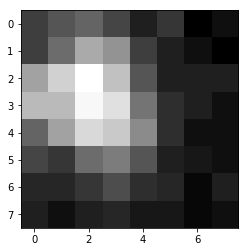

Spot reconstructed from gaussian fit parameters using sigma_min:


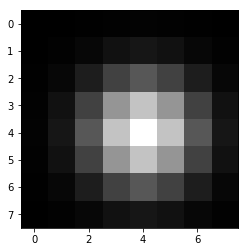

Spot reconstructed from gaussian fit parameters using sigma_max:


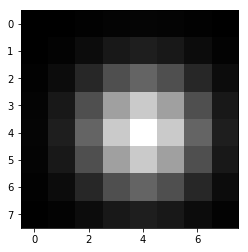

Original crop
[[28 31 33 29 24 27 20 22]
 [28 34 42 39 28 24 22 20]
 [41 47 53 45 31 24 24 24]
 [44 44 52 49 35 26 24 22]
 [33 41 48 46 38 26 22 22]
 [29 27 34 36 31 24 23 22]
 [25 25 27 30 26 25 21 24]
 [24 22 24 25 23 23 21 22]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 13 18 13  6  1]
 [ 0  3 13 31 40 31 13  3]
 [ 0  4 18 40 53 40 18  4]
 [ 0  3 13 31 40 31 13  3]
 [ 0  1  6 13 18 13  6  1]
 [ 0  0  1  3  4  3  1  0]]
Reconstructed using sigma max
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  6  5  2  0]
 [ 0  2  8 16 20 16  8  2]
 [ 0  5 16 33 41 33 16  5]
 [ 1  6 20 41 53 41 20  6]
 [ 0  5 16 33 41 33 16  5]
 [ 0  2  8 16 20 16  8  2]
 [ 0  0  2  5  6  5  2  0]]

---------------------------------------------------

x: 869.89
y: 876.24
sigma_min: 1.4348869691428265
sigma_max: 1.743766189371211
height: 59.28628931043804
max_intensity: 72


Original crop around spot at (869, 876):


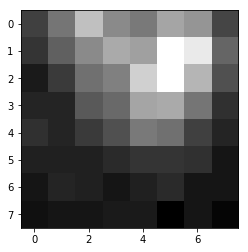

Spot reconstructed from gaussian fit parameters using sigma_min:


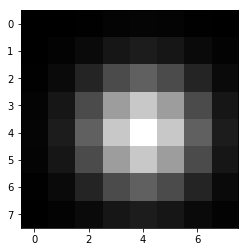

Spot reconstructed from gaussian fit parameters using sigma_max:


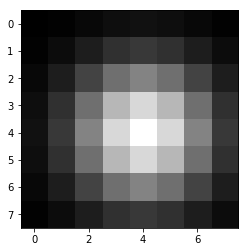

Original crop
[[36 46 60 50 47 55 52 37]
 [34 42 50 56 54 72 68 43]
 [29 35 45 48 63 72 58 39]
 [31 31 41 44 55 56 46 33]
 [33 31 35 39 47 45 36 31]
 [30 30 30 32 34 34 33 28]
 [28 31 30 28 30 32 28 28]
 [27 28 28 29 29 24 28 25]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  3  6  8  6  3  0]
 [ 0  3 10 21 27 21 10  3]
 [ 1  6 21 44 56 44 21  6]
 [ 1  8 27 56 72 56 27  8]
 [ 1  6 21 44 56 44 21  6]
 [ 0  3 10 21 27 21 10  3]
 [ 0  0  3  6  8  6  3  0]]
Reconstructed using sigma max
[[ 0  1  2  4  5  4  2  1]
 [ 1  3  8 13 16 13  8  3]
 [ 2  8 19 31 37 31 19  8]
 [ 4 13 31 51 61 51 31 13]
 [ 5 16 37 61 72 61 37 16]
 [ 4 13 31 51 61 51 31 13]
 [ 2  8 19 31 37 31 19  8]
 [ 1  3  8 13 16 13  8  3]]

---------------------------------------------------

x: 1102.4
y: 1036.5
sigma_min: 1.0422414453780138
sigma_max: 1.1684451835180327
height: 259.99425049800544
max_intensity: 255


Original crop around spot at (1102, 1036):


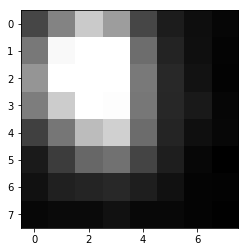

Spot reconstructed from gaussian fit parameters using sigma_min:


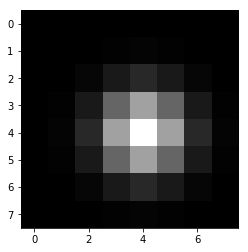

Spot reconstructed from gaussian fit parameters using sigma_max:


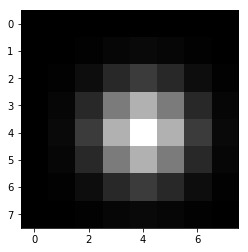

Original crop
[[103 153 211 174 103  68  57  50]
 [144 250 255 255 135  74  58  49]
 [168 255 255 255 145  79  60  48]
 [148 213 255 253 143  77  66  50]
 [ 98 142 200 216 134  75  58  51]
 [ 67  95 130 139 101  70  51  45]
 [ 59  72  75  78  70  59  49  48]
 [ 51  54  54  59  52  52  49  46]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  25  40  25   6   0]
 [  0   2  25 101 160 101  25   2]
 [  0   4  40 160 255 160  40   4]
 [  0   2  25 101 160 101  25   2]
 [  0   0   6  25  40  25   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  13  40  58  40  13   2]
 [  0   6  40 122 176 122  40   6]
 [  0   9  58 176 255 176  58   9]
 [  0   6  40 122 176 122  40   6]
 [  0   2  13  40  58  40  13   2]
 [  0   0   2   6   9   6   2   0]]

---------------------------------------------------

x: 1155.5
y: 718.35
sigma_min

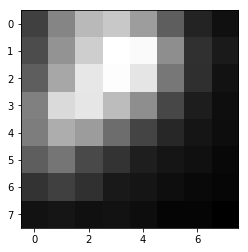

Spot reconstructed from gaussian fit parameters using sigma_min:


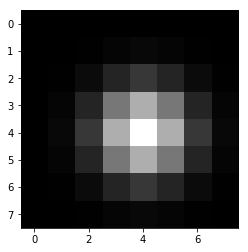

Spot reconstructed from gaussian fit parameters using sigma_max:


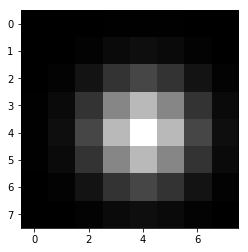

Original crop
[[ 86 137 176 187 155 108  64  50]
 [ 95 148 191 228 224 144  75  58]
 [108 162 210 226 208 127  73  52]
 [133 200 209 178 144  91  60  49]
 [131 167 154 119  89  67  54  48]
 [108 125  93  76  61  54  50  44]
 [ 76  86  74  57  54  49  45  43]
 [ 52  54  50  52  48  42  42  38]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   7   4   1   0]
 [  0   1  10  33  49  33  10   1]
 [  0   4  33 106 155 106  33   4]
 [  0   7  49 155 228 155  49   7]
 [  0   4  33 106 155 106  33   4]
 [  0   1  10  33  49  33  10   1]
 [  0   0   1   4   7   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   9  12   9   3   0]
 [  0   3  17  45  63  45  17   3]
 [  0   9  45 119 165 119  45   9]
 [  1  12  63 165 228 165  63  12]
 [  0   9  45 119 165 119  45   9]
 [  0   3  17  45  63  45  17   3]
 [  0   0   3   9  12   9   3   0]]

---------------------------------------------------

x: 1215.8
y: 766.75
sigma_min

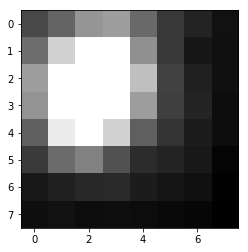

Spot reconstructed from gaussian fit parameters using sigma_min:


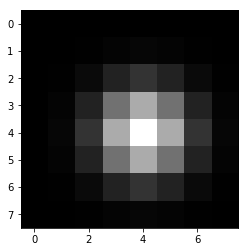

Spot reconstructed from gaussian fit parameters using sigma_max:


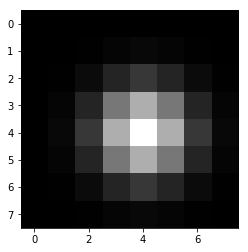

Original crop
[[107 129 169 176 134  94  77  62]
 [136 218 255 255 165  94  67  61]
 [175 255 255 255 203 101  75  61]
 [167 255 255 255 175  99  78  59]
 [125 239 255 218 125  90  71  59]
 [ 95 135 153 115  84  77  68  52]
 [ 68  75  81  82  71  65  61  50]
 [ 60  62  58  60  58  56  53  48]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1  10  34  50  34  10   1]
 [  0   4  34 113 170 113  34   4]
 [  0   6  50 170 255 170  50   6]
 [  0   4  34 113 170 113  34   4]
 [  0   1  10  34  50  34  10   1]
 [  0   0   1   4   6   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   8   5   1   0]
 [  0   1  11  37  55  37  11   1]
 [  0   5  37 118 173 118  37   5]
 [  0   8  55 173 255 173  55   8]
 [  0   5  37 118 173 118  37   5]
 [  0   1  11  37  55  37  11   1]
 [  0   0   1   5   8   5   1   0]]

---------------------------------------------------

x: 1227.7
y: 730.25
sigma_min

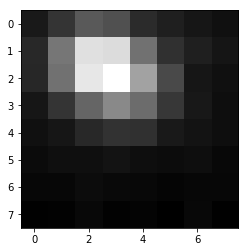

Spot reconstructed from gaussian fit parameters using sigma_min:


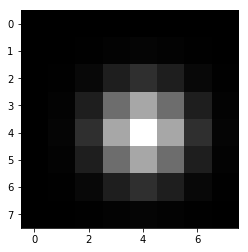

Spot reconstructed from gaussian fit parameters using sigma_max:


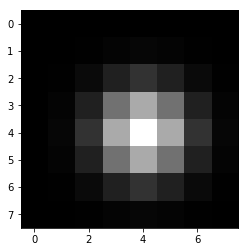

Original crop
[[ 54  74  99  93  67  58  52  48]
 [ 65 120 195 192 117  70  58  51]
 [ 64 117 200 217 151  89  52  48]
 [ 52  74 108 133 113  75  53  46]
 [ 48  52  65  72  71  54  50  46]
 [ 44  47  47  50  46  45  46  42]
 [ 41  41  45  43  42  40  41  41]
 [ 37  38  42  38  39  36  42  37]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   4   3   0   0]
 [  0   0   7  26  39  26   7   0]
 [  0   3  26  93 142  93  26   3]
 [  0   4  39 142 217 142  39   4]
 [  0   3  26  93 142  93  26   3]
 [  0   0   7  26  39  26   7   0]
 [  0   0   0   3   4   3   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   8  28  43  28   8   1]
 [  0   3  28  96 144  96  28   3]
 [  0   5  43 144 217 144  43   5]
 [  0   3  28  96 144  96  28   3]
 [  0   1   8  28  43  28   8   1]
 [  0   0   1   3   5   3   1   0]]

---------------------------------------------------

x: 1228.5
y: 711.21
sigma_min

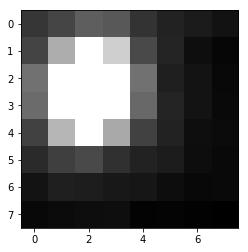

Spot reconstructed from gaussian fit parameters using sigma_min:


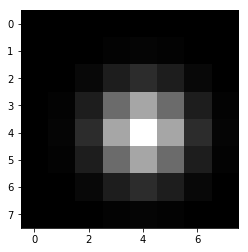

Spot reconstructed from gaussian fit parameters using sigma_max:


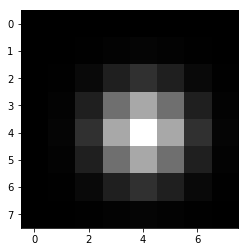

Original crop
[[ 94 106 126 121  91  78  72  65]
 [105 189 255 216 110  80  62  55]
 [142 255 255 255 142  75  66  57]
 [136 255 255 255 134  80  66  58]
 [103 196 255 186 103  78  62  59]
 [ 84 101 109  90  78  73  61  58]
 [ 66  75  74  70  68  61  57  58]
 [ 57  59  61  62  53  54  52  50]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   5   3   0   0]
 [  0   0   8  29  45  29   8   0]
 [  0   3  29 107 165 107  29   3]
 [  0   5  45 165 255 165  45   5]
 [  0   3  29 107 165 107  29   3]
 [  0   0   8  29  45  29   8   0]
 [  0   0   0   3   5   3   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   9  31  48  31   9   1]
 [  0   3  31 110 168 110  31   3]
 [  0   5  48 168 255 168  48   5]
 [  0   3  31 110 168 110  31   3]
 [  0   1   9  31  48  31   9   1]
 [  0   0   1   3   5   3   1   0]]

---------------------------------------------------

x: 1227.7
y: 700.1
sigma_min:

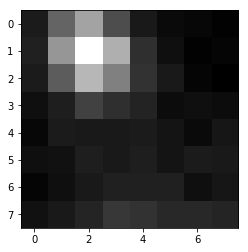

Spot reconstructed from gaussian fit parameters using sigma_min:


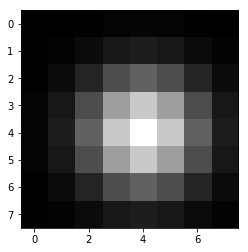

Spot reconstructed from gaussian fit parameters using sigma_max:


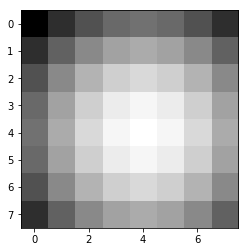

Original crop
[[ 56  85 110  76  55  49  48  46]
 [ 58 105 147 115  64  51  46  47]
 [ 56  82 118  96  65  55  47  45]
 [ 51  57  71  64  59  50  51  50]
 [ 48  56  55  55  56  53  49  54]
 [ 51  52  57  55  57  53  56  55]
 [ 47  51  55  58  58  58  51  54]
 [ 52  55  60  67  65  61  61  60]]
Reconstructed using sigma min
[[  0   0   1   2   3   2   1   0]
 [  0   1   6  13  16  13   6   1]
 [  1   6  21  44  56  44  21   6]
 [  2  13  44  90 115  90  44  13]
 [  3  16  56 115 147 115  56  16]
 [  2  13  44  90 115  90  44  13]
 [  1   6  21  44  56  44  21   6]
 [  0   1   6  13  16  13   6   1]]
Reconstructed using sigma max
[[ 92 101 109 114 116 114 109 101]
 [101 112 121 126 128 126 121 112]
 [109 121 130 136 138 136 130 121]
 [114 126 136 142 144 142 136 126]
 [116 128 138 144 147 144 138 128]
 [114 126 136 142 144 142 136 126]
 [109 121 130 136 138 136 130 121]
 [101 112 121 126 128 126 121 112]]

---------------------------------------------------

x: 1283.3
y: 759.61
sigma_min

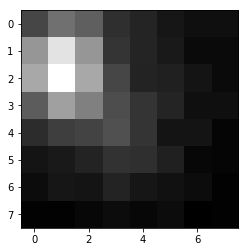

Spot reconstructed from gaussian fit parameters using sigma_min:


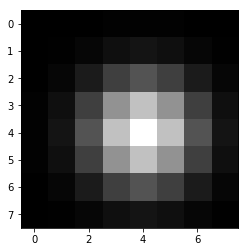

Spot reconstructed from gaussian fit parameters using sigma_max:


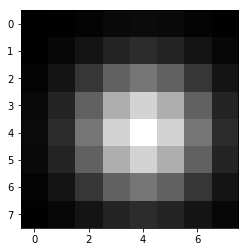

Original crop
[[ 55  72  65  46  42  36  33  33]
 [ 87 118  87  48  42  37  31  31]
 [ 94 129  94  55  41  40  35  31]
 [ 64  91  78  58  48  42  33  33]
 [ 45  52  54  59  48  35  35  29]
 [ 35  37  41  47  46  40  30  29]
 [ 32  36  35  41  36  34  32  28]
 [ 28  28  30  32  30  32  27  28]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   7  10   7   3   0]
 [  0   3  13  31  42  31  13   3]
 [  1   7  31  73  97  73  31   7]
 [  1  10  42  97 129  97  42  10]
 [  1   7  31  73  97  73  31   7]
 [  0   3  13  31  42  31  13   3]
 [  0   0   3   7  10   7   3   0]]
Reconstructed using sigma max
[[  0   1   2   4   5   4   2   1]
 [  1   4  10  18  22  18  10   4]
 [  2  10  27  49  59  49  27  10]
 [  4  18  49  87 106  87  49  18]
 [  5  22  59 106 129 106  59  22]
 [  4  18  49  87 106  87  49  18]
 [  2  10  27  49  59  49  27  10]
 [  1   4  10  18  22  18  10   4]]

---------------------------------------------------

x: 1295.2
y: 704.07
sigma_min

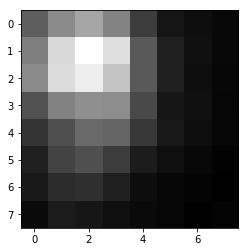

Spot reconstructed from gaussian fit parameters using sigma_min:


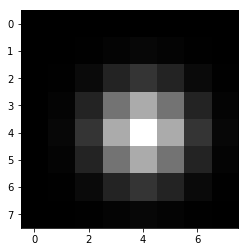

Spot reconstructed from gaussian fit parameters using sigma_max:


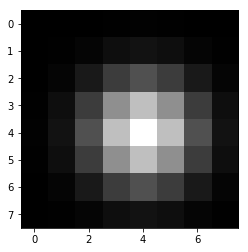

Original crop
[[121 158 180 153  93  61  55  50]
 [148 223 255 228 118  70  57  50]
 [158 226 240 205 118  70  55  49]
 [111 151 162 160 104  62  57  48]
 [ 87 109 130 127  90  63  55  49]
 [ 70  99 109  93  67  56  50  45]
 [ 64  80  82  70  54  49  47  43]
 [ 52  66  62  56  52  48  44  46]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   7   4   1   0]
 [  0   1  10  34  51  34  10   1]
 [  0   4  34 115 171 115  34   4]
 [  0   7  51 171 255 171  51   7]
 [  0   4  34 115 171 115  34   4]
 [  0   1  10  34  51  34  10   1]
 [  0   0   1   4   7   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   1   2   1   0   0]
 [  0   1   5  14  18  14   5   1]
 [  0   5  25  60  80  60  25   5]
 [  1  14  60 143 190 143  60  14]
 [  2  18  80 190 255 190  80  18]
 [  1  14  60 143 190 143  60  14]
 [  0   5  25  60  80  60  25   5]
 [  0   1   5  14  18  14   5   1]]

---------------------------------------------------

x: 1296.0
y: 681.06
sigma_min

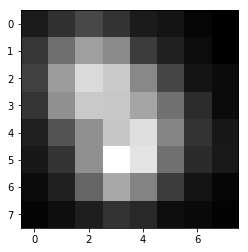

Spot reconstructed from gaussian fit parameters using sigma_min:


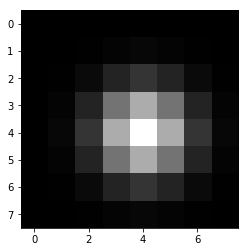

Spot reconstructed from gaussian fit parameters using sigma_max:


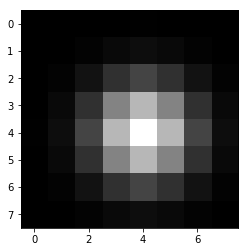

Original crop
[[ 67  80  95  82  67  63  54  50]
 [ 84 119 149 136  88  71  58  51]
 [ 91 147 186 176 135  93  63  57]
 [ 83 140 175 174 153 121  78  57]
 [ 70 102 140 173 189 133  82  65]
 [ 65  82 139 209 192 120  77  66]
 [ 57  71 113 155 132  88  63  54]
 [ 53  59  69  82  75  59  56  52]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   8  28  42  28   8   1]
 [  0   3  28  94 140  94  28   3]
 [  0   5  42 140 209 140  42   5]
 [  0   3  28  94 140  94  28   3]
 [  0   1   8  28  42  28   8   1]
 [  0   0   1   3   5   3   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   7  10   7   2   0]
 [  0   2  14  39  55  39  14   2]
 [  0   7  39 107 150 107  39   7]
 [  1  10  55 150 209 150  55  10]
 [  0   7  39 107 150 107  39   7]
 [  0   2  14  39  55  39  14   2]
 [  0   0   2   7  10   7   2   0]]

---------------------------------------------------

x: 1298.3
y: 683.44
sigma_min

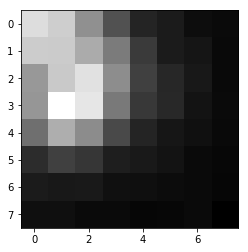

Spot reconstructed from gaussian fit parameters using sigma_min:


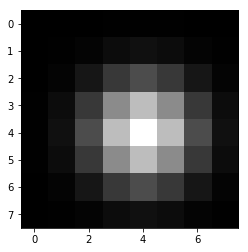

Spot reconstructed from gaussian fit parameters using sigma_max:


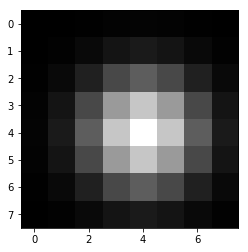

Original crop
[[186 176 135  93  63  57  48  46]
 [175 174 153 121  78  57  53  45]
 [140 173 189 133  82  65  55  45]
 [139 209 192 120  77  66  52  46]
 [113 155 132  88  63  54  50  45]
 [ 69  82  75  59  56  52  46  44]
 [ 57  55  56  50  49  47  46  43]
 [ 49  49  46  46  43  44  46  39]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   0   4  10  13  10   4   0]
 [  0   4  18  45  62  45  18   4]
 [  1  10  45 114 154 114  45  10]
 [  1  13  62 154 209 154  62  13]
 [  1  10  45 114 154 114  45  10]
 [  0   4  18  45  62  45  18   4]
 [  0   0   4  10  13  10   4   0]]
Reconstructed using sigma max
[[  0   0   1   2   3   2   1   0]
 [  0   2   7  16  21  16   7   2]
 [  1   7  27  59  76  59  27   7]
 [  2  16  59 126 162 126  59  16]
 [  3  21  76 162 209 162  76  21]
 [  2  16  59 126 162 126  59  16]
 [  1   7  27  59  76  59  27   7]
 [  0   2   7  16  21  16   7   2]]

---------------------------------------------------

x: 1324.5
y: 585.85
sigma_min

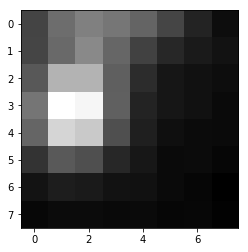

Spot reconstructed from gaussian fit parameters using sigma_min:


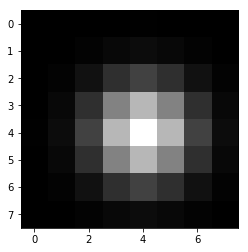

Spot reconstructed from gaussian fit parameters using sigma_max:


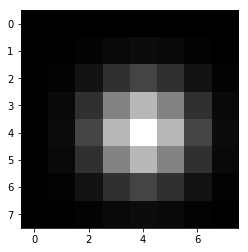

Original crop
[[ 89 120 134 127 113  90  64  47]
 [ 90 118 141 115  87  67  57  51]
 [104 174 174 109  71  54  50  47]
 [126 231 224 110  64  54  50  45]
 [114 199 190  97  61  49  46  45]
 [ 76 105  97  67  55  45  46  42]
 [ 52  59  57  51  50  45  42  37]
 [ 43  46  46  44  45  42  43  39]]
Reconstructed using sigma min
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   8  11   8   2   0]
 [  0   2  15  43  60  43  15   2]
 [  0   8  43 118 165 118  43   8]
 [  1  11  60 165 231 165  60  11]
 [  0   8  43 118 165 118  43   8]
 [  0   2  15  43  60  43  15   2]
 [  0   0   2   8  11   8   2   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   8  11   8   3   0]
 [  0   3  16  44  61  44  16   3]
 [  0   8  44 119 165 119  44   8]
 [  1  11  61 165 231 165  61  11]
 [  0   8  44 119 165 119  44   8]
 [  0   3  16  44  61  44  16   3]
 [  0   0   3   8  11   8   3   0]]

---------------------------------------------------

x: 1324.5
y: 581.09
sigma_min

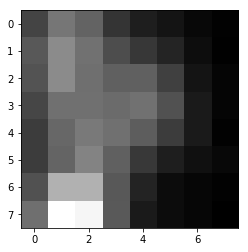

Spot reconstructed from gaussian fit parameters using sigma_min:


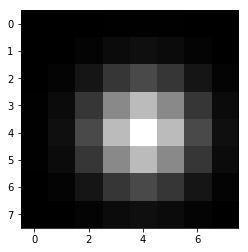

Spot reconstructed from gaussian fit parameters using sigma_max:


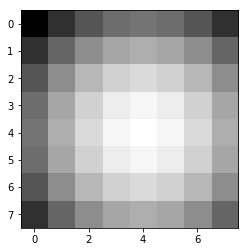

Original crop
[[ 95 131 117  84  67  60  51  47]
 [109 146 128 101  85  72  55  46]
 [106 146 126 115 115  92  60  49]
 [ 96 127 127 123 128 105  64  49]
 [ 89 120 134 127 113  90  64  47]
 [ 90 118 141 115  87  67  57  51]
 [104 174 174 109  71  54  50  47]
 [126 231 224 110  64  54  50  45]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   0   4  10  14  10   4   0]
 [  0   4  19  48  66  48  19   4]
 [  1  10  48 124 169 124  48  10]
 [  1  14  66 169 231 169  66  14]
 [  1  10  48 124 169 124  48  10]
 [  0   4  19  48  66  48  19   4]
 [  0   0   4  10  14  10   4   0]]
Reconstructed using sigma max
[[163 176 186 192 194 192 186 176]
 [176 190 200 207 209 207 200 190]
 [186 200 211 218 221 218 211 200]
 [192 207 218 226 228 226 218 207]
 [194 209 221 228 231 228 221 209]
 [192 207 218 226 228 226 218 207]
 [186 200 211 218 221 218 211 200]
 [176 190 200 207 209 207 200 190]]

---------------------------------------------------

x: 1564.9
y: 626.31
sigma_min

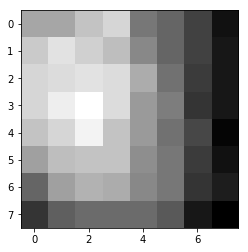

Spot reconstructed from gaussian fit parameters using sigma_min:


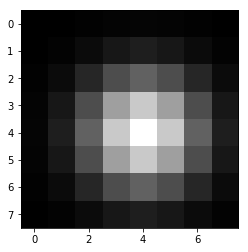

Spot reconstructed from gaussian fit parameters using sigma_max:


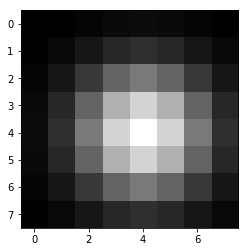

Original crop
[[53 53 58 61 45 42 36 28]
 [59 63 60 57 48 42 36 29]
 [61 62 63 62 54 44 35 29]
 [61 65 68 62 51 46 34 29]
 [58 61 66 58 51 44 37 26]
 [52 57 58 58 49 45 35 28]
 [42 52 55 54 48 45 34 30]
 [34 41 43 43 43 40 29 25]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  3  6  8  6  3  0]
 [ 0  3 10 20 26 20 10  3]
 [ 1  6 20 42 53 42 20  6]
 [ 1  8 26 53 68 53 26  8]
 [ 1  6 20 42 53 42 20  6]
 [ 0  3 10 20 26 20 10  3]
 [ 0  0  3  6  8  6  3  0]]
Reconstructed using sigma max
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  6 10 12 10  6  2]
 [ 1  6 15 26 32 26 15  6]
 [ 2 10 26 46 56 46 26 10]
 [ 3 12 32 56 68 56 32 12]
 [ 2 10 26 46 56 46 26 10]
 [ 1  6 15 26 32 26 15  6]
 [ 0  2  6 10 12 10  6  2]]

---------------------------------------------------

x: 1771.7
y: 652.5
sigma_min: 1.3949012971072134
sigma_max: 2.3315619399774543
height: 66.06203169875239
max_intensity: 83


Original crop around spot at (1771, 652):


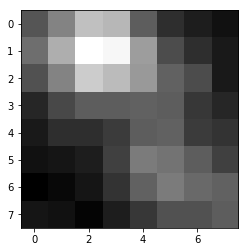

Spot reconstructed from gaussian fit parameters using sigma_min:


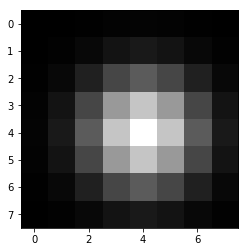

Spot reconstructed from gaussian fit parameters using sigma_max:


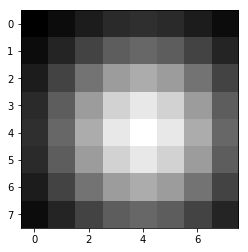

Original crop
[[43 54 68 66 45 34 30 27]
 [49 64 83 81 60 41 34 29]
 [42 54 71 67 59 46 41 29]
 [32 40 45 45 46 45 36 32]
 [29 34 34 37 45 46 37 35]
 [27 28 30 38 52 50 45 38]
 [23 25 28 35 46 52 48 46]
 [28 27 24 30 36 42 42 45]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  2  6  8  6  2  0]
 [ 0  2 10 22 29 22 10  2]
 [ 1  6 22 49 64 49 22  6]
 [ 1  8 29 64 83 64 29  8]
 [ 1  6 22 49 64 49 22  6]
 [ 0  2 10 22 29 22 10  2]
 [ 0  0  2  6  8  6  2  0]]
Reconstructed using sigma max
[[ 4  8 13 17 19 17 13  8]
 [ 8 15 25 33 36 33 25 15]
 [13 25 39 52 57 52 39 25]
 [17 33 52 69 75 69 52 33]
 [19 36 57 75 83 75 57 36]
 [17 33 52 69 75 69 52 33]
 [13 25 39 52 57 52 39 25]
 [ 8 15 25 33 36 33 25 15]]

---------------------------------------------------

x: 1777.3
y: 658.84
sigma_min: 3.9688889425860467
sigma_max: 4.346169361699903
height: 9663.94728895777
max_intensity: 48


Original crop around spot at (1777, 658):


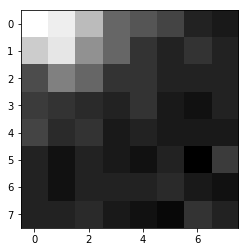

Spot reconstructed from gaussian fit parameters using sigma_min:


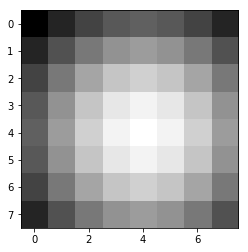

Spot reconstructed from gaussian fit parameters using sigma_max:


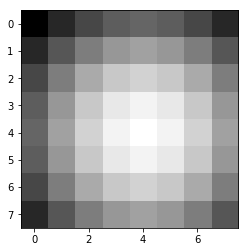

Original crop
[[48 46 40 30 28 26 22 21]
 [42 45 35 30 24 22 24 22]
 [27 33 30 24 24 22 22 22]
 [25 24 23 22 24 21 20 22]
 [26 23 24 21 22 21 21 21]
 [22 20 22 21 20 22 18 25]
 [22 20 22 22 22 23 21 20]
 [22 22 23 21 20 19 24 22]]
Reconstructed using sigma min
[[17 21 25 27 28 27 25 21]
 [21 27 31 34 36 34 31 27]
 [25 31 37 40 42 40 37 31]
 [27 34 40 45 46 45 40 34]
 [28 36 42 46 48 46 42 36]
 [27 34 40 45 46 45 40 34]
 [25 31 37 40 42 40 37 31]
 [21 27 31 34 36 34 31 27]]
Reconstructed using sigma max
[[20 24 28 30 31 30 28 24]
 [24 29 34 36 37 36 34 29]
 [28 34 38 42 43 42 38 34]
 [30 36 42 45 46 45 42 36]
 [31 37 43 46 48 46 43 37]
 [30 36 42 45 46 45 42 36]
 [28 34 38 42 43 42 38 34]
 [24 29 34 36 37 36 34 29]]

---------------------------------------------------

x: 1898.7
y: 624.73
sigma_min: 1.3596546990216085
sigma_max: 4.1530030162021205
height: 1252429.331935035
max_intensity: 89


Original crop around spot at (1898, 624):


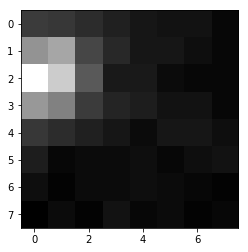

Spot reconstructed from gaussian fit parameters using sigma_min:


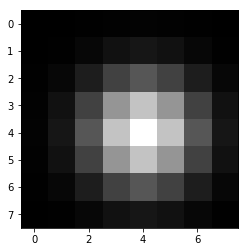

Spot reconstructed from gaussian fit parameters using sigma_max:


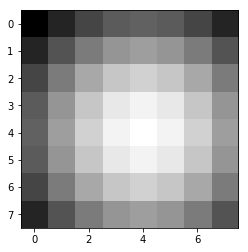

Original crop
[[36 35 32 29 26 25 25 22]
 [60 65 39 31 26 26 24 22]
 [89 75 44 27 27 23 22 22]
 [61 55 36 30 28 25 25 22]
 [35 32 29 26 23 26 26 24]
 [28 22 23 23 24 22 24 25]
 [24 21 23 23 24 23 22 21]
 [20 23 21 25 22 23 21 22]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  7  5  2  0]
 [ 0  2 10 23 30 23 10  2]
 [ 0  5 23 51 67 51 23  5]
 [ 1  7 30 67 89 67 30  7]
 [ 0  5 23 51 67 51 23  5]
 [ 0  2 10 23 30 23 10  2]
 [ 0  0  2  5  7  5  2  0]]
Reconstructed using sigma max
[[35 43 49 54 55 54 49 43]
 [43 52 61 66 68 66 61 52]
 [49 61 70 76 79 76 70 61]
 [54 66 76 83 86 83 76 66]
 [55 68 79 86 89 86 79 68]
 [54 66 76 83 86 83 76 66]
 [49 61 70 76 79 76 70 61]
 [43 52 61 66 68 66 61 52]]

---------------------------------------------------

x: 1720.1
y: 851.64
sigma_min: 1.4888976919619537
sigma_max: 1.9513597806560927
height: 44.393663029238986
max_intensity: 51


Original crop around spot at (1720, 851):


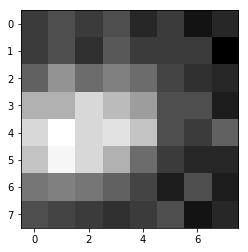

Spot reconstructed from gaussian fit parameters using sigma_min:


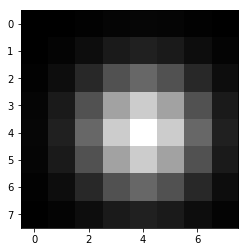

Spot reconstructed from gaussian fit parameters using sigma_max:


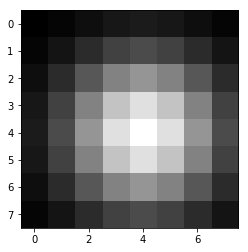

Original crop
[[31 33 31 33 29 31 27 29]
 [31 33 30 34 31 31 31 25]
 [35 40 36 38 36 32 30 29]
 [43 43 47 44 41 33 33 28]
 [47 51 47 48 45 33 31 35]
 [45 50 47 43 36 31 29 29]
 [37 38 37 35 32 28 33 28]
 [33 32 31 30 31 33 27 29]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  2  5  6  5  2  0]
 [ 0  2  8 16 20 16  8  2]
 [ 1  5 16 32 40 32 16  5]
 [ 1  6 20 40 51 40 20  6]
 [ 1  5 16 32 40 32 16  5]
 [ 0  2  8 16 20 16  8  2]
 [ 0  0  2  5  6  5  2  0]]
Reconstructed using sigma max
[[ 0  1  3  5  6  5  3  1]
 [ 1  4  9 13 15 13  9  4]
 [ 3  9 17 26 30 26 17  9]
 [ 5 13 26 39 44 39 26 13]
 [ 6 15 30 44 51 44 30 15]
 [ 5 13 26 39 44 39 26 13]
 [ 3  9 17 26 30 26 17  9]
 [ 1  4  9 13 15 13  9  4]]

---------------------------------------------------

x: 1734.4
y: 881.79
sigma_min: 1.030599030864788
sigma_max: 1.1046543978681254
height: 256.0494943483247
max_intensity: 255


Original crop around spot at (1734, 881):


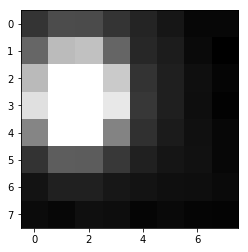

Spot reconstructed from gaussian fit parameters using sigma_min:


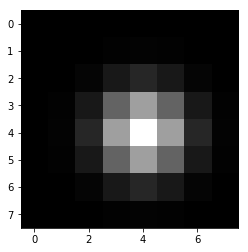

Spot reconstructed from gaussian fit parameters using sigma_max:


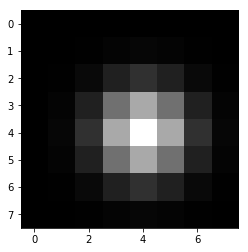

Original crop
[[ 85 105 104  85  72  60  47  47]
 [127 198 203 126  74  65  50  41]
 [197 255 255 210  84  67  54  46]
 [229 255 255 235  87  67  53  43]
 [153 255 255 152  82  64  55  47]
 [ 84 119 118  88  69  59  56  47]
 [ 57  68  69  61  57  54  53  50]
 [ 51  47  54  52  46  49  46  45]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  24  38  24   5   0]
 [  0   2  24  99 159  99  24   2]
 [  0   3  38 159 255 159  38   3]
 [  0   2  24  99 159  99  24   2]
 [  0   0   5  24  38  24   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  32  49  32   9   1]
 [  0   4  32 112 169 112  32   4]
 [  0   6  49 169 255 169  49   6]
 [  0   4  32 112 169 112  32   4]
 [  0   1   9  32  49  32   9   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 1773.3
y: 950.03
sigma_min

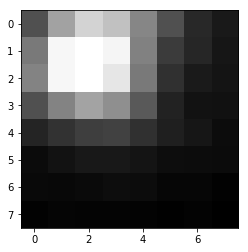

Spot reconstructed from gaussian fit parameters using sigma_min:


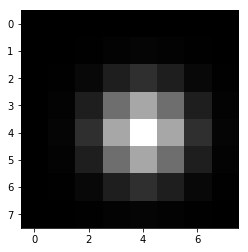

Spot reconstructed from gaussian fit parameters using sigma_max:


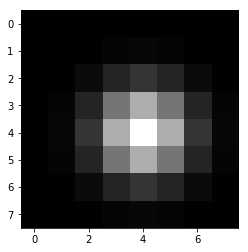

Original crop
[[104 175 217 201 151 104  70  57]
 [139 248 255 246 146  86  68  54]
 [149 248 255 233 140  77  58  53]
 [104 149 176 158 113  65  51  50]
 [ 66  78  89  91  77  62  54  46]
 [ 45  51  56  56  53  47  46  45]
 [ 43  42  44  47  46  41  41  37]
 [ 37  40  39  39  38  36  38  35]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   8  30  47  30   8   1]
 [  0   3  30 109 167 109  30   3]
 [  0   5  47 167 255 167  47   5]
 [  0   3  30 109 167 109  30   3]
 [  0   1   8  30  47  30   8   1]
 [  0   0   1   3   5   3   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   7   5   1   0]
 [  0   1  11  36  53  36  11   1]
 [  0   5  36 116 172 116  36   5]
 [  0   7  53 172 255 172  53   7]
 [  0   5  36 116 172 116  36   5]
 [  0   1  11  36  53  36  11   1]
 [  0   0   1   5   7   5   1   0]]

---------------------------------------------------

x: 1743.1
y: 975.41
sigma_min

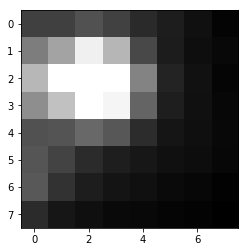

Spot reconstructed from gaussian fit parameters using sigma_min:


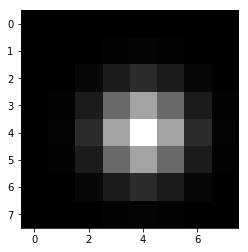

Spot reconstructed from gaussian fit parameters using sigma_max:


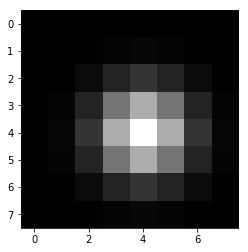

Original crop
[[ 93  93 108  95  75  64  53  43]
 [145 177 242 193 100  63  51  46]
 [194 255 255 255 150  69  54  44]
 [159 202 255 246 124  65  53  45]
 [108 110 127 113  77  57  52  46]
 [111  96  76  65  59  53  50  45]
 [114  82  64  56  53  48  45  41]
 [ 76  58  52  47  46  44  42  39]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   4   3   0   0]
 [  0   0   7  27  43  27   7   0]
 [  0   3  27 105 163 105  27   3]
 [  0   4  43 163 255 163  43   4]
 [  0   3  27 105 163 105  27   3]
 [  0   0   7  27  43  27   7   0]
 [  0   0   0   3   4   3   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   7   5   1   0]
 [  0   1  11  35  53  35  11   1]
 [  0   5  35 116 172 116  35   5]
 [  0   7  53 172 255 172  53   7]
 [  0   5  35 116 172 116  35   5]
 [  0   1  11  35  53  35  11   1]
 [  0   0   1   5   7   5   1   0]]

---------------------------------------------------

x: 164.55
y: 1285.6
sigma_min

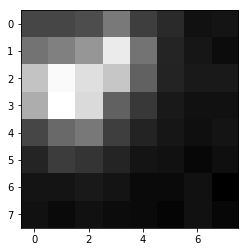

Spot reconstructed from gaussian fit parameters using sigma_min:


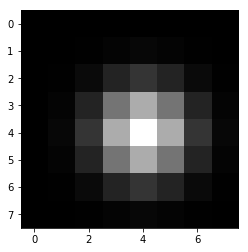

Spot reconstructed from gaussian fit parameters using sigma_max:


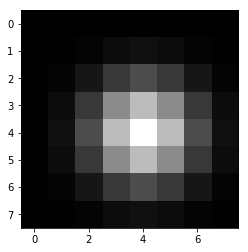

Original crop
[[ 49  49  52  70  46  38  28  29]
 [ 67  72  81 115  67  36  30  26]
 [ 99 121 110 100  60  35  31  31]
 [ 90 123 108  60  44  31  28  28]
 [ 49  63  69  46  35  30  27  29]
 [ 36  45  42  36  29  28  24  27]
 [ 29  29  31  29  25  25  28  21]
 [ 28  25  28  26  25  23  28  24]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  17  25  17   5   0]
 [  0   2  17  55  82  55  17   2]
 [  0   3  25  82 123  82  25   3]
 [  0   2  17  55  82  55  17   2]
 [  0   0   5  17  25  17   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   5   8   5   2   0]
 [  0   2  10  26  36  26  10   2]
 [  0   5  26  67  90  67  26   5]
 [  0   8  36  90 123  90  36   8]
 [  0   5  26  67  90  67  26   5]
 [  0   2  10  26  36  26  10   2]
 [  0   0   2   5   8   5   2   0]]

---------------------------------------------------

x: 172.48
y: 1260.3
sigma_min

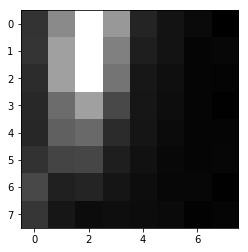

Spot reconstructed from gaussian fit parameters using sigma_min:


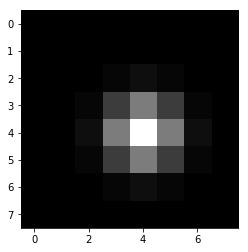

Spot reconstructed from gaussian fit parameters using sigma_max:


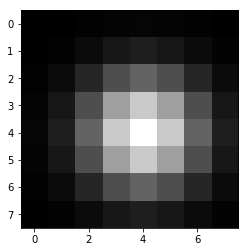

Original crop
[[ 72 150 255 162  59  43  35  26]
 [ 74 170 255 141  53  43  31  33]
 [ 67 170 255 130  47  40  31  30]
 [ 62 123 170  91  46  38  31  27]
 [ 61 112 121  65  45  36  31  31]
 [ 71  87  89  53  42  34  31  32]
 [ 91  56  59  45  38  33  33  27]
 [ 75  46  37  39  37  35  28  31]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   6  14   6   0   0]
 [  0   0   6  60 123  60   6   0]
 [  0   0  14 123 255 123  14   0]
 [  0   0   6  60 123  60   6   0]
 [  0   0   0   6  14   6   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   2   4   5   4   2   0]
 [  0   3  11  23  30  23  11   3]
 [  2  11  38  77  98  77  38  11]
 [  4  23  77 158 201 158  77  23]
 [  5  30  98 201 255 201  98  30]
 [  4  23  77 158 201 158  77  23]
 [  2  11  38  77  98  77  38  11]
 [  0   3  11  23  30  23  11   3]]

---------------------------------------------------

x: 169.31
y: 1397.5
sigma_min

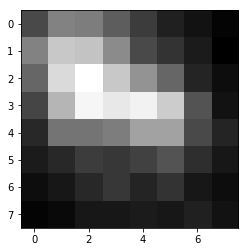

Spot reconstructed from gaussian fit parameters using sigma_min:


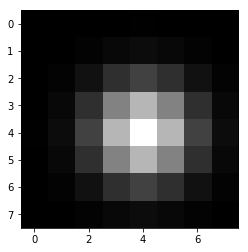

Spot reconstructed from gaussian fit parameters using sigma_max:


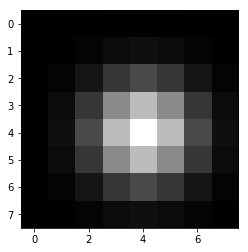

Original crop
[[34 46 45 38 31 25 22 19]
 [46 61 60 48 34 29 24 18]
 [40 65 73 61 50 40 26 21]
 [33 57 71 68 70 62 36 22]
 [27 43 43 45 53 53 34 26]
 [24 27 31 30 32 36 28 23]
 [21 23 27 30 26 29 23 21]
 [19 20 23 23 24 23 25 22]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 13 18 13  4  0]
 [ 0  2 13 37 52 37 13  2]
 [ 0  3 18 52 73 52 18  3]
 [ 0  2 13 37 52 37 13  2]
 [ 0  0  4 13 18 13  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 15 21 15  6  1]
 [ 0  3 15 39 53 39 15  3]
 [ 0  4 21 53 73 53 21  4]
 [ 0  3 15 39 53 39 15  3]
 [ 0  1  6 15 21 15  6  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 184.38
y: 1460.2
sigma_min: 1.1694646130297548
sigma_max: 1.3640221042280087
height: 83.49789861073216
max_intensity: 95


Original crop around spot at (184, 1460):


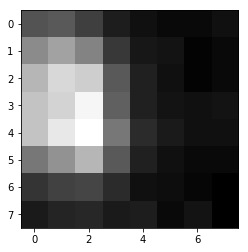

Spot reconstructed from gaussian fit parameters using sigma_min:


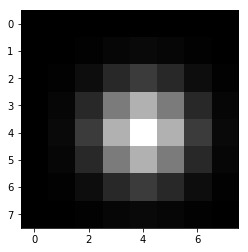

Spot reconstructed from gaussian fit parameters using sigma_max:


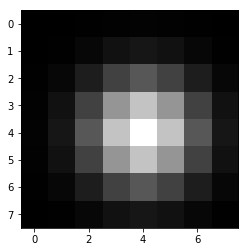

Original crop
[[43 45 37 27 23 21 21 23]
 [60 67 58 35 25 24 19 21]
 [73 83 80 45 28 23 19 21]
 [77 82 92 47 28 24 23 24]
 [77 88 95 54 31 26 23 23]
 [54 62 73 45 28 23 21 21]
 [34 38 39 31 23 22 20 18]
 [26 29 30 26 27 21 24 18]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  5 15 22 15  5  0]
 [ 0  2 15 45 65 45 15  2]
 [ 0  3 22 65 95 65 22  3]
 [ 0  2 15 45 65 45 15  2]
 [ 0  0  5 15 22 15  5  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  6  8  6  2  0]
 [ 0  2 11 24 32 24 11  2]
 [ 0  6 24 55 72 55 24  6]
 [ 1  8 32 72 95 72 32  8]
 [ 0  6 24 55 72 55 24  6]
 [ 0  2 11 24 32 24 11  2]
 [ 0  0  2  6  8  6  2  0]]

---------------------------------------------------

x: 162.17
y: 1476.1
sigma_min: 1.1066248017242755
sigma_max: 1.3678666571523568
height: 91.19500036797179
max_intensity: 158


Original crop around spot at (162, 1476):


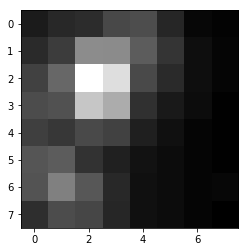

Spot reconstructed from gaussian fit parameters using sigma_min:


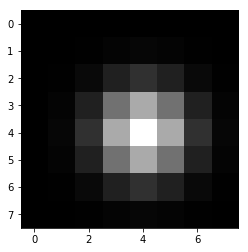

Spot reconstructed from gaussian fit parameters using sigma_max:


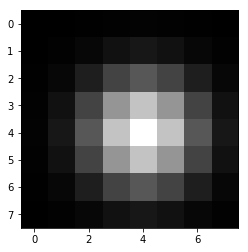

Original crop
[[ 35  42  44  59  62  41  24  22]
 [ 43  53  96  95  70  49  28  23]
 [ 56  76 158 140  60  43  28  23]
 [ 61  64 127 113  46  34  27  21]
 [ 54  50  60  56  37  29  23  21]
 [ 66  70  47  38  30  27  23  21]
 [ 65  89  67  42  29  27  23  24]
 [ 45  61  58  41  29  27  23  20]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  20  30  20   6   0]
 [  0   2  20  69 105  69  20   2]
 [  0   4  30 105 158 105  30   4]
 [  0   2  20  69 105  69  20   2]
 [  0   0   6  20  30  20   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   2   1   0   0]
 [  0   1   4  10  14  10   4   1]
 [  0   4  18  41  54  41  18   4]
 [  1  10  41  92 120  92  41  10]
 [  2  14  54 120 158 120  54  14]
 [  1  10  41  92 120  92  41  10]
 [  0   4  18  41  54  41  18   4]
 [  0   1   4  10  14  10   4   1]]

---------------------------------------------------

x: 183.59
y: 1508.6
sigma_min

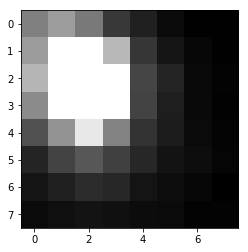

Spot reconstructed from gaussian fit parameters using sigma_min:


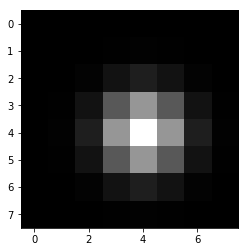

Spot reconstructed from gaussian fit parameters using sigma_max:


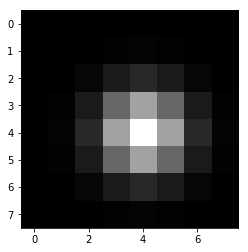

Original crop
[[142 168 137  79  58  39  30  30]
 [166 255 255 192  77  48  36  30]
 [189 255 255 255  90  60  37  32]
 [152 255 255 255  89  56  37  31]
 [100 159 234 144  74  54  38  33]
 [ 62  89 106  86  64  46  41  34]
 [ 47  59  69  64  47  41  36  29]
 [ 38  43  46  44  40  38  32  32]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  17  30  17   3   0]
 [  0   1  17  88 149  88  17   1]
 [  0   2  30 149 255 149  30   2]
 [  0   1  17  88 149  88  17   1]
 [  0   0   3  17  30  17   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  26  41  26   6   0]
 [  0   2  26 102 161 102  26   2]
 [  0   4  41 161 255 161  41   4]
 [  0   2  26 102 161 102  26   2]
 [  0   0   6  26  41  26   6   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 207.39
y: 1538.7
sigma_min

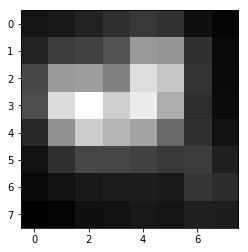

Spot reconstructed from gaussian fit parameters using sigma_min:


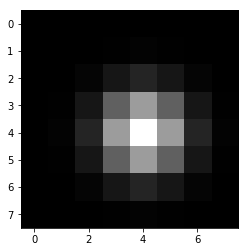

Spot reconstructed from gaussian fit parameters using sigma_max:


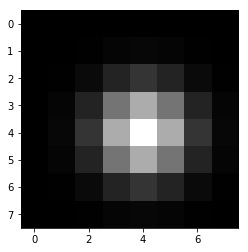

Original crop
[[ 52  54  63  76  83  77  47  38]
 [ 63  85  90 105 166 163  75  40]
 [ 95 167 170 145 225 206  78  42]
 [ 99 224 255 212 238 183  73  43]
 [ 68 159 211 190 174 124  75  49]
 [ 48  76  94  94  91  83  86  60]
 [ 41  49  54  58  59  56  80  72]
 [ 33  37  47  49  54  51  60  59]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   3   1   0   0]
 [  0   0   5  21  35  21   5   0]
 [  0   1  21  95 156  95  21   1]
 [  0   3  35 156 255 156  35   3]
 [  0   1  21  95 156  95  21   1]
 [  0   0   5  21  35  21   5   0]
 [  0   0   0   1   3   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   7   4   1   0]
 [  0   1  10  35  52  35  10   1]
 [  0   4  35 116 172 116  35   4]
 [  0   7  52 172 255 172  52   7]
 [  0   4  35 116 172 116  35   4]
 [  0   1  10  35  52  35  10   1]
 [  0   0   1   4   7   4   1   0]]

---------------------------------------------------

x: 272.45
y: 1558.6
sigma_min

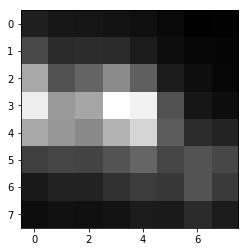

Spot reconstructed from gaussian fit parameters using sigma_min:


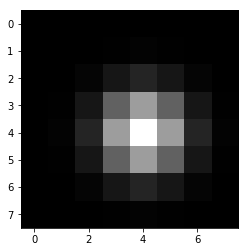

Spot reconstructed from gaussian fit parameters using sigma_max:


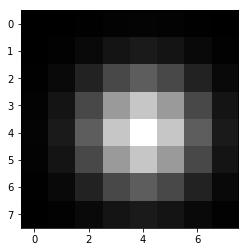

Original crop
[[ 55  49  47  45  43  38  31  33]
 [ 87  63  65  63  52  41  37  35]
 [159  93 107 137 103  52  42  36]
 [211 147 157 225 215  93  48  41]
 [159 146 135 167 193 101  65  58]
 [ 79  84  82  94 108  84  94  85]
 [ 50  57  57  68  77  73  94  75]
 [ 41  44  43  45  52  51  64  52]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  19  32  19   4   0]
 [  0   1  19  85 138  85  19   1]
 [  0   2  32 138 225 138  32   2]
 [  0   1  19  85 138  85  19   1]
 [  0   0   4  19  32  19   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   1   3   3   3   1   0]
 [  0   2   8  18  23  18   8   2]
 [  1   8  29  63  82  63  29   8]
 [  3  18  63 135 174 135  63  18]
 [  3  23  82 174 225 174  82  23]
 [  3  18  63 135 174 135  63  18]
 [  1   8  29  63  82  63  29   8]
 [  0   2   8  18  23  18   8   2]]

---------------------------------------------------

x: 318.47
y: 1483.2
sigma_min

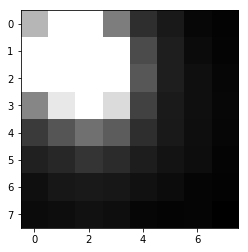

Spot reconstructed from gaussian fit parameters using sigma_min:


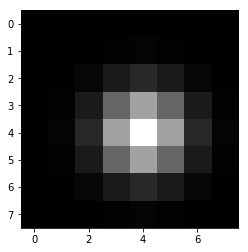

Spot reconstructed from gaussian fit parameters using sigma_max:


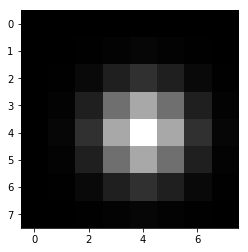

Original crop
[[190 255 255 140  71  52  37  33]
 [255 255 255 255  96  57  40  34]
 [255 255 255 255 107  57  44  36]
 [148 234 255 223  88  53  44  37]
 [ 81 105 129 111  71  52  43  36]
 [ 59  65  77  68  56  47  42  34]
 [ 44  51  52  51  45  41  35  33]
 [ 40  42  45  43  36  34  35  30]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  26  41  26   6   0]
 [  0   2  26 102 161 102  26   2]
 [  0   4  41 161 255 161  41   4]
 [  0   2  26 102 161 102  26   2]
 [  0   0   6  26  41  26   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   6   3   1   0]
 [  0   1   9  31  48  31   9   1]
 [  0   3  31 110 168 110  31   3]
 [  0   6  48 168 255 168  48   6]
 [  0   3  31 110 168 110  31   3]
 [  0   1   9  31  48  31   9   1]
 [  0   0   1   3   6   3   1   0]]

---------------------------------------------------

x: 355.76
y: 1388.8
sigma_min

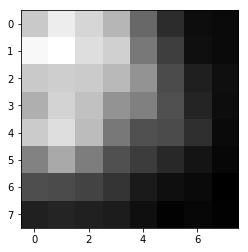

Spot reconstructed from gaussian fit parameters using sigma_min:


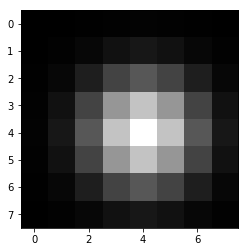

Spot reconstructed from gaussian fit parameters using sigma_max:


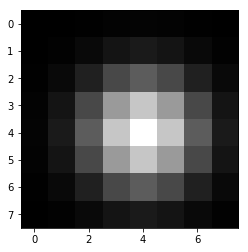

Original crop
[[101 115 106  94  64  41  29  28]
 [119 122 109 104  70  48  30  28]
 [101 103 102  95  81  53  36  30]
 [ 91 105  98  81  73  55  38  29]
 [102 109  96  70  55  53  42  28]
 [ 74  89  72  55  47  40  32  27]
 [ 54  53  50  44  34  30  28  24]
 [ 37  38  37  35  30  25  27  25]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   8  11   8   3   0]
 [  0   3  14  32  41  32  14   3]
 [  1   8  32  71  93  71  32   8]
 [  1  11  41  93 122  93  41  11]
 [  1   8  32  71  93  71  32   8]
 [  0   3  14  32  41  32  14   3]
 [  0   0   3   8  11   8   3   0]]
Reconstructed using sigma max
[[  0   0   0   1   2   1   0   0]
 [  0   1   4   9  12   9   4   1]
 [  0   4  16  34  44  34  16   4]
 [  1   9  34  73  94  73  34   9]
 [  2  12  44  94 122  94  44  12]
 [  1   9  34  73  94  73  34   9]
 [  0   4  16  34  44  34  16   4]
 [  0   1   4   9  12   9   4   1]]

---------------------------------------------------

x: 365.28
y: 1315.8
sigma_min

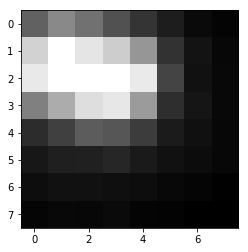

Spot reconstructed from gaussian fit parameters using sigma_min:


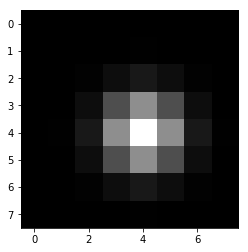

Spot reconstructed from gaussian fit parameters using sigma_max:


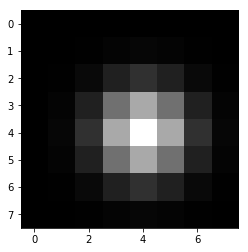

Original crop
[[113 149 128  99  74  52  35  30]
 [214 255 231 210 161  71  43  33]
 [235 255 255 255 236  87  42  34]
 [141 180 225 233 165  68  45  34]
 [ 66  84 109 103  81  51  41  33]
 [ 47  54  56  60  50  42  37  33]
 [ 38  42  42  40  38  34  31  27]
 [ 31  34  33  35  30  29  26  26]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  13  24  13   2   0]
 [  0   0  13  78 141  78  13   0]
 [  0   1  24 141 255 141  24   1]
 [  0   0  13  78 141  78  13   0]
 [  0   0   2  13  24  13   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  32  49  32   9   1]
 [  0   4  32 112 169 112  32   4]
 [  0   6  49 169 255 169  49   6]
 [  0   4  32 112 169 112  32   4]
 [  0   1   9  32  49  32   9   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 489.85
y: 1585.5
sigma_min

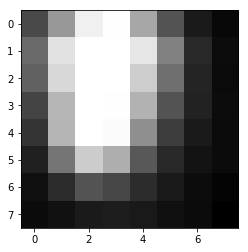

Spot reconstructed from gaussian fit parameters using sigma_min:


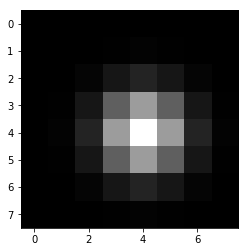

Spot reconstructed from gaussian fit parameters using sigma_max:


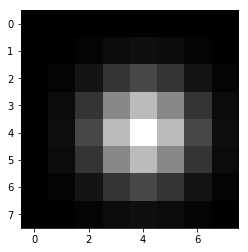

Original crop
[[ 98 166 242 254 179 107  58  42]
 [126 230 255 255 233 146  70  46]
 [120 221 255 255 212 131  67  44]
 [ 94 192 255 254 188 107  65  46]
 [ 81 191 255 251 158  87  58  45]
 [ 64 136 211 185 111  70  52  45]
 [ 49  74 107  96  74  57  46  39]
 [ 45  50  58  60  57  49  45  35]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   3   1   0   0]
 [  0   0   5  21  35  21   5   0]
 [  0   1  21  95 156  95  21   1]
 [  0   3  35 156 255 156  35   3]
 [  0   1  21  95 156  95  21   1]
 [  0   0   5  21  35  21   5   0]
 [  0   0   0   1   3   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   4  11  15  11   4   0]
 [  0   4  20  53  72  53  20   4]
 [  1  11  53 136 186 136  53  11]
 [  1  15  72 186 255 186  72  15]
 [  1  11  53 136 186 136  53  11]
 [  0   4  20  53  72  53  20   4]
 [  0   0   4  11  15  11   4   0]]

---------------------------------------------------

x: 159.79
y: 1113.5
sigma_min

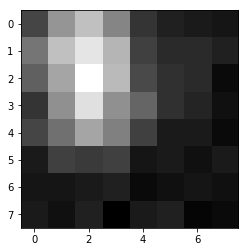

Spot reconstructed from gaussian fit parameters using sigma_min:


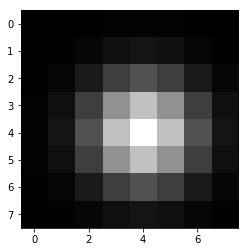

Spot reconstructed from gaussian fit parameters using sigma_max:


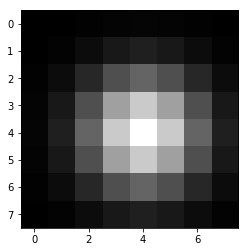

Original crop
[[31 46 54 43 28 24 23 22]
 [40 54 61 52 30 26 26 24]
 [36 49 66 53 32 27 26 20]
 [28 45 60 45 37 27 25 21]
 [31 39 49 42 30 23 23 20]
 [23 30 29 30 22 23 21 23]
 [22 22 23 24 20 21 22 21]
 [23 21 24 18 23 24 19 20]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  5  3  1  0]
 [ 0  1  6 16 21 16  6  1]
 [ 0  3 16 37 49 37 16  3]
 [ 0  5 21 49 66 49 21  5]
 [ 0  3 16 37 49 37 16  3]
 [ 0  1  6 16 21 16  6  1]
 [ 0  0  1  3  5  3  1  0]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  3  6  8  6  3  0]
 [ 0  3 10 20 25 20 10  3]
 [ 1  6 20 41 52 41 20  6]
 [ 1  8 25 52 66 52 25  8]
 [ 1  6 20 41 52 41 20  6]
 [ 0  3 10 20 25 20 10  3]
 [ 0  0  3  6  8  6  3  0]]

---------------------------------------------------

x: 255.79
y: 1097.6
sigma_min: 1.5312554463709431
sigma_max: 5.1604357912547965
height: 32107.267066309727
max_intensity: 60


Original crop around spot at (255, 1097):


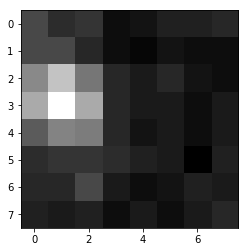

Spot reconstructed from gaussian fit parameters using sigma_min:


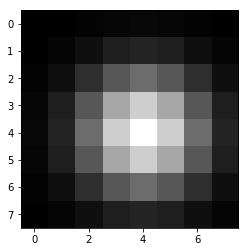

Spot reconstructed from gaussian fit parameters using sigma_max:


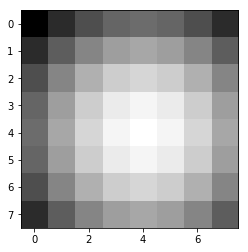

Original crop
[[32 28 29 23 24 26 26 27]
 [32 32 27 23 22 24 23 23]
 [42 51 39 27 25 27 24 23]
 [47 60 47 27 25 25 23 25]
 [35 41 40 27 24 25 23 25]
 [28 29 29 28 26 25 21 26]
 [27 27 32 25 23 24 26 25]
 [26 25 26 23 25 23 25 27]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  1  3  7  8  7  3  1]
 [ 0  3 10 20 25 20 10  3]
 [ 1  7 20 39 48 39 20  7]
 [ 1  8 25 48 60 48 25  8]
 [ 1  7 20 39 48 39 20  7]
 [ 0  3 10 20 25 20 10  3]
 [ 0  1  3  7  8  7  3  1]]
Reconstructed using sigma max
[[32 37 41 43 44 43 41 37]
 [37 42 47 49 50 49 47 42]
 [41 47 51 54 55 54 51 47]
 [43 49 54 57 58 57 54 49]
 [44 50 55 58 60 58 55 50]
 [43 49 54 57 58 57 54 49]
 [41 47 51 54 55 54 51 47]
 [37 42 47 49 50 49 47 42]]

---------------------------------------------------

x: 577.12
y: 1346.7
sigma_min: 1.217590150816984
sigma_max: 1.2685986604646238
height: 79.81177284739063
max_intensity: 101


Original crop around spot at (577, 1346):


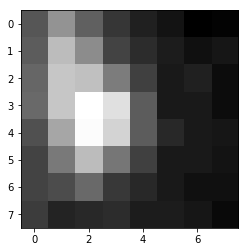

Spot reconstructed from gaussian fit parameters using sigma_min:


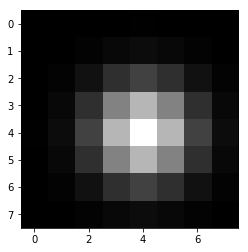

Spot reconstructed from gaussian fit parameters using sigma_max:


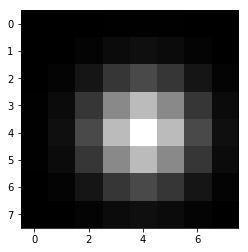

Original crop
[[ 48  67  51  38  31  27  21  22]
 [ 50  80  65  42  35  30  26  28]
 [ 53  83  81  60  41  29  31  25]
 [ 54  83 101  91  50  29  29  25]
 [ 46  73 100  87  50  34  29  28]
 [ 42  59  80  58  41  29  29  27]
 [ 42  45  54  39  34  29  26  26]
 [ 40  32  34  35  30  30  28  24]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   4   3   1   0]
 [  0   1   6  18  26  18   6   1]
 [  0   3  18  51  72  51  18   3]
 [  0   4  26  72 101  72  26   4]
 [  0   3  18  51  72  51  18   3]
 [  0   1   6  18  26  18   6   1]
 [  0   0   1   3   4   3   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   8  21  29  21   8   1]
 [  0   4  21  54  74  54  21   4]
 [  0   6  29  74 101  74  29   6]
 [  0   4  21  54  74  54  21   4]
 [  0   1   8  21  29  21   8   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 594.58
y: 1495.9
sigma_min

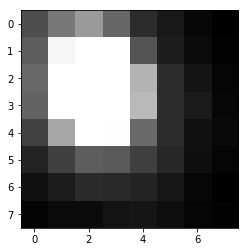

Spot reconstructed from gaussian fit parameters using sigma_min:


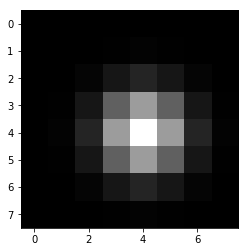

Spot reconstructed from gaussian fit parameters using sigma_max:


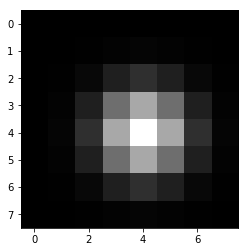

Original crop
[[107 142 170 127  78  62  47  41]
 [119 247 255 255 112  66  51  43]
 [128 255 255 255 191  78  58  46]
 [124 255 255 255 196  78  64  47]
 [ 96 181 255 254 130  79  55  49]
 [ 71  95 119 117  94  74  54  46]
 [ 55  65  77  76  72  61  47  41]
 [ 45  51  51  57  59  53  46  44]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   3   1   0   0]
 [  0   0   5  22  35  22   5   0]
 [  0   1  22  95 156  95  22   1]
 [  0   3  35 156 255 156  35   3]
 [  0   1  22  95 156  95  22   1]
 [  0   0   5  22  35  22   5   0]
 [  0   0   0   1   3   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   8  31  47  31   8   1]
 [  0   3  31 110 167 110  31   3]
 [  0   5  47 167 255 167  47   5]
 [  0   3  31 110 167 110  31   3]
 [  0   1   8  31  47  31   8   1]
 [  0   0   1   3   5   3   1   0]]

---------------------------------------------------

x: 679.47
y: 1438.0
sigma_min

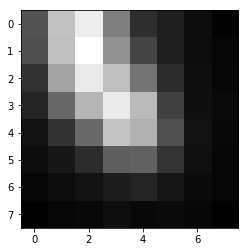

Spot reconstructed from gaussian fit parameters using sigma_min:


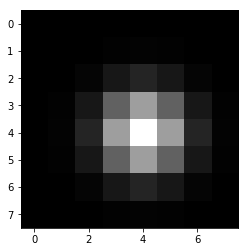

Spot reconstructed from gaussian fit parameters using sigma_max:


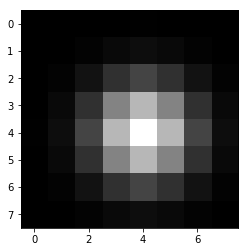

Original crop
[[ 99 187 221 134  71  58  44  36]
 [ 96 185 236 149  88  58  43  38]
 [ 73 163 218 185 125  69  45  39]
 [ 63 115 177 219 181  86  45  41]
 [ 48  73 117 188 174  97  48  40]
 [ 44  52  69 108 110  75  46  38]
 [ 39  44  48  56  63  51  42  38]
 [ 33  38  40  45  40  42  39  34]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   3   1   0   0]
 [  0   0   5  21  34  21   5   0]
 [  0   1  21  90 145  90  21   1]
 [  0   3  34 145 236 145  34   3]
 [  0   1  21  90 145  90  21   1]
 [  0   0   5  21  34  21   5   0]
 [  0   0   0   1   3   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   8  12   8   3   0]
 [  0   3  16  45  62  45  16   3]
 [  0   8  45 121 169 121  45   8]
 [  1  12  62 169 236 169  62  12]
 [  0   8  45 121 169 121  45   8]
 [  0   3  16  45  62  45  16   3]
 [  0   0   3   8  12   8   3   0]]

---------------------------------------------------

x: 582.68
y: 1269.8
sigma_min

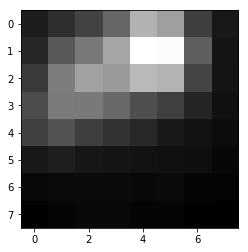

Spot reconstructed from gaussian fit parameters using sigma_min:


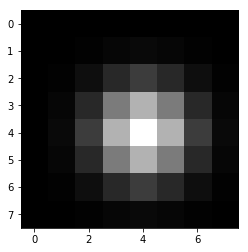

Spot reconstructed from gaussian fit parameters using sigma_max:


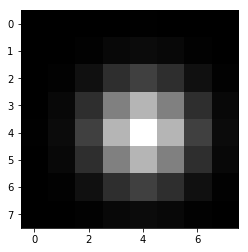

Original crop
[[ 62  76  94 124 188 172  91  58]
 [ 70 112 141 177 254 251 118  55]
 [ 87 143 174 168 194 189  95  54]
 [102 142 141 127 104  92  68  51]
 [ 93 108  90  81  71  59  53  48]
 [ 58  64  57  55  53  51  49  43]
 [ 44  46  46  47  44  47  42  41]
 [ 38  42  45  45  42  42  37  37]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  13  41  59  41  13   2]
 [  0   6  41 123 176 123  41   6]
 [  0   9  59 176 254 176  59   9]
 [  0   6  41 123 176 123  41   6]
 [  0   2  13  41  59  41  13   2]
 [  0   0   2   6   9   6   2   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   8  11   8   2   0]
 [  0   2  16  45  64  45  16   2]
 [  0   8  45 127 180 127  45   8]
 [  1  11  64 180 254 180  64  11]
 [  0   8  45 127 180 127  45   8]
 [  0   2  16  45  64  45  16   2]
 [  0   0   2   8  11   8   2   0]]

---------------------------------------------------

x: 668.36
y: 1265.0
sigma_min

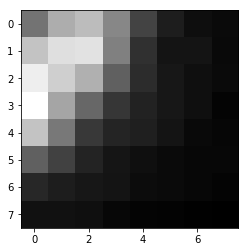

Spot reconstructed from gaussian fit parameters using sigma_min:


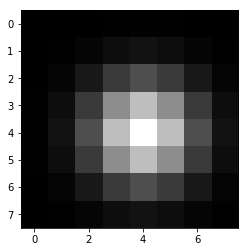

Spot reconstructed from gaussian fit parameters using sigma_max:


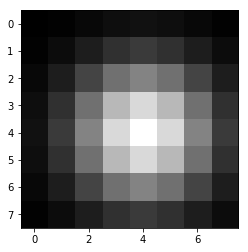

Original crop
[[107 144 154 120  76  52  42  40]
 [158 176 178 115  65  46  46  39]
 [186 166 146  95  62  48  43  40]
 [197 139  99  68  55  48  43  36]
 [159 110  69  57  53  46  39  37]
 [ 95  75  56  47  43  40  38  38]
 [ 58  52  48  46  41  40  38  36]
 [ 44  44  43  38  36  35  34  33]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   0   4  10  13  10   4   0]
 [  0   4  18  45  60  45  18   4]
 [  1  10  45 109 146 109  45  10]
 [  1  13  60 146 197 146  60  13]
 [  1  10  45 109 146 109  45  10]
 [  0   4  18  45  60  45  18   4]
 [  0   0   4  10  13  10   4   0]]
Reconstructed using sigma max
[[  1   3   7  12  14  12   7   3]
 [  3  10  23  38  45  38  23  10]
 [  7  23  53  87 102  87  53  23]
 [ 12  38  87 142 167 142  87  38]
 [ 14  45 102 167 197 167 102  45]
 [ 12  38  87 142 167 142  87  38]
 [  7  23  53  87 102  87  53  23]
 [  3  10  23  38  45  38  23  10]]

---------------------------------------------------

x: 613.62
y: 1192.0
sigma_min

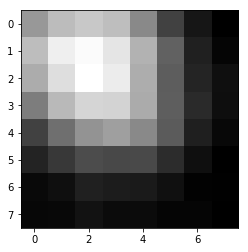

Spot reconstructed from gaussian fit parameters using sigma_min:


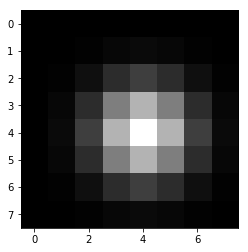

Spot reconstructed from gaussian fit parameters using sigma_max:


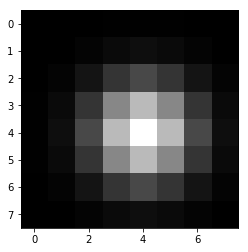

Original crop
[[154 179 188 181 143  93  62  46]
 [180 215 224 208 172 115  69  50]
 [168 203 227 213 169 112  72  57]
 [135 177 197 196 167 113  76  56]
 [ 92 125 151 159 143 111  68  52]
 [ 71  87 100  97  98  78  57  46]
 [ 53  57  69  66  65  58  48  47]
 [ 51  52  59  54  54  50  50  46]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  13  39  55  39  13   2]
 [  0   6  39 112 159 112  39   6]
 [  0   9  55 159 227 159  55   9]
 [  0   6  39 112 159 112  39   6]
 [  0   2  13  39  55  39  13   2]
 [  0   0   2   6   9   6   2   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   9  13   9   3   0]
 [  0   3  17  46  63  46  17   3]
 [  1   9  46 120 165 120  46   9]
 [  1  13  63 165 227 165  63  13]
 [  1   9  46 120 165 120  46   9]
 [  0   3  17  46  63  46  17   3]
 [  0   0   3   9  13   9   3   0]]

---------------------------------------------------

x: 959.55
y: 1147.6
sigma_min

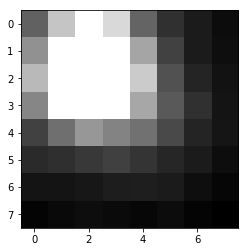

Spot reconstructed from gaussian fit parameters using sigma_min:


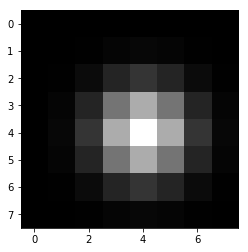

Spot reconstructed from gaussian fit parameters using sigma_max:


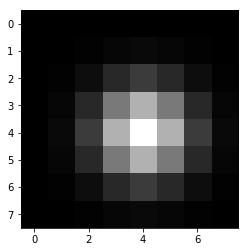

Original crop
[[125 207 255 223 127  84  67  54]
 [164 255 255 255 180  99  67  56]
 [197 255 255 255 212 112  74  59]
 [155 255 255 255 182 119  85  61]
 [ 99 136 169 152 138 105  75  62]
 [ 79  83  91  97  87  76  67  55]
 [ 61  61  63  68  69  67  56  49]
 [ 48  52  55  53  50  54  48  44]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   7   5   1   0]
 [  0   1  11  35  53  35  11   1]
 [  0   5  35 116 172 116  35   5]
 [  0   7  53 172 255 172  53   7]
 [  0   5  35 116 172 116  35   5]
 [  0   1  11  35  53  35  11   1]
 [  0   0   1   5   7   5   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  13  40  58  40  13   2]
 [  0   6  40 122 176 122  40   6]
 [  0   9  58 176 255 176  58   9]
 [  0   6  40 122 176 122  40   6]
 [  0   2  13  40  58  40  13   2]
 [  0   0   2   6   9   6   2   0]]

---------------------------------------------------

x: 1006.4
y: 1186.5
sigma_min

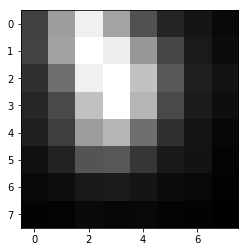

Spot reconstructed from gaussian fit parameters using sigma_min:


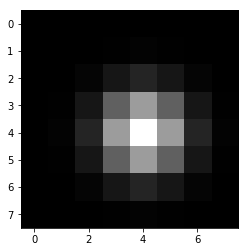

Spot reconstructed from gaussian fit parameters using sigma_max:


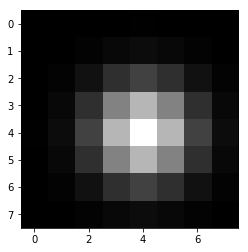

Original crop
[[ 97 174 242 179 111  73  60  50]
 [ 98 176 255 241 168 101  64  52]
 [ 82 135 242 255 204 116  69  58]
 [ 74 104 203 255 193 104  65  54]
 [ 68  94 173 194 135  83  59  48]
 [ 56  71 112 115  87  63  58  46]
 [ 50  54  63  65  60  52  49  45]
 [ 45  46  51  47  49  46  45  42]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   3   1   0   0]
 [  0   0   5  22  36  22   5   0]
 [  0   1  22  95 156  95  22   1]
 [  0   3  36 156 255 156  36   3]
 [  0   1  22  95 156  95  22   1]
 [  0   0   5  22  36  22   5   0]
 [  0   0   0   1   3   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   8  12   8   3   0]
 [  0   3  16  46  65  46  16   3]
 [  0   8  46 129 181 129  46   8]
 [  1  12  65 181 255 181  65  12]
 [  0   8  46 129 181 129  46   8]
 [  0   3  16  46  65  46  16   3]
 [  0   0   3   8  12   8   3   0]]

---------------------------------------------------

x: 1024.6
y: 1226.9
sigma_min

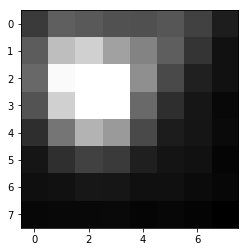

Spot reconstructed from gaussian fit parameters using sigma_min:


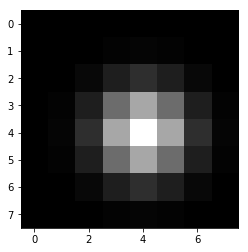

Spot reconstructed from gaussian fit parameters using sigma_max:


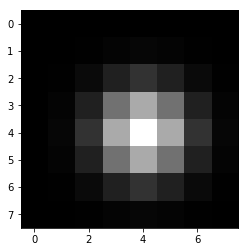

Original crop
[[ 90 121 116 110 108 113  96  66]
 [118 200 215 176 152 120  86  56]
 [128 250 255 255 161 103  69  56]
 [111 215 255 255 129  80  60  48]
 [ 80 139 191 170 103  65  59  50]
 [ 59  81  96  90  67  58  56  46]
 [ 54  56  61  60  55  55  51  47]
 [ 47  48  48  49  46  47  45  41]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   5   3   0   0]
 [  0   0   8  30  46  30   8   0]
 [  0   3  30 108 166 108  30   3]
 [  0   5  46 166 255 166  46   5]
 [  0   3  30 108 166 108  30   3]
 [  0   0   8  30  46  30   8   0]
 [  0   0   0   3   5   3   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  33  50  33   9   1]
 [  0   4  33 113 170 113  33   4]
 [  0   6  50 170 255 170  50   6]
 [  0   4  33 113 170 113  33   4]
 [  0   1   9  33  50  33   9   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 1048.4
y: 1228.5
sigma_min

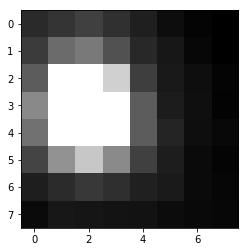

Spot reconstructed from gaussian fit parameters using sigma_min:


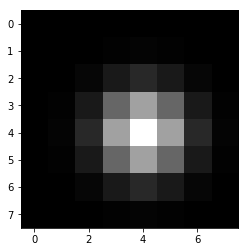

Spot reconstructed from gaussian fit parameters using sigma_max:


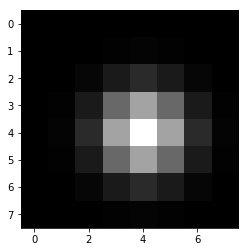

Original crop
[[ 80  89  98  85  71  56  49  45]
 [ 94 133 145 113  79  64  51  45]
 [121 255 255 216  96  66  57  49]
 [158 255 255 255 121  68  58  48]
 [139 255 255 255 121  75  57  52]
 [101 165 209 159  98  69  54  49]
 [ 70  81  91  84  72  67  54  50]
 [ 54  64  63  61  60  55  53  51]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  25  40  25   6   0]
 [  0   2  25 101 161 101  25   2]
 [  0   4  40 161 255 161  40   4]
 [  0   2  25 101 161 101  25   2]
 [  0   0   6  25  40  25   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  26  42  26   6   0]
 [  0   2  26 103 162 103  26   2]
 [  0   4  42 162 255 162  42   4]
 [  0   2  26 103 162 103  26   2]
 [  0   0   6  26  42  26   6   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 982.56
y: 1262.6
sigma_min

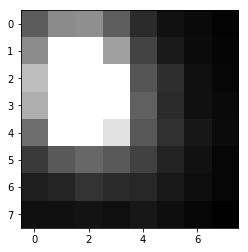

Spot reconstructed from gaussian fit parameters using sigma_min:


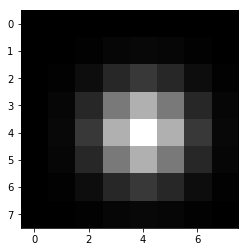

Spot reconstructed from gaussian fit parameters using sigma_max:


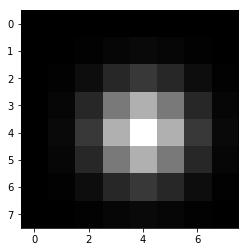

Original crop
[[127 164 167 129  89  69  63  58]
 [165 255 255 180 108  76  64  59]
 [204 255 255 255 122  91  68  60]
 [191 255 255 255 130  88  68  63]
 [141 255 255 232 123  93  73  64]
 [101 126 136 126 107  83  69  60]
 [ 79  84  95  89  86  74  66  60]
 [ 67  68  70  67  73  66  60  55]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   8   6   2   0]
 [  0   2  12  39  57  39  12   2]
 [  0   6  39 121 175 121  39   6]
 [  0   8  57 175 255 175  57   8]
 [  0   6  39 121 175 121  39   6]
 [  0   2  12  39  57  39  12   2]
 [  0   0   2   6   8   6   2   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   8   6   2   0]
 [  0   2  13  39  57  39  13   2]
 [  0   6  39 121 175 121  39   6]
 [  0   8  57 175 255 175  57   8]
 [  0   6  39 121 175 121  39   6]
 [  0   2  13  39  57  39  13   2]
 [  0   0   2   6   8   6   2   0]]

---------------------------------------------------

x: 957.17
y: 1368.2
sigma_min

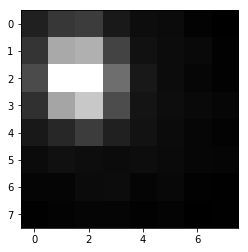

Spot reconstructed from gaussian fit parameters using sigma_min:


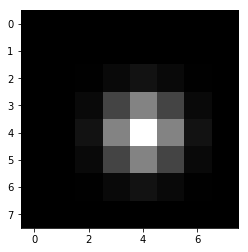

Spot reconstructed from gaussian fit parameters using sigma_max:


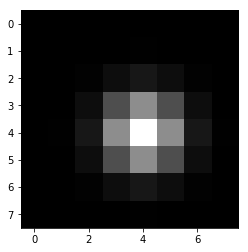

Original crop
[[ 62  82  87  56  46  44  37  34]
 [ 79 180 186  92  49  45  42  36]
 [ 99 255 255 129  55  45  40  36]
 [ 77 177 207 100  52  46  42  40]
 [ 55  68  87  62  50  44  40  37]
 [ 44  48  46  44  46  43  40  39]
 [ 39  39  44  45  39  41  36  35]
 [ 35  37  39  39  36  38  34  35]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   9  18   9   1   0]
 [  0   0   9  67 131  67   9   0]
 [  0   0  18 131 255 131  18   0]
 [  0   0   9  67 131  67   9   0]
 [  0   0   1   9  18   9   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  13  23  13   2   0]
 [  0   0  13  78 141  78  13   0]
 [  0   1  23 141 255 141  23   1]
 [  0   0  13  78 141  78  13   0]
 [  0   0   2  13  23  13   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 996.84
y: 1328.5
sigma_min

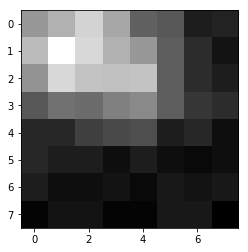

Spot reconstructed from gaussian fit parameters using sigma_min:


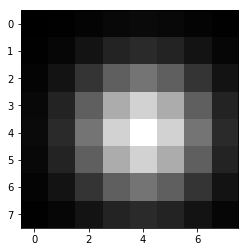

Spot reconstructed from gaussian fit parameters using sigma_max:


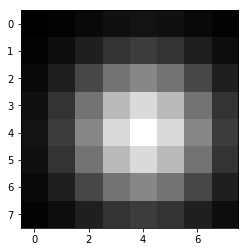

Original crop
[[60 65 72 63 49 47 35 36]
 [67 81 73 65 60 48 38 33]
 [59 73 69 68 69 48 38 35]
 [47 52 51 55 57 48 40 38]
 [37 37 42 44 45 35 37 32]
 [37 35 35 32 35 32 31 32]
 [35 32 32 33 31 34 33 34]
 [30 33 33 30 30 34 34 29]]
Reconstructed using sigma min
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  6 11 13 11  6  2]
 [ 1  6 16 30 36 30 16  6]
 [ 2 11 30 54 66 54 30 11]
 [ 3 13 36 66 81 66 36 13]
 [ 2 11 30 54 66 54 30 11]
 [ 1  6 16 30 36 30 16  6]
 [ 0  2  6 11 13 11  6  2]]
Reconstructed using sigma max
[[ 0  1  3  5  6  5  3  1]
 [ 1  4 10 16 19 16 10  4]
 [ 3 10 22 36 43 36 22 10]
 [ 5 16 36 59 69 59 36 16]
 [ 6 19 43 69 81 69 43 19]
 [ 5 16 36 59 69 59 36 16]
 [ 3 10 22 36 43 36 22 10]
 [ 1  4 10 16 19 16 10  4]]

---------------------------------------------------

x: 957.96
y: 1238.8
sigma_min: 1.8408150965527135
sigma_max: 2.0218401233991883
height: 51.017009749240636
max_intensity: 70


Original crop around spot at (957, 1238):


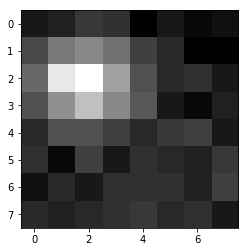

Spot reconstructed from gaussian fit parameters using sigma_min:


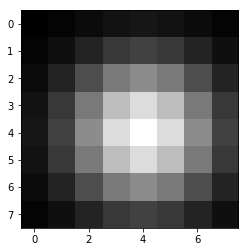

Spot reconstructed from gaussian fit parameters using sigma_max:


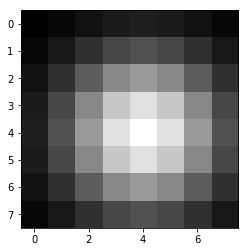

Original crop
[[41 42 45 44 38 41 39 40]
 [47 53 55 52 46 43 38 38]
 [51 67 70 58 48 43 44 41]
 [48 56 62 55 49 41 39 42]
 [43 48 48 46 43 45 46 41]
 [44 39 46 41 44 43 42 45]
 [40 43 41 44 44 44 42 46]
 [43 42 43 44 45 43 44 41]]
Reconstructed using sigma min
[[ 0  1  3  5  6  5  3  1]
 [ 1  4 10 16 18 16 10  4]
 [ 3 10 21 33 38 33 21 10]
 [ 5 16 33 52 60 52 33 16]
 [ 6 18 38 60 70 60 38 18]
 [ 5 16 33 52 60 52 33 16]
 [ 3 10 21 33 38 33 21 10]
 [ 1  4 10 16 18 16 10  4]]
Reconstructed using sigma max
[[ 1  3  6  8  9  8  6  3]
 [ 3  7 14 20 23 20 14  7]
 [ 6 14 26 37 42 37 26 14]
 [ 8 20 37 54 61 54 37 20]
 [ 9 23 42 61 70 61 42 23]
 [ 8 20 37 54 61 54 37 20]
 [ 6 14 26 37 42 37 26 14]
 [ 3  7 14 20 23 20 14  7]]

---------------------------------------------------

x: 905.59
y: 1174.6
sigma_min: 1.8664647992835464
sigma_max: 2.403772454461774
height: 48.26491224667513
max_intensity: 64


Original crop around spot at (905, 1174):


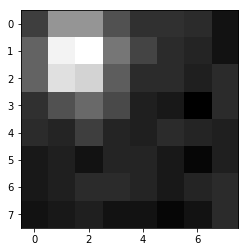

Spot reconstructed from gaussian fit parameters using sigma_min:


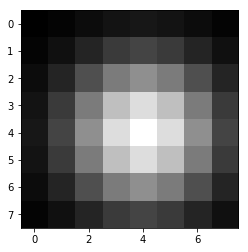

Spot reconstructed from gaussian fit parameters using sigma_max:


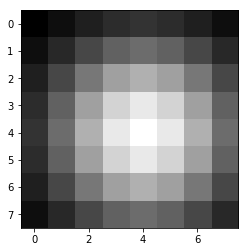

Original crop
[[33 47 47 36 31 31 30 26]
 [39 62 64 42 34 30 29 26]
 [39 59 57 38 30 30 28 30]
 [31 36 40 35 28 27 23 30]
 [30 29 33 29 28 30 29 28]
 [27 28 26 29 29 27 24 28]
 [27 28 30 30 29 27 29 30]
 [26 27 28 26 26 24 26 30]]
Reconstructed using sigma min
[[ 0  1  3  5  6  5  3  1]
 [ 1  4  9 15 17 15  9  4]
 [ 3  9 20 31 36 31 20  9]
 [ 5 15 31 48 55 48 31 15]
 [ 6 17 36 55 64 55 36 17]
 [ 5 15 31 48 55 48 31 15]
 [ 3  9 20 31 36 31 20  9]
 [ 1  4  9 15 17 15  9  4]]
Reconstructed using sigma max
[[ 4  7 11 14 16 14 11  7]
 [ 7 13 20 26 29 26 20 13]
 [11 20 32 41 45 41 32 20]
 [14 26 41 53 58 53 41 26]
 [16 29 45 58 64 58 45 29]
 [14 26 41 53 58 53 41 26]
 [11 20 32 41 45 41 32 20]
 [ 7 13 20 26 29 26 20 13]]

---------------------------------------------------

x: 927.81
y: 1511.8
sigma_min: 1.108601790662404
sigma_max: 1.1371411802858253
height: 126.82438158231777
max_intensity: 171


Original crop around spot at (927, 1511):


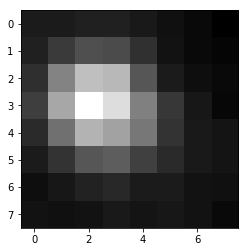

Spot reconstructed from gaussian fit parameters using sigma_min:


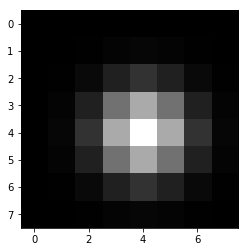

Spot reconstructed from gaussian fit parameters using sigma_max:


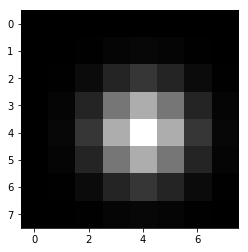

Original crop
[[ 47  47  50  50  46  41  37  32]
 [ 50  64  75  73  59  42  37  35]
 [ 58 104 136 132  79  47  40  37]
 [ 66 123 171 152 102  62  45  36]
 [ 55  93 130 120  97  60  46  43]
 [ 47  60  79  83  67  55  46  43]
 [ 40  45  51  54  47  47  42  41]
 [ 42  41  42  46  43  45  42  37]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  22  33  22   6   0]
 [  0   2  22  75 113  75  22   2]
 [  0   4  33 113 171 113  33   4]
 [  0   2  22  75 113  75  22   2]
 [  0   0   6  22  33  22   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   7  24  36  24   7   1]
 [  0   3  24  78 116  78  24   3]
 [  0   5  36 116 171 116  36   5]
 [  0   3  24  78 116  78  24   3]
 [  0   1   7  24  36  24   7   1]
 [  0   0   1   3   5   3   1   0]]

---------------------------------------------------

x: 966.69
y: 1534.8
sigma_min

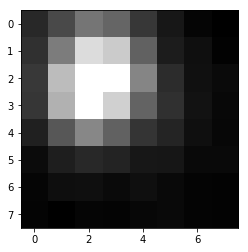

Spot reconstructed from gaussian fit parameters using sigma_min:


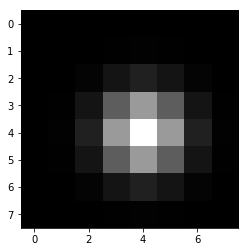

Spot reconstructed from gaussian fit parameters using sigma_max:


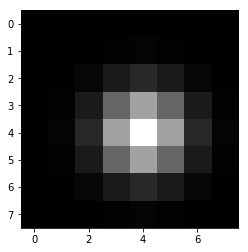

Original crop
[[ 74 102 138 125  86  59  44  39]
 [ 80 144 225 211 121  63  52  41]
 [ 87 198 255 255 152  77  53  48]
 [ 85 189 255 215 123  80  55  46]
 [ 66 113 153 122  84  70  52  45]
 [ 49  65  74  69  59  58  47  47]
 [ 44  51  52  48  52  47  43  42]
 [ 43  39  44  43  45  47  43  42]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  20  33  20   4   0]
 [  0   1  20  92 153  92  20   1]
 [  0   2  33 153 255 153  33   2]
 [  0   1  20  92 153  92  20   1]
 [  0   0   4  20  33  20   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  26  41  26   6   0]
 [  0   2  26 102 161 102  26   2]
 [  0   4  41 161 255 161  41   4]
 [  0   2  26 102 161 102  26   2]
 [  0   0   6  26  41  26   6   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 858.78
y: 1537.9
sigma_min

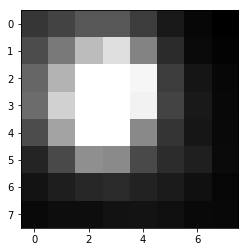

Spot reconstructed from gaussian fit parameters using sigma_min:


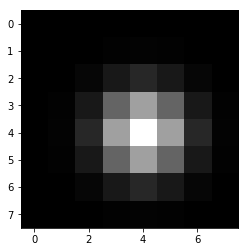

Spot reconstructed from gaussian fit parameters using sigma_max:


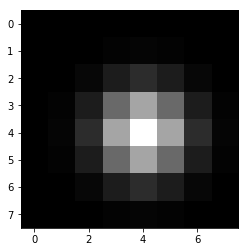

Original crop
[[ 87  98 115 115  92  62  48  42]
 [106 143 199 228 152  78  51  45]
 [127 192 255 255 247  93  60  48]
 [132 216 255 255 244  98  63  49]
 [106 178 255 255 156  86  61  50]
 [ 72 104 161 157 104  79  68  51]
 [ 58  67  75  77  71  65  56  47]
 [ 50  53  53  57  58  55  50  49]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   6  24  39  24   6   0]
 [  0   2  24  99 159  99  24   2]
 [  0   3  39 159 255 159  39   3]
 [  0   2  24  99 159  99  24   2]
 [  0   0   6  24  39  24   6   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   4   3   0   0]
 [  0   0   7  28  44  28   7   0]
 [  0   3  28 106 164 106  28   3]
 [  0   4  44 164 255 164  44   4]
 [  0   3  28 106 164 106  28   3]
 [  0   0   7  28  44  28   7   0]
 [  0   0   0   3   4   3   0   0]]

---------------------------------------------------

x: 831.81
y: 1536.4
sigma_min

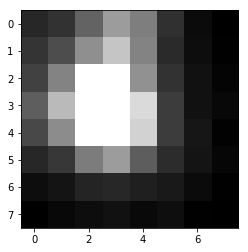

Spot reconstructed from gaussian fit parameters using sigma_min:


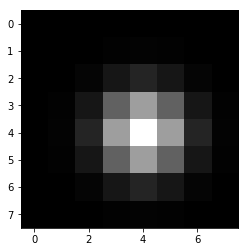

Spot reconstructed from gaussian fit parameters using sigma_max:


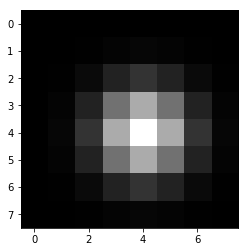

Original crop
[[ 78  87 127 174 149  86  55  46]
 [ 90 109 163 207 153  81  57  47]
 [100 153 255 255 165  87  60  50]
 [123 198 255 255 224  95  60  53]
 [105 161 255 255 218  95  64  48]
 [ 78  91 148 174 122  82  63  51]
 [ 57  63  76  78  72  67  55  47]
 [ 46  53  57  60  54  58  47  46]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  22  37  22   5   0]
 [  0   2  22  97 157  97  22   2]
 [  0   3  37 157 255 157  37   3]
 [  0   2  22  97 157  97  22   2]
 [  0   0   5  22  37  22   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1  10  34  51  34  10   1]
 [  0   4  34 114 170 114  34   4]
 [  0   6  51 170 255 170  51   6]
 [  0   4  34 114 170 114  34   4]
 [  0   1  10  34  51  34  10   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 1067.5
y: 1107.1
sigma_min

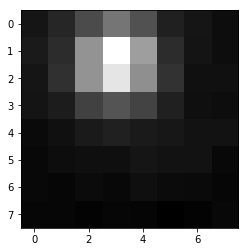

Spot reconstructed from gaussian fit parameters using sigma_min:


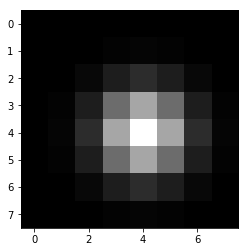

Spot reconstructed from gaussian fit parameters using sigma_max:


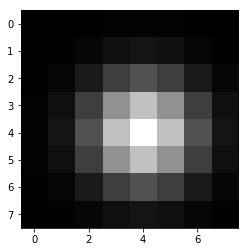

Original crop
[[ 42  52  74  99  78  49  42  37]
 [ 45  56 117 181 123  56  41  37]
 [ 42  58 117 165 114  59  39  39]
 [ 41  46  68  79  69  49  38  37]
 [ 35  39  45  48  45  43  40  40]
 [ 34  37  38  38  42  40  40  34]
 [ 34  33  36  34  38  36  35  33]
 [ 33  33  31  33  32  29  31  34]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  20  32  20   5   0]
 [  0   2  20  76 117  76  20   2]
 [  0   3  32 117 181 117  32   3]
 [  0   2  20  76 117  76  20   2]
 [  0   0   5  20  32  20   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   1   4  10  14  10   4   1]
 [  0   4  18  44  58  44  18   4]
 [  1  10  44 102 136 102  44  10]
 [  1  14  58 136 181 136  58  14]
 [  1  10  44 102 136 102  44  10]
 [  0   4  18  44  58  44  18   4]
 [  0   1   4  10  14  10   4   1]]

---------------------------------------------------

x: 1093.6
y: 1117.4
sigma_min

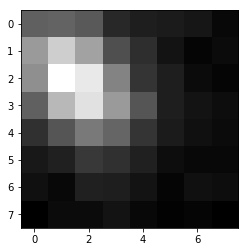

Spot reconstructed from gaussian fit parameters using sigma_min:


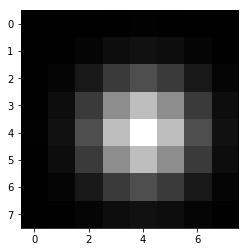

Spot reconstructed from gaussian fit parameters using sigma_max:


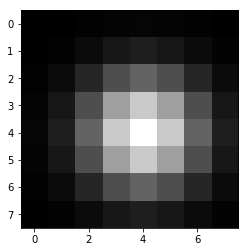

Original crop
[[ 68  69  66  48  44  43  41  36]
 [ 89 108  92  62  50  40  35  37]
 [ 85 126 118  81  52  44  37  35]
 [ 68 100 115  89  64  44  40  38]
 [ 51  64  77  70  52  43  39  37]
 [ 42  45  54  51  45  38  36  36]
 [ 39  36  45  44  40  35  39  38]
 [ 33  37  37  40  36  34  35  33]]
Reconstructed using sigma min
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   6   8   6   2   0]
 [  0   2  11  28  38  28  11   2]
 [  0   6  28  69  93  69  28   6]
 [  1   8  38  93 126  93  38   8]
 [  0   6  28  69  93  69  28   6]
 [  0   2  11  28  38  28  11   2]
 [  0   0   2   6   8   6   2   0]]
Reconstructed using sigma max
[[  0   0   1   2   2   2   1   0]
 [  0   1   5  11  14  11   5   1]
 [  1   5  18  38  48  38  18   5]
 [  2  11  38  78  99  78  38  11]
 [  2  14  48  99 126  99  48  14]
 [  2  11  38  78  99  78  38  11]
 [  1   5  18  38  48  38  18   5]
 [  0   1   5  11  14  11   5   1]]

---------------------------------------------------

x: 1105.5
y: 1110.3
sigma_min

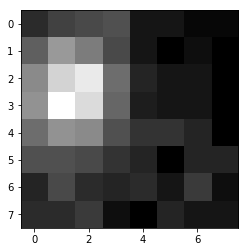

Spot reconstructed from gaussian fit parameters using sigma_min:


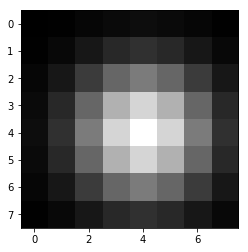

Spot reconstructed from gaussian fit parameters using sigma_max:


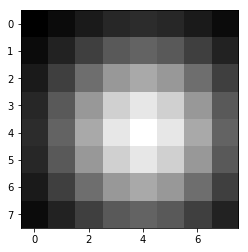

Original crop
[[39 42 43 44 36 36 34 34]
 [46 54 50 43 36 33 35 33]
 [52 62 65 48 38 36 36 33]
 [53 68 63 47 37 36 36 33]
 [48 53 52 44 40 40 38 33]
 [44 44 43 40 38 33 38 38]
 [38 43 39 38 39 36 41 35]
 [39 39 41 35 33 38 36 36]]
Reconstructed using sigma min
[[ 0  0  1  3  3  3  1  0]
 [ 0  2  6 11 13 11  6  2]
 [ 1  6 15 27 32 27 15  6]
 [ 3 11 27 47 56 47 27 11]
 [ 3 13 32 56 68 56 32 13]
 [ 3 11 27 47 56 47 27 11]
 [ 1  6 15 27 32 27 15  6]
 [ 0  2  6 11 13 11  6  2]]
Reconstructed using sigma max
[[ 3  5  9 12 14 12  9  5]
 [ 5 11 19 25 28 25 19 11]
 [ 9 19 31 41 46 41 31 19]
 [12 25 41 55 61 55 41 25]
 [14 28 46 61 68 61 46 28]
 [12 25 41 55 61 55 41 25]
 [ 9 19 31 41 46 41 31 19]
 [ 5 11 19 25 28 25 19 11]]

---------------------------------------------------

x: 1127.8
y: 1134.9
sigma_min: 1.608096165307452
sigma_max: 1.8041021711383793
height: 52.24798072612125
max_intensity: 81


Original crop around spot at (1127, 1134):


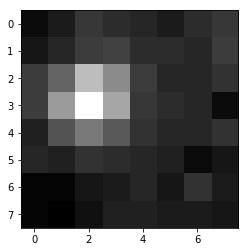

Spot reconstructed from gaussian fit parameters using sigma_min:


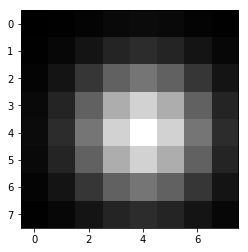

Spot reconstructed from gaussian fit parameters using sigma_max:


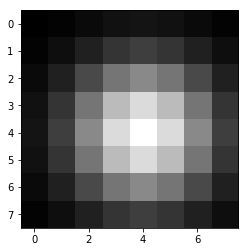

Original crop
[[37 40 45 43 42 40 43 45]
 [39 42 46 47 43 43 42 46]
 [46 53 69 60 46 42 42 44]
 [46 63 81 65 45 43 42 37]
 [41 50 57 51 44 42 42 44]
 [42 41 44 43 42 41 37 39]
 [36 36 39 40 42 39 44 40]
 [36 35 38 41 41 40 40 39]]
Reconstructed using sigma min
[[ 0  0  1  3  3  3  1  0]
 [ 0  2  6 11 14 11  6  2]
 [ 1  6 17 30 37 30 17  6]
 [ 3 11 30 55 66 55 30 11]
 [ 3 14 37 66 81 66 37 14]
 [ 3 11 30 55 66 55 30 11]
 [ 1  6 17 30 37 30 17  6]
 [ 0  2  6 11 14 11  6  2]]
Reconstructed using sigma max
[[ 0  1  3  5  6  5  3  1]
 [ 1  5 10 17 20 17 10  5]
 [ 3 10 23 37 43 37 23 10]
 [ 5 17 37 59 69 59 37 17]
 [ 6 20 43 69 81 69 43 20]
 [ 5 17 37 59 69 59 37 17]
 [ 3 10 23 37 43 37 23 10]
 [ 1  5 10 17 20 17 10  5]]

---------------------------------------------------

x: 1122.2
y: 1166.6
sigma_min: 0.9938872700327971
sigma_max: 1.0679853596734177
height: 217.3692988206777
max_intensity: 255


Original crop around spot at (1122, 1166):


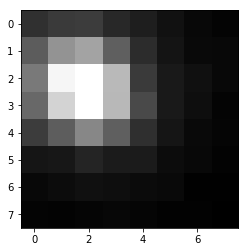

Spot reconstructed from gaussian fit parameters using sigma_min:


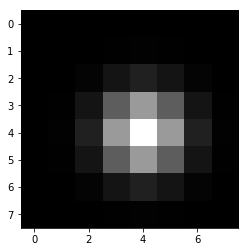

Spot reconstructed from gaussian fit parameters using sigma_max:


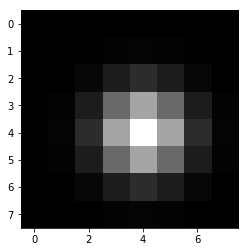

Original crop
[[ 80  88  89  73  64  53  45  42]
 [116 163 177 119  76  55  46  45]
 [141 247 255 195  88  60  52  45]
 [127 218 255 194 100  60  50  42]
 [ 89 117 153 119  78  56  46  43]
 [ 56  58  69  61  61  49  45  41]
 [ 45  49  52  50  48  46  39  39]
 [ 42  41  43  44  43  40  40  38]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  20  33  20   4   0]
 [  0   1  20  92 153  92  20   1]
 [  0   2  33 153 255 153  33   2]
 [  0   1  20  92 153  92  20   1]
 [  0   0   4  20  33  20   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   4   3   0   0]
 [  0   0   7  28  44  28   7   0]
 [  0   3  28 106 164 106  28   3]
 [  0   4  44 164 255 164  44   4]
 [  0   3  28 106 164 106  28   3]
 [  0   0   7  28  44  28   7   0]
 [  0   0   0   3   4   3   0   0]]

---------------------------------------------------

x: 1176.1
y: 1190.4
sigma_min

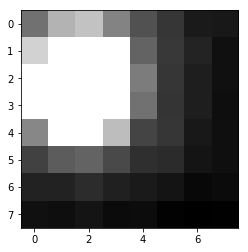

Spot reconstructed from gaussian fit parameters using sigma_min:


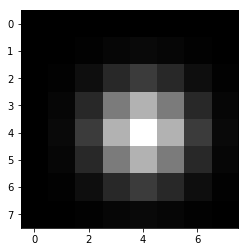

Spot reconstructed from gaussian fit parameters using sigma_max:


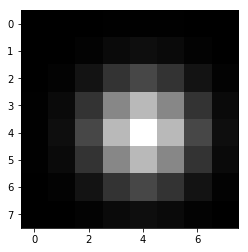

Original crop
[[144 196 207 158 118  97  75  73]
 [219 255 255 255 132  98  82  67]
 [255 255 255 255 152  97  78  67]
 [255 255 255 255 144  96  78  65]
 [160 255 255 203 108  97  73  66]
 [106 127 132 112  91  88  70  66]
 [ 81  81  89  80  75  70  61  63]
 [ 67  65  70  63  64  56  54  55]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  14  41  59  41  14   2]
 [  0   6  41 123 177 123  41   6]
 [  0   9  59 177 255 177  59   9]
 [  0   6  41 123 177 123  41   6]
 [  0   2  14  41  59  41  14   2]
 [  0   0   2   6   9   6   2   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   3  10  14  10   3   0]
 [  0   3  19  51  70  51  19   3]
 [  1  10  51 134 185 134  51  10]
 [  1  14  70 185 255 185  70  14]
 [  1  10  51 134 185 134  51  10]
 [  0   3  19  51  70  51  19   3]
 [  0   0   3  10  14  10   3   0]]

---------------------------------------------------

x: 1184.1
y: 1178.5
sigma_min

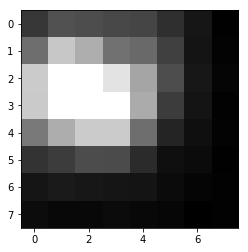

Spot reconstructed from gaussian fit parameters using sigma_min:


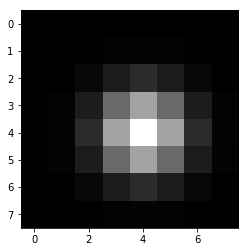

Spot reconstructed from gaussian fit parameters using sigma_max:


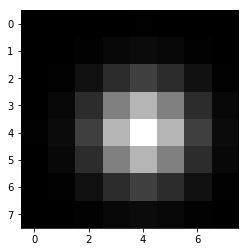

Original crop
[[ 95 116 113 109 106  89  69  52]
 [139 210 190 142 135 102  67  54]
 [213 255 255 232 183 113  70  55]
 [212 255 255 255 188  99  67  53]
 [149 189 213 213 139  81  63  54]
 [ 92  99 112 111  86  63  60  52]
 [ 68  72  70  68  67  60  55  53]
 [ 61  58  58  60  58  56  51  53]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   4   3   0   0]
 [  0   0   7  27  43  27   7   0]
 [  0   3  27 105 163 105  27   3]
 [  0   4  43 163 255 163  43   4]
 [  0   3  27 105 163 105  27   3]
 [  0   0   7  27  43  27   7   0]
 [  0   0   0   3   4   3   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   8  11   8   2   0]
 [  0   2  16  45  64  45  16   2]
 [  0   8  45 127 180 127  45   8]
 [  1  11  64 180 255 180  64  11]
 [  0   8  45 127 180 127  45   8]
 [  0   2  16  45  64  45  16   2]
 [  0   0   2   8  11   8   2   0]]

---------------------------------------------------

x: 1230.9
y: 1178.5
sigma_min

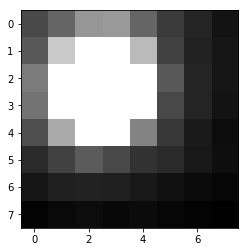

Spot reconstructed from gaussian fit parameters using sigma_min:


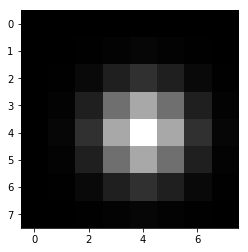

Spot reconstructed from gaussian fit parameters using sigma_max:


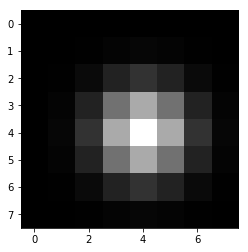

Original crop
[[108 131 170 173 131  97  79  65]
 [120 211 255 255 199 102  77  67]
 [148 255 255 255 255 120  78  67]
 [142 255 255 255 255 107  79  65]
 [112 186 255 255 155  95  70  60]
 [ 83 102 123 107  90  83  69  61]
 [ 67  75  77  76  69  63  58  54]
 [ 52  57  59  56  58  54  52  49]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   9  31  48  31   9   1]
 [  0   3  31 110 168 110  31   3]
 [  0   5  48 168 255 168  48   5]
 [  0   3  31 110 168 110  31   3]
 [  0   1   9  31  48  31   9   1]
 [  0   0   1   3   5   3   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1  10  33  50  33  10   1]
 [  0   4  33 113 170 113  33   4]
 [  0   6  50 170 255 170  50   6]
 [  0   4  33 113 170 113  33   4]
 [  0   1  10  33  50  33  10   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 1518.9
y: 1155.5
sigma_min

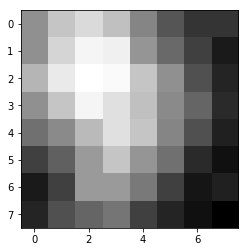

Spot reconstructed from gaussian fit parameters using sigma_min:


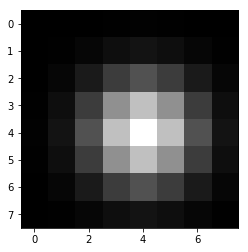

Spot reconstructed from gaussian fit parameters using sigma_max:


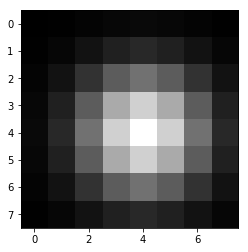

Original crop
[[52 62 66 61 50 41 35 35]
 [52 65 71 70 53 45 37 30]
 [59 69 73 72 62 52 40 32]
 [52 62 71 67 61 51 44 33]
 [46 51 60 67 62 50 40 31]
 [37 43 54 62 53 46 33 28]
 [30 37 54 54 48 37 29 31]
 [32 40 44 47 37 32 28 25]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  4  5  4  1  0]
 [ 0  1  7 17 23 17  7  1]
 [ 0  4 17 41 54 41 17  4]
 [ 0  5 23 54 73 54 23  5]
 [ 0  4 17 41 54 41 17  4]
 [ 0  1  7 17 23 17  7  1]
 [ 0  0  1  4  5  4  1  0]]
Reconstructed using sigma max
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  5  9 11  9  5  1]
 [ 1  5 14 26 32 26 14  5]
 [ 2  9 26 48 59 48 26  9]
 [ 2 11 32 59 73 59 32 11]
 [ 2  9 26 48 59 48 26  9]
 [ 1  5 14 26 32 26 14  5]
 [ 0  1  5  9 11  9  5  1]]

---------------------------------------------------

x: 1571.3
y: 1375.3
sigma_min: 1.2137926015514884
sigma_max: 1.2391497373362408
height: 212.7543887928529
max_intensity: 255


Original crop around spot at (1571, 1375):


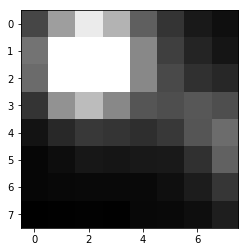

Spot reconstructed from gaussian fit parameters using sigma_min:


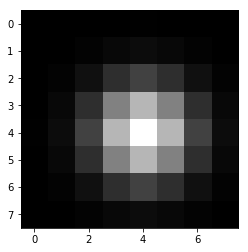

Spot reconstructed from gaussian fit parameters using sigma_max:


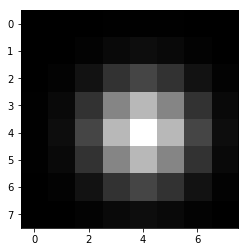

Original crop
[[103 175 238 193 123  88  66  58]
 [140 255 255 255 157  97  76  63]
 [133 255 255 255 157 105  86  77]
 [ 89 165 200 157 115 109 117 109]
 [ 61  79  92  88  83  92 115 134]
 [ 50  56  64  63  65  66  86 126]
 [ 50  52  53  53  53  58  68  90]
 [ 45  46  47  46  52  53  57  70]]
Reconstructed using sigma min
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   8  12   8   3   0]
 [  0   3  16  46  65  46  16   3]
 [  0   8  46 129 181 129  46   8]
 [  1  12  65 181 255 181  65  12]
 [  0   8  46 129 181 129  46   8]
 [  0   3  16  46  65  46  16   3]
 [  0   0   3   8  12   8   3   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   9  13   9   3   0]
 [  0   3  18  50  69  50  18   3]
 [  1   9  50 132 184 132  50   9]
 [  1  13  69 184 255 184  69  13]
 [  1   9  50 132 184 132  50   9]
 [  0   3  18  50  69  50  18   3]
 [  0   0   3   9  13   9   3   0]]

---------------------------------------------------

x: 1345.9
y: 1400.7
sigma_min

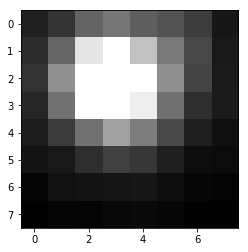

Spot reconstructed from gaussian fit parameters using sigma_min:


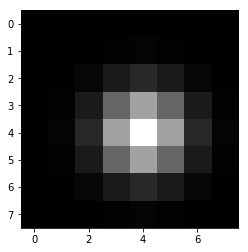

Spot reconstructed from gaussian fit parameters using sigma_max:


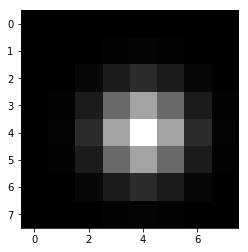

Original crop
[[ 69  85 125 140 120 111  92  61]
 [ 79 127 233 255 203 142 101  62]
 [ 84 162 255 255 255 161  98  63]
 [ 73 137 254 255 240 135  81  64]
 [ 65  90 136 176 146 101  67  54]
 [ 58  62  80  95  87  67  52  51]
 [ 45  56  57  59  61  53  47  45]
 [ 41  46  45  48  50  47  43  43]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  25  41  25   6   0]
 [  0   2  25 102 161 102  25   2]
 [  0   4  41 161 255 161  41   4]
 [  0   2  25 102 161 102  25   2]
 [  0   0   6  25  41  25   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   7  27  43  27   7   0]
 [  0   2  27 104 163 104  27   2]
 [  0   4  43 163 255 163  43   4]
 [  0   2  27 104 163 104  27   2]
 [  0   0   7  27  43  27   7   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 1327.7
y: 1471.3
sigma_min

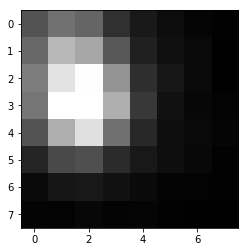

Spot reconstructed from gaussian fit parameters using sigma_min:


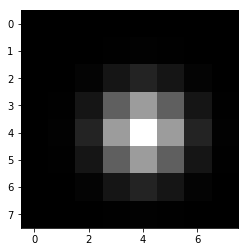

Spot reconstructed from gaussian fit parameters using sigma_max:


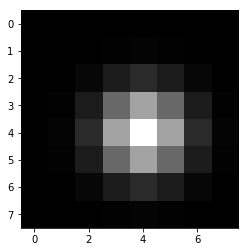

Original crop
[[109 134 124  80  60  49  43  40]
 [127 194 180 112  66  52  46  39]
 [144 232 254 164  77  58  46  39]
 [138 255 255 187  87  53  44  41]
 [109 186 228 133  73  50  46  43]
 [ 69 100 105  75  59  50  45  40]
 [ 47  57  59  53  47  42  41  40]
 [ 42  41  44  42  43  40  38  38]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  21  35  21   4   0]
 [  0   1  21  94 155  94  21   1]
 [  0   2  35 155 255 155  35   2]
 [  0   1  21  94 155  94  21   1]
 [  0   0   4  21  35  21   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   7  27  42  27   7   0]
 [  0   2  27 104 163 104  27   2]
 [  0   4  42 163 255 163  42   4]
 [  0   2  27 104 163 104  27   2]
 [  0   0   7  27  42  27   7   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 1497.5
y: 1551.4
sigma_min

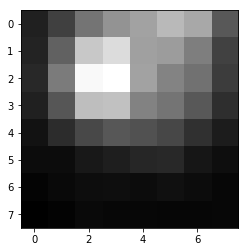

Spot reconstructed from gaussian fit parameters using sigma_min:


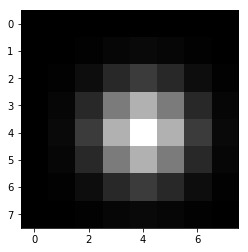

Spot reconstructed from gaussian fit parameters using sigma_max:


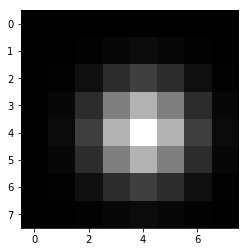

Original crop
[[ 61  87 130 155 167 186 172 107]
 [ 64 114 198 214 165 162 138  89]
 [ 69 135 238 243 167 143 128  84]
 [ 61 105 190 192 141 130 107  73]
 [ 50  72  94 106 101  93  74  58]
 [ 45  45  55  60  66  68  53  47]
 [ 39  43  46  47  45  48  45  41]
 [ 35  38  43  41  41  40  40  41]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  13  39  56  39  13   2]
 [  0   6  39 117 168 117  39   6]
 [  0   9  56 168 243 168  56   9]
 [  0   6  39 117 168 117  39   6]
 [  0   2  13  39  56  39  13   2]
 [  0   0   2   6   9   6   2   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   7  10   7   2   0]
 [  0   2  14  42  60  42  14   2]
 [  0   7  42 121 171 121  42   7]
 [  0  10  60 171 243 171  60  10]
 [  0   7  42 121 171 121  42   7]
 [  0   2  14  42  60  42  14   2]
 [  0   0   2   7  10   7   2   0]]

---------------------------------------------------

x: 1500.7
y: 1549.1
sigma_min

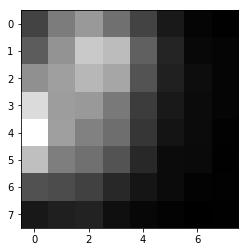

Spot reconstructed from gaussian fit parameters using sigma_min:


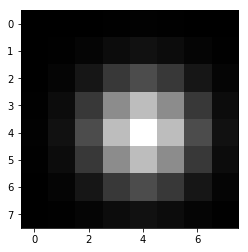

Spot reconstructed from gaussian fit parameters using sigma_max:


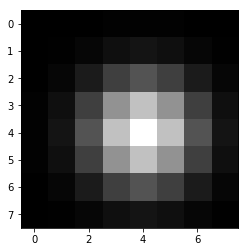

Original crop
[[ 94 139 162 130  94  61  45  42]
 [114 158 200 190 117  70  48  45]
 [155 167 186 172 107  67  52  45]
 [214 165 162 138  89  61  50  45]
 [243 167 143 128  84  57  50  43]
 [192 141 130 107  73  50  49  42]
 [106 101  93  74  58  50  44  43]
 [ 60  66  68  53  47  44  41  42]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   1   4  11  16  11   4   1]
 [  0   4  21  53  72  53  21   4]
 [  1  11  53 133 179 133  53  11]
 [  1  16  72 179 243 179  72  16]
 [  1  11  53 133 179 133  53  11]
 [  0   4  21  53  72  53  21   4]
 [  0   1   4  11  16  11   4   1]]
Reconstructed using sigma max
[[  0   0   0   2   2   2   0   0]
 [  0   1   6  14  19  14   6   1]
 [  0   6  26  60  79  60  26   6]
 [  2  14  60 139 183 139  60  14]
 [  2  19  79 183 243 183  79  19]
 [  2  14  60 139 183 139  60  14]
 [  0   6  26  60  79  60  26   6]
 [  0   1   6  14  19  14   6   1]]

---------------------------------------------------

x: 1153.1
y: 1478.4
sigma_min

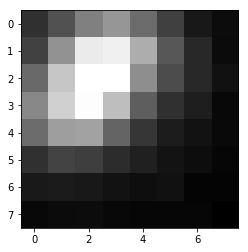

Spot reconstructed from gaussian fit parameters using sigma_min:


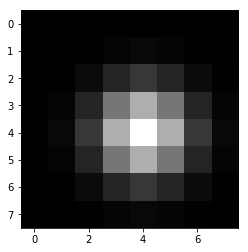

Spot reconstructed from gaussian fit parameters using sigma_max:


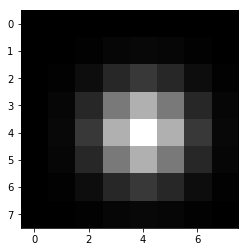

Original crop
[[ 87 114 151 169 135  99  67  57]
 [100 166 238 242 188 118  80  56]
 [133 208 255 255 163 109  80  61]
 [158 216 253 202 124  86  72  54]
 [135 176 179 129  91  70  62  55]
 [ 86 102  98  84  73  63  58  52]
 [ 68  69  67  62  59  61  51  51]
 [ 54  56  57  54  52  52  52  47]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   8   5   1   0]
 [  0   1  11  37  54  37  11   1]
 [  0   5  37 118 173 118  37   5]
 [  0   8  54 173 255 173  54   8]
 [  0   5  37 118 173 118  37   5]
 [  0   1  11  37  54  37  11   1]
 [  0   0   1   5   8   5   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   8   6   2   0]
 [  0   2  12  39  57  39  12   2]
 [  0   6  39 121 175 121  39   6]
 [  0   8  57 175 255 175  57   8]
 [  0   6  39 121 175 121  39   6]
 [  0   2  12  39  57  39  12   2]
 [  0   0   2   6   8   6   2   0]]

---------------------------------------------------

x: 1144.4
y: 1435.6
sigma_min

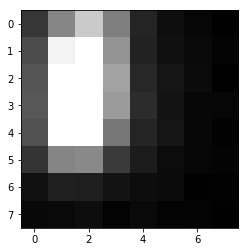

Spot reconstructed from gaussian fit parameters using sigma_min:


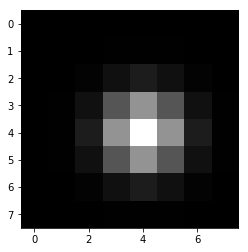

Spot reconstructed from gaussian fit parameters using sigma_max:


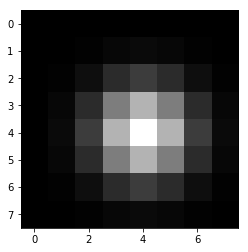

Original crop
[[ 92 157 212 150  78  60  53  49]
 [109 246 255 167  76  61  56  52]
 [117 255 255 179  80  65  57  48]
 [119 255 255 174  84  64  54  53]
 [114 255 255 145  78  65  54  50]
 [ 91 156 159  95  70  58  53  52]
 [ 62  74  73  64  59  57  49  50]
 [ 55  56  59  51  56  51  52  49]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   3  16  28  16   3   0]
 [  0   1  16  85 147  85  16   1]
 [  0   1  28 147 255 147  28   1]
 [  0   1  16  85 147  85  16   1]
 [  0   0   3  16  28  16   3   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   7  10   7   2   0]
 [  0   2  14  43  61  43  14   2]
 [  0   7  43 125 178 125  43   7]
 [  0  10  61 178 255 178  61  10]
 [  0   7  43 125 178 125  43   7]
 [  0   2  14  43  61  43  14   2]
 [  0   0   2   7  10   7   2   0]]

---------------------------------------------------

x: 1118.2
y: 1478.4
sigma_min

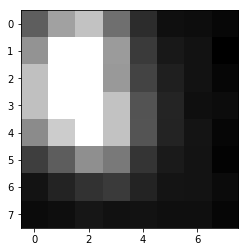

Spot reconstructed from gaussian fit parameters using sigma_min:


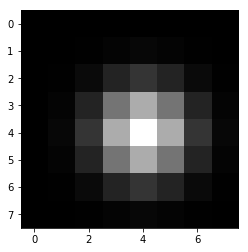

Spot reconstructed from gaussian fit parameters using sigma_max:


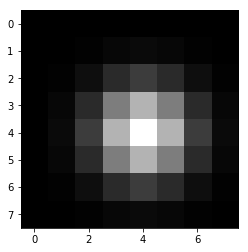

Original crop
[[123 178 205 137  82  59  57  52]
 [167 255 255 173  94  66  61  46]
 [203 255 255 171 101  72  61  51]
 [203 255 255 205 114  76  59  56]
 [160 213 255 205 115  75  63  51]
 [ 97 122 163 145  89  68  62  49]
 [ 62  75  87  94  75  63  62  55]
 [ 55  58  64  60  61  59  59  51]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   7   4   1   0]
 [  0   1  10  35  52  35  10   1]
 [  0   4  35 115 171 115  35   4]
 [  0   7  52 171 255 171  52   7]
 [  0   4  35 115 171 115  35   4]
 [  0   1  10  35  52  35  10   1]
 [  0   0   1   4   7   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   7  10   7   2   0]
 [  0   2  14  42  61  42  14   2]
 [  0   7  42 124 178 124  42   7]
 [  0  10  61 178 255 178  61  10]
 [  0   7  42 124 178 124  42   7]
 [  0   2  14  42  61  42  14   2]
 [  0   0   2   7  10   7   2   0]]

---------------------------------------------------

x: 1153.1
y: 1389.6
sigma_min

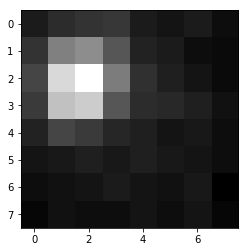

Spot reconstructed from gaussian fit parameters using sigma_min:


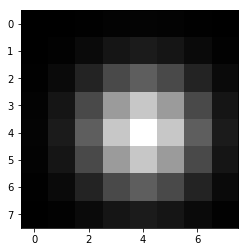

Spot reconstructed from gaussian fit parameters using sigma_max:


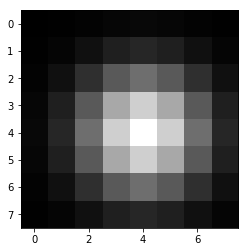

Original crop
[[ 38  43  45  46  38  36  38  34]
 [ 45  67  71  55  40  38  34  33]
 [ 50  93 104  66  44  39  36  33]
 [ 47  86  89  55  43  42  39  35]
 [ 40  50  47  41  39  36  37  34]
 [ 36  37  39  37  39  37  36  34]
 [ 34  35  36  38  36  35  37  30]
 [ 32  35  34  34  36  34  36  32]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   1   4   8  11   8   4   1]
 [  0   4  14  30  38  30  14   4]
 [  1   8  30  63  81  63  30   8]
 [  1  11  38  81 104  81  38  11]
 [  1   8  30  63  81  63  30   8]
 [  0   4  14  30  38  30  14   4]
 [  0   1   4   8  11   8   4   1]]
Reconstructed using sigma max
[[  0   0   1   2   3   2   1   0]
 [  0   2   6  12  15  12   6   2]
 [  1   6  19  36  44  36  19   6]
 [  2  12  36  68  84  68  36  12]
 [  3  15  44  84 104  84  44  15]
 [  2  12  36  68  84  68  36  12]
 [  1   6  19  36  44  36  19   6]
 [  0   2   6  12  15  12   6   2]]

---------------------------------------------------

x: 1615.4
y: 1361.0
sigma_min

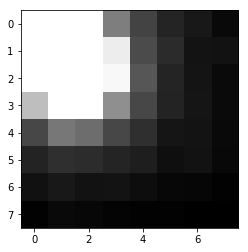

Spot reconstructed from gaussian fit parameters using sigma_min:


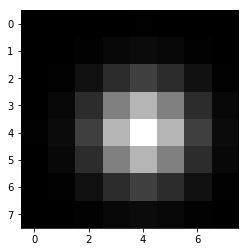

Spot reconstructed from gaussian fit parameters using sigma_max:


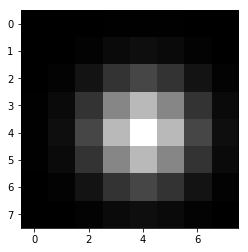

Original crop
[[255 255 255 149 100  75  65  53]
 [255 255 255 240 107  81  61  60]
 [255 255 255 249 116  76  62  54]
 [201 255 255 163 104  74  63  54]
 [104 143 135 104  84  63  61  53]
 [ 74  84  82  76  70  58  60  52]
 [ 59  65  60  61  56  51  50  47]
 [ 47  53  51  49  47  47  45  45]]
Reconstructed using sigma min
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   8  11   8   2   0]
 [  0   2  16  45  64  45  16   2]
 [  0   8  45 128 180 128  45   8]
 [  1  11  64 180 255 180  64  11]
 [  0   8  45 128 180 128  45   8]
 [  0   2  16  45  64  45  16   2]
 [  0   0   2   8  11   8   2   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   3  10  14  10   3   0]
 [  0   3  19  51  70  51  19   3]
 [  1  10  51 133 184 133  51  10]
 [  1  14  70 184 255 184  70  14]
 [  1  10  51 133 184 133  51  10]
 [  0   3  19  51  70  51  19   3]
 [  0   0   3  10  14  10   3   0]]

---------------------------------------------------

x: 1727.3
y: 1514.9
sigma_min

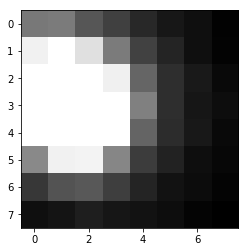

Spot reconstructed from gaussian fit parameters using sigma_min:


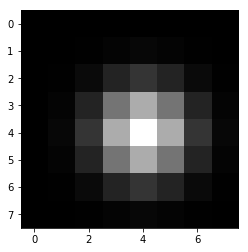

Spot reconstructed from gaussian fit parameters using sigma_max:


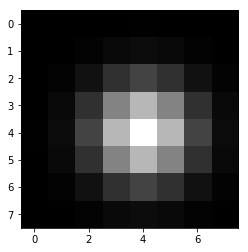

Original crop
[[144 147 117  99  80  65  59  48]
 [243 255 229 147 100  76  59  49]
 [255 255 255 242 129  84  67  54]
 [255 255 255 255 151  84  64  57]
 [255 255 255 255 128  82  66  54]
 [158 243 245 156  95  74  58  52]
 [ 91 114 118  97  76  61  56  50]
 [ 59  63  71  64  61  57  50  46]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   7   4   1   0]
 [  0   1  10  35  52  35  10   1]
 [  0   4  35 115 171 115  35   4]
 [  0   7  52 171 255 171  52   7]
 [  0   4  35 115 171 115  35   4]
 [  0   1  10  35  52  35  10   1]
 [  0   0   1   4   7   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   9  12   9   3   0]
 [  0   3  17  48  67  48  17   3]
 [  0   9  48 131 182 131  48   9]
 [  1  12  67 182 255 182  67  12]
 [  0   9  48 131 182 131  48   9]
 [  0   3  17  48  67  48  17   3]
 [  0   0   3   9  12   9   3   0]]

---------------------------------------------------

x: 158.2
y: 1601.9
sigma_min:

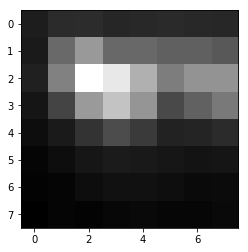

Spot reconstructed from gaussian fit parameters using sigma_min:


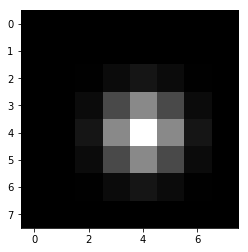

Spot reconstructed from gaussian fit parameters using sigma_max:


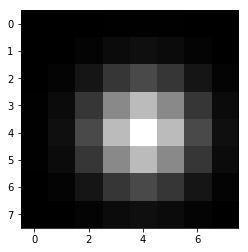

Original crop
[[ 42  53  54  49  51  52  51  50]
 [ 40 100 136  99  99  93  93  87]
 [ 45 118 214 196 154 115 132 132]
 [ 36  72 137 169 133  76  95 112]
 [ 30  40  59  78  64  46  48  53]
 [ 24  30  37  41  39  37  35  36]
 [ 23  24  30  33  33  31  28  29]
 [ 20  24  23  26  27  25  25  27]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   9  17   9   1   0]
 [  0   0   9  61 114  61   9   0]
 [  0   0  17 114 214 114  17   0]
 [  0   0   9  61 114  61   9   0]
 [  0   0   1   9  17   9   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   9  13   9   3   0]
 [  0   3  17  45  61  45  17   3]
 [  1   9  45 114 156 114  45   9]
 [  1  13  61 156 214 156  61  13]
 [  1   9  45 114 156 114  45   9]
 [  0   3  17  45  61  45  17   3]
 [  0   0   3   9  13   9   3   0]]

---------------------------------------------------

x: 166.13
y: 1600.3
sigma_min

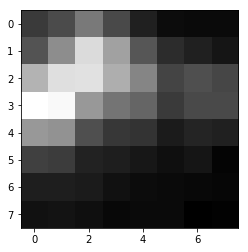

Spot reconstructed from gaussian fit parameters using sigma_min:


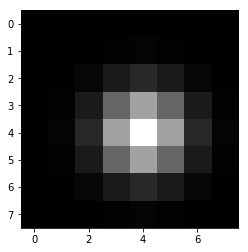

Spot reconstructed from gaussian fit parameters using sigma_max:


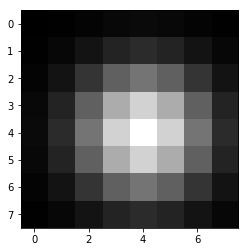

Original crop
[[ 46  54  76  53  34  25  24  24]
 [ 58  85 121  94  59  40  34  29]
 [103 123 124 100  81  51  56  52]
 [138 135  90  73  66  46  53  53]
 [ 90  87  56  45  43  32  36  34]
 [ 49  47  35  33  30  26  29  21]
 [ 33  33  32  27  25  24  23  22]
 [ 27  28  26  23  24  24  19  20]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  14  22  14   3   0]
 [  0   1  14  55  87  55  14   1]
 [  0   2  22  87 138  87  22   2]
 [  0   1  14  55  87  55  14   1]
 [  0   0   3  14  22  14   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   1   2   4   6   4   2   1]
 [  1   4  10  19  23  19  10   4]
 [  2  10  28  51  63  51  28  10]
 [  4  19  51  93 113  93  51  19]
 [  6  23  63 113 138 113  63  23]
 [  4  19  51  93 113  93  51  19]
 [  2  10  28  51  63  51  28  10]
 [  1   4  10  19  23  19  10   4]]

---------------------------------------------------

x: 208.98
y: 1634.4
sigma_min

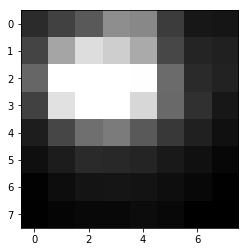

Spot reconstructed from gaussian fit parameters using sigma_min:


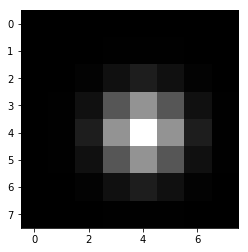

Spot reconstructed from gaussian fit parameters using sigma_max:


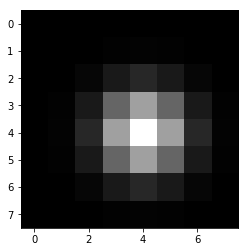

Original crop
[[ 66  85 108 154 149  82  48  46]
 [ 88 174 224 211 179  91  60  57]
 [118 255 255 255 254 123  65  58]
 [ 86 228 255 255 219 121  70  48]
 [ 53  90 126 137 108  78  57  42]
 [ 41  52  65  64  60  50  42  34]
 [ 29  39  45  46  44  40  35  28]
 [ 28  32  35  35  38  35  27  27]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   3  16  29  16   3   0]
 [  0   1  16  86 148  86  16   1]
 [  0   1  29 148 255 148  29   1]
 [  0   1  16  86 148  86  16   1]
 [  0   0   3  16  29  16   3   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   6  25  39  25   6   0]
 [  0   2  25 100 160 100  25   2]
 [  0   3  39 160 255 160  39   3]
 [  0   2  25 100 160 100  25   2]
 [  0   0   6  25  39  25   6   0]
 [  0   0   0   2   3   2   0   0]]

---------------------------------------------------

x: 402.57
y: 1659.8
sigma_min

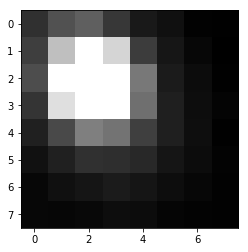

Spot reconstructed from gaussian fit parameters using sigma_min:


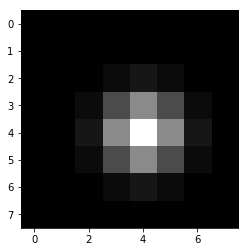

Spot reconstructed from gaussian fit parameters using sigma_max:


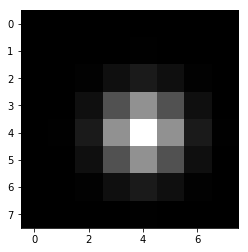

Original crop
[[ 69 100 111  76  49  41  28  27]
 [ 82 197 255 217  81  46  33  26]
 [ 95 255 255 255 134  51  37  27]
 [ 74 226 255 255 126  54  38  30]
 [ 55  92 140 129  83  54  39  27]
 [ 42  55  69  68  62  45  37  29]
 [ 33  41  45  51  45  38  33  28]
 [ 33  32  34  38  37  31  29  28]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   1  11  22  11   1   0]
 [  0   0  11  74 138  74  11   0]
 [  0   1  22 138 255 138  22   1]
 [  0   0  11  74 138  74  11   0]
 [  0   0   1  11  22  11   1   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  15  26  15   2   0]
 [  0   0  15  82 144  82  15   0]
 [  0   1  26 144 255 144  26   1]
 [  0   0  15  82 144  82  15   0]
 [  0   0   2  15  26  15   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 483.5
y: 1897.9
sigma_min:

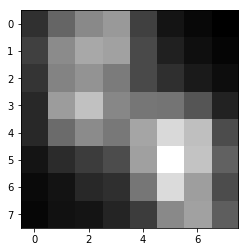

Spot reconstructed from gaussian fit parameters using sigma_min:


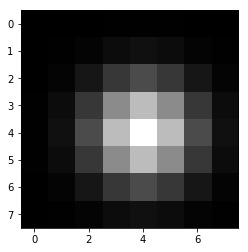

Spot reconstructed from gaussian fit parameters using sigma_max:


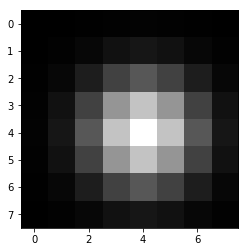

Original crop
[[ 49  79 100 109  58  33  26  21]
 [ 58 101 118 114  64  40  30  24]
 [ 51  97 106  92  64  48  36  29]
 [ 45 111 132  99  89  88  70  41]
 [ 44  83 101  90 116 146 131  65]
 [ 33  46  56  65 113 168 134  77]
 [ 27  32  44  48  89 147 112  65]
 [ 25  31  33  42  56 100 114  75]]
Reconstructed using sigma min
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   8  10   8   3   0]
 [  0   3  14  36  49  36  14   3]
 [  0   8  36  91 123  91  36   8]
 [  1  10  49 123 168 123  49  10]
 [  0   8  36  91 123  91  36   8]
 [  0   3  14  36  49  36  14   3]
 [  0   0   3   8  10   8   3   0]]
Reconstructed using sigma max
[[  0   0   0   1   2   1   0   0]
 [  0   1   5  11  15  11   5   1]
 [  0   5  19  43  57  43  19   5]
 [  1  11  43  98 128  98  43  11]
 [  2  15  57 128 168 128  57  15]
 [  1  11  43  98 128  98  43  11]
 [  0   5  19  43  57  43  19   5]
 [  0   1   5  11  15  11   5   1]]

---------------------------------------------------

x: 487.47
y: 1901.0
sigma_min

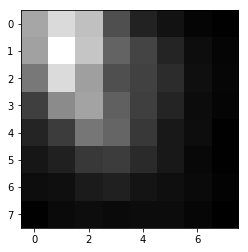

Spot reconstructed from gaussian fit parameters using sigma_min:


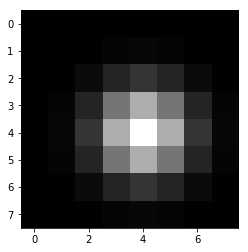

Spot reconstructed from gaussian fit parameters using sigma_max:


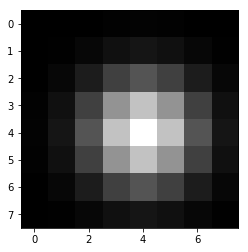

Original crop
[[116 146 131  65  39  30  22  20]
 [113 168 134  77  59  41  27  22]
 [ 89 147 112  65  57  45  28  23]
 [ 56 100 114  75  56  40  26  22]
 [ 40  55  88  78  52  33  27  20]
 [ 32  38  52  55  44  33  24  20]
 [ 27  28  35  38  31  28  25  21]
 [ 20  25  27  25  26  26  23  19]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   7  23  35  23   7   1]
 [  0   3  23  77 113  77  23   3]
 [  0   5  35 113 168 113  35   5]
 [  0   3  23  77 113  77  23   3]
 [  0   1   7  23  35  23   7   1]
 [  0   0   1   3   5   3   1   0]]
Reconstructed using sigma max
[[  0   0   0   1   2   1   0   0]
 [  0   1   4  10  14  10   4   1]
 [  0   4  18  42  55  42  18   4]
 [  1  10  42  96 127  96  42  10]
 [  2  14  55 127 168 127  55  14]
 [  1  10  42  96 127  96  42  10]
 [  0   4  18  42  55  42  18   4]
 [  0   1   4  10  14  10   4   1]]

---------------------------------------------------

x: 531.9
y: 1930.4
sigma_min:

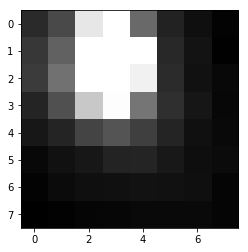

Spot reconstructed from gaussian fit parameters using sigma_min:


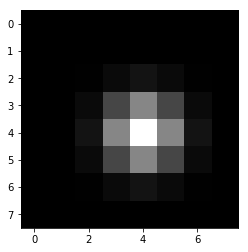

Spot reconstructed from gaussian fit parameters using sigma_max:


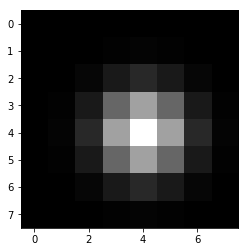

Original crop
[[ 62  91 233 255 119  55  38  27]
 [ 74 112 255 255 255  61  42  25]
 [ 78 127 255 255 242  63  40  32]
 [ 58  97 205 253 130  67  44  31]
 [ 45  57  86 100  81  58  39  33]
 [ 32  40  45  56  57  46  37  34]
 [ 27  34  38  39  41  40  38  29]
 [ 24  26  29  30  33  33  33  29]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1  10  19  10   1   0]
 [  0   0  10  70 133  70  10   0]
 [  0   0  19 133 255 133  19   0]
 [  0   0  10  70 133  70  10   0]
 [  0   0   1  10  19  10   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  25  40  25   6   0]
 [  0   2  25 102 161 102  25   2]
 [  0   4  40 161 255 161  40   4]
 [  0   2  25 102 161 102  25   2]
 [  0   0   6  25  40  25   6   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 557.29
y: 1797.9
sigma_min

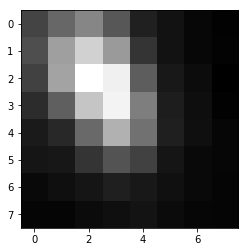

Spot reconstructed from gaussian fit parameters using sigma_min:


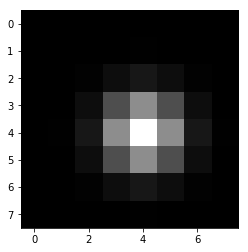

Spot reconstructed from gaussian fit parameters using sigma_max:


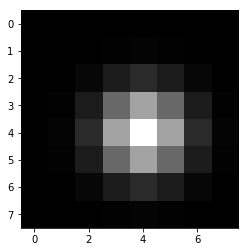

Original crop
[[ 86 117 145 103  54  41  31  26]
 [ 95 168 213 163  72  41  31  27]
 [ 84 172 255 241 108  46  35  24]
 [ 65 110 202 244 138  51  37  26]
 [ 48  61 119 184 126  52  38  30]
 [ 43  45  71  99  83  43  33  30]
 [ 33  38  43  52  46  39  33  29]
 [ 29  29  34  38  42  34  30  29]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  13  23  13   2   0]
 [  0   0  13  77 140  77  13   0]
 [  0   1  23 140 255 140  23   1]
 [  0   0  13  77 140  77  13   0]
 [  0   0   2  13  23  13   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   7  27  42  27   7   0]
 [  0   2  27 104 162 104  27   2]
 [  0   4  42 162 255 162  42   4]
 [  0   2  27 104 162 104  27   2]
 [  0   0   7  27  42  27   7   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 552.53
y: 1640.0
sigma_min

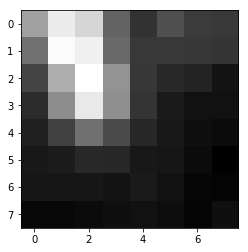

Spot reconstructed from gaussian fit parameters using sigma_min:


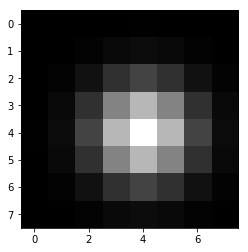

Spot reconstructed from gaussian fit parameters using sigma_max:


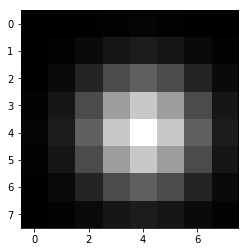

Original crop
[[ 93 127 117  65  43  56  47  46]
 [ 72 134 129  68  46  46  45  44]
 [ 51  99 136  87  45  39  36  29]
 [ 40  84 126  85  44  32  28  28]
 [ 35  49  71  54  38  31  27  25]
 [ 31  33  39  38  31  30  25  20]
 [ 30  30  30  29  32  28  23  22]
 [ 24  24  25  27  28  26  22  27]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  25  35  25   9   1]
 [  0   4  25  69  97  69  25   4]
 [  0   6  35  97 136  97  35   6]
 [  0   4  25  69  97  69  25   4]
 [  0   1   9  25  35  25   9   1]
 [  0   0   1   4   6   4   1   0]]
Reconstructed using sigma max
[[  0   0   1   2   2   2   1   0]
 [  0   1   5  11  15  11   5   1]
 [  1   5  19  40  51  40  19   5]
 [  2  11  40  83 106  83  40  11]
 [  2  15  51 106 136 106  51  15]
 [  2  11  40  83 106  83  40  11]
 [  1   5  19  40  51  40  19   5]
 [  0   1   5  11  15  11   5   1]]

---------------------------------------------------

x: 598.54
y: 1861.4
sigma_min

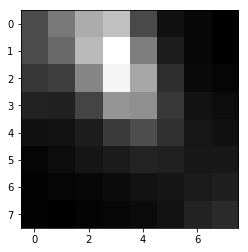

Spot reconstructed from gaussian fit parameters using sigma_min:


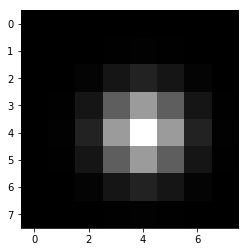

Spot reconstructed from gaussian fit parameters using sigma_max:


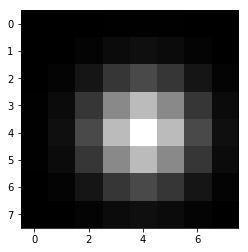

Original crop
[[ 94 132 175 193  92  43  36  30]
 [ 93 119 186 246 136  54  36  30]
 [ 75  82 143 237 171  68  38  34]
 [ 58  57  87 156 151  77  45  40]
 [ 44  45  54  79  95  70  49  43]
 [ 34  40  47  52  59  57  50  50]
 [ 31  34  35  39  45  48  52  56]
 [ 31  29  33  36  39  45  58  66]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  20  33  20   4   0]
 [  0   1  20  90 149  90  20   1]
 [  0   2  33 149 246 149  33   2]
 [  0   1  20  90 149  90  20   1]
 [  0   0   4  20  33  20   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   4  11  15  11   4   0]
 [  0   4  20  52  71  52  20   4]
 [  1  11  52 132 180 132  52  11]
 [  1  15  71 180 246 180  71  15]
 [  1  11  52 132 180 132  52  11]
 [  0   4  20  52  71  52  20   4]
 [  0   0   4  11  15  11   4   0]]

---------------------------------------------------

x: 606.48
y: 1868.5
sigma_min

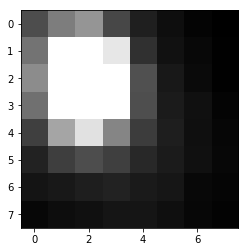

Spot reconstructed from gaussian fit parameters using sigma_min:


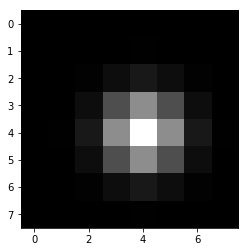

Spot reconstructed from gaussian fit parameters using sigma_max:


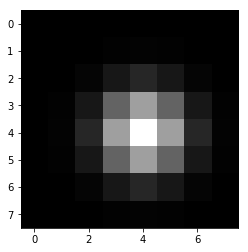

Original crop
[[ 95 138 160  90  54  39  30  26]
 [129 255 255 233  70  42  34  27]
 [152 255 255 255  98  48  35  27]
 [127 255 255 255  96  51  41  30]
 [ 83 174 228 145  81  53  40  32]
 [ 57  82  95  83  63  51  41  33]
 [ 44  48  53  57  50  46  34  31]
 [ 33  38  41  45  45  40  33  29]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  13  24  13   2   0]
 [  0   0  13  78 141  78  13   0]
 [  0   1  24 141 255 141  24   1]
 [  0   0  13  78 141  78  13   0]
 [  0   0   2  13  24  13   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  23  38  23   5   0]
 [  0   2  23  98 158  98  23   2]
 [  0   3  38 158 255 158  38   3]
 [  0   2  23  98 158  98  23   2]
 [  0   0   5  23  38  23   5   0]
 [  0   0   0   2   3   2   0   0]]

---------------------------------------------------

x: 589.82
y: 2039.9
sigma_min

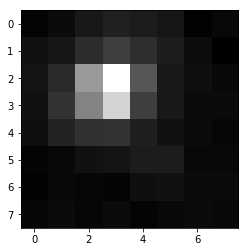

Spot reconstructed from gaussian fit parameters using sigma_min:


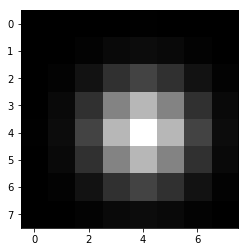

Spot reconstructed from gaussian fit parameters using sigma_max:


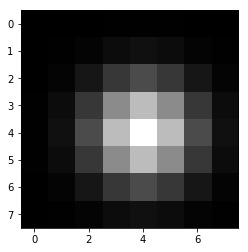

Original crop
[[ 33  36  42  46  44  41  32  35]
 [ 39  41  51  59  52  44  37  31]
 [ 40  50 100 146  70  42  38  35]
 [ 39  54  90 126  59  42  36  36]
 [ 38  47  53  54  45  39  36  34]
 [ 33  35  39  40  44  44  35  35]
 [ 32  35  34  33  38  39  36  36]
 [ 34  36  34  36  33  35  36  35]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   7   5   1   0]
 [  0   1  10  27  38  27  10   1]
 [  0   5  27  75 104  75  27   5]
 [  0   7  38 104 146 104  38   7]
 [  0   5  27  75 104  75  27   5]
 [  0   1  10  27  38  27  10   1]
 [  0   0   1   5   7   5   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  12  31  43  31  12   2]
 [  0   6  31  79 107  79  31   6]
 [  1   9  43 107 146 107  43   9]
 [  0   6  31  79 107  79  31   6]
 [  0   2  12  31  43  31  12   2]
 [  0   0   2   6   9   6   2   0]]

---------------------------------------------------

x: 642.18
y: 2016.1
sigma_min

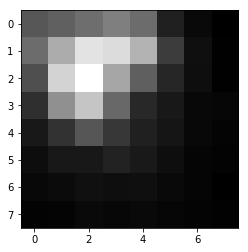

Spot reconstructed from gaussian fit parameters using sigma_min:


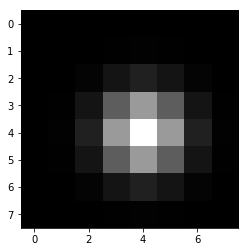

Spot reconstructed from gaussian fit parameters using sigma_max:


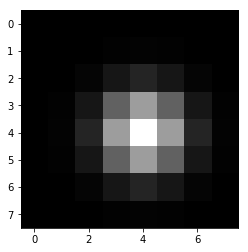

Original crop
[[103 111 124 139 122  53  33  24]
 [122 180 230 223 186  79  38  25]
 [ 96 216 255 174 110  59  37  25]
 [ 67 154 202 118  61  46  32  30]
 [ 46  70 102  74  54  43  32  28]
 [ 36  46  46  55  47  37  29  27]
 [ 32  34  39  37  38  33  29  24]
 [ 27  28  33  31  33  30  28  26]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  20  33  20   4   0]
 [  0   1  20  92 153  92  20   1]
 [  0   2  33 153 255 153  33   2]
 [  0   1  20  92 153  92  20   1]
 [  0   0   4  20  33  20   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  22  36  22   5   0]
 [  0   2  22  97 157  97  22   2]
 [  0   3  36 157 255 157  36   3]
 [  0   2  22  97 157  97  22   2]
 [  0   0   5  22  36  22   5   0]
 [  0   0   0   2   3   2   0   0]]

---------------------------------------------------

x: 675.5
y: 1940.7
sigma_min:

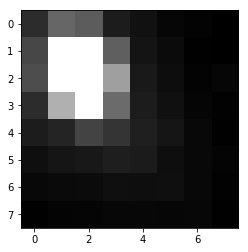

Spot reconstructed from gaussian fit parameters using sigma_min:


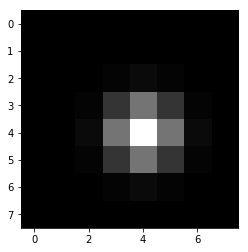

Spot reconstructed from gaussian fit parameters using sigma_max:


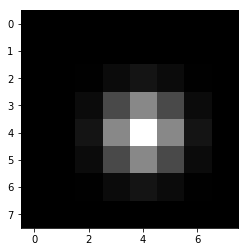

Original crop
[[ 65 117 108  51  41  31  28  25]
 [ 89 255 255 111  43  35  26  25]
 [ 95 255 255 168  48  37  28  31]
 [ 65 184 255 122  51  40  30  27]
 [ 51  59  86  73  53  44  33  26]
 [ 39  44  47  52  50  38  33  29]
 [ 33  34  35  39  38  39  33  27]
 [ 26  29  30  32  32  31  32  26]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   4  10   4   0   0]
 [  0   0   4  52 115  52   4   0]
 [  0   0  10 115 255 115  10   0]
 [  0   0   4  52 115  52   4   0]
 [  0   0   0   4  10   4   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1  11  20  11   1   0]
 [  0   0  11  72 136  72  11   0]
 [  0   0  20 136 255 136  20   0]
 [  0   0  11  72 136  72  11   0]
 [  0   0   1  11  20  11   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 699.31
y: 1915.3
sigma_min

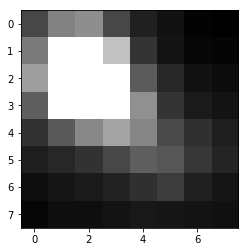

Spot reconstructed from gaussian fit parameters using sigma_min:


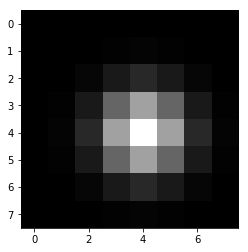

Spot reconstructed from gaussian fit parameters using sigma_max:


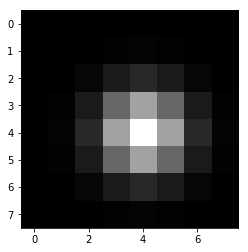

Original crop
[[ 92 144 155  92  58  45  32  29]
 [138 255 255 200  75  47  36  34]
 [169 255 255 255 110  64  45  40]
 [113 255 255 255 157  76  52  46]
 [ 74 109 149 174 147  94  72  56]
 [ 56  64  74  92 112 105  78  62]
 [ 42  48  52  60  73  82  59  48]
 [ 35  42  42  46  51  49  46  44]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  25  40  25   6   0]
 [  0   2  25 101 160 101  25   2]
 [  0   4  40 160 255 160  40   4]
 [  0   2  25 101 160 101  25   2]
 [  0   0   6  25  40  25   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  26  41  26   6   0]
 [  0   2  26 102 161 102  26   2]
 [  0   4  41 161 255 161  41   4]
 [  0   2  26 102 161 102  26   2]
 [  0   0   6  26  41  26   6   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 673.12
y: 1904.2
sigma_min

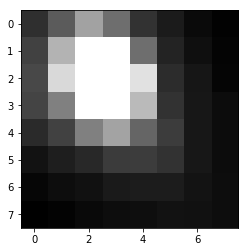

Spot reconstructed from gaussian fit parameters using sigma_min:


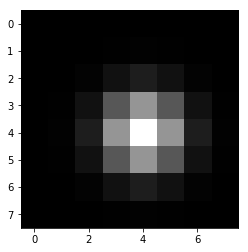

Spot reconstructed from gaussian fit parameters using sigma_max:


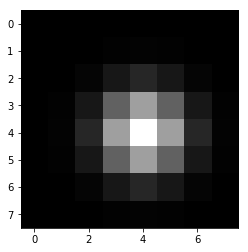

Original crop
[[ 72 110 173 127  74  54  39  32]
 [ 88 189 255 255 127  61  44  34]
 [ 94 221 255 255 228  70  50  35]
 [ 90 143 255 255 194  74  51  41]
 [ 67  88 143 174 119  83  51  41]
 [ 46  57  66  82  83  74  51  41]
 [ 36  42  45  53  55  55  47  42]
 [ 30  33  38  42  43  46  45  42]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   3  17  29  17   3   0]
 [  0   1  17  86 148  86  17   1]
 [  0   1  29 148 255 148  29   1]
 [  0   1  17  86 148  86  17   1]
 [  0   0   3  17  29  17   3   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  23  38  23   5   0]
 [  0   2  23  98 158  98  23   2]
 [  0   3  38 158 255 158  38   3]
 [  0   2  23  98 158  98  23   2]
 [  0   0   5  23  38  23   5   0]
 [  0   0   0   2   3   2   0   0]]

---------------------------------------------------

x: 769.92
y: 1936.7
sigma_min

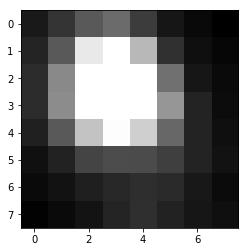

Spot reconstructed from gaussian fit parameters using sigma_min:


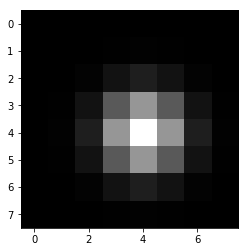

Spot reconstructed from gaussian fit parameters using sigma_max:


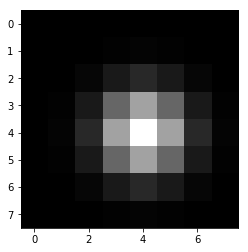

Original crop
[[ 56  79 111 127  86  53  42  34]
 [ 66 111 236 255 193  77  47  40]
 [ 73 153 255 255 255 131  53  43]
 [ 72 155 255 255 255 164  65  45]
 [ 62 111 204 253 213 123  65  47]
 [ 48  64  93 100  99  89  65  50]
 [ 43  50  61  70  74  71  55  44]
 [ 36  43  51  66  75  64  53  47]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  18  30  18   3   0]
 [  0   1  18  88 150  88  18   1]
 [  0   2  30 150 255 150  30   2]
 [  0   1  18  88 150  88  18   1]
 [  0   0   3  18  30  18   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  25  40  25   6   0]
 [  0   2  25 102 161 102  25   2]
 [  0   4  40 161 255 161  40   4]
 [  0   2  25 102 161 102  25   2]
 [  0   0   6  25  40  25   6   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 789.76
y: 2044.6
sigma_min

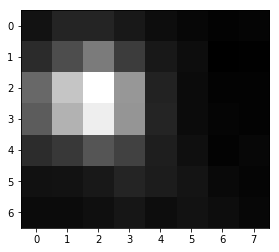

Spot reconstructed from gaussian fit parameters using sigma_min:


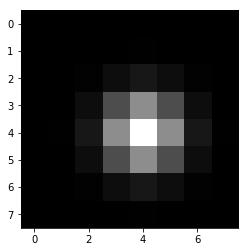

Spot reconstructed from gaussian fit parameters using sigma_max:


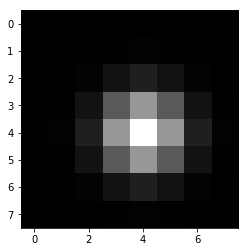

Original crop
[[ 30  39  39  33  27  24  22  23]
 [ 43  61  85  52  33  27  20  21]
 [ 75 124 155 100  38  26  22  22]
 [ 69 114 146  99  39  26  23  22]
 [ 44  50  65  55  36  28  22  24]
 [ 29  30  33  40  35  31  25  23]
 [ 26  26  28  32  27  30  27  24]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  14   7   1   0]
 [  0   0   7  47  85  47   7   0]
 [  0   0  14  85 155  85  14   0]
 [  0   0   7  47  85  47   7   0]
 [  0   0   1   7  14   7   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  11  19  11   2   0]
 [  0   0  11  54  91  54  11   0]
 [  0   1  19  91 155  91  19   1]
 [  0   0  11  54  91  54  11   0]
 [  0   0   2  11  19  11   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 725.49
y: 1824.1
sigma_min: 1.0459646077290927
sigma_max: 2.7

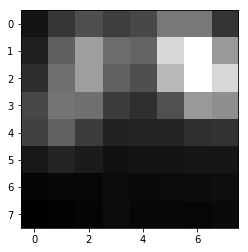

Spot reconstructed from gaussian fit parameters using sigma_min:


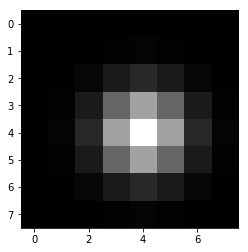

Spot reconstructed from gaussian fit parameters using sigma_max:


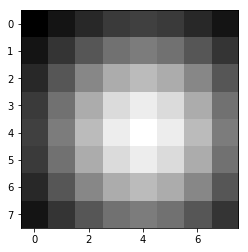

Original crop
[[ 48  78 100  85  94 136 136  76]
 [ 58 115 169 125 118 220 255 165]
 [ 71 128 169 116 100 193 255 219]
 [ 93 132 128  83  72 101 165 156]
 [ 88 116  83  60  61  63  73  74]
 [ 51  62  54  45  47  47  50  50]
 [ 35  37  37  41  39  40  42  44]
 [ 30  32  35  40  37  37  36  39]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  25  40  25   6   0]
 [  0   2  25 102 161 102  25   2]
 [  0   4  40 161 255 161  40   4]
 [  0   2  25 102 161 102  25   2]
 [  0   0   6  25  40  25   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[ 29  46  65  80  86  80  65  46]
 [ 46  75 105 129 138 129 105  75]
 [ 65 105 148 181 194 181 148 105]
 [ 80 129 181 222 238 222 181 129]
 [ 86 138 194 238 255 238 194 138]
 [ 80 129 181 222 238 222 181 129]
 [ 65 105 148 181 194 181 148 105]
 [ 46  75 105 129 138 129 105  75]]

---------------------------------------------------

x: 730.25
y: 1824.9
sigma_min

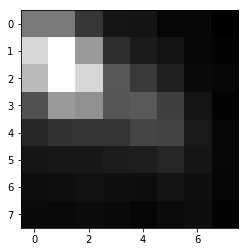

Spot reconstructed from gaussian fit parameters using sigma_min:


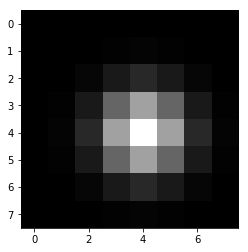

Spot reconstructed from gaussian fit parameters using sigma_max:


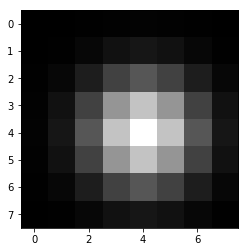

Original crop
[[136 136  76  47  46  34  35  28]
 [220 255 165  69  52  45  35  31]
 [193 255 219 106  80  58  37  34]
 [101 165 156 105 107  84  47  31]
 [ 63  73  74  75  90  88  51  34]
 [ 47  50  50  53  55  62  48  34]
 [ 40  42  44  43  41  45  43  33]
 [ 37  36  39  37  33  38  41  31]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  25  40  25   6   0]
 [  0   2  25 101 160 101  25   2]
 [  0   4  40 160 255 160  40   4]
 [  0   2  25 101 160 101  25   2]
 [  0   0   6  25  40  25   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   1   2   3   2   1   0]
 [  0   1   7  17  22  17   7   1]
 [  1   7  29  66  86  66  29   7]
 [  2  17  66 148 194 148  66  17]
 [  3  22  86 194 255 194  86  22]
 [  2  17  66 148 194 148  66  17]
 [  1   7  29  66  86  66  29   7]
 [  0   1   7  17  22  17   7   1]]

---------------------------------------------------

x: 748.5
y: 1786.0
sigma_min:

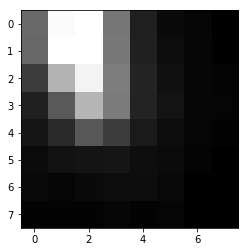

Spot reconstructed from gaussian fit parameters using sigma_min:


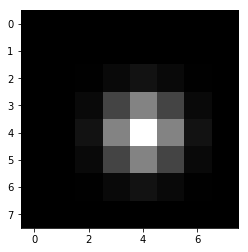

Spot reconstructed from gaussian fit parameters using sigma_max:


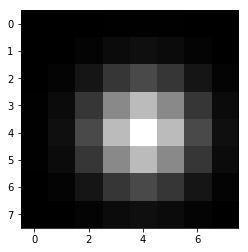

Original crop
[[124 251 255 135  60  41  38  32]
 [122 255 255 137  60  44  38  33]
 [ 85 188 244 141  64  46  38  36]
 [ 60 111 190 140  63  49  38  37]
 [ 51  69 108  85  55  44  37  35]
 [ 42  48  50  52  45  42  36  32]
 [ 40  37  41  43  44  40  33  33]
 [ 35  35  35  38  35  37  33  33]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   9  18   9   1   0]
 [  0   0   9  68 132  68   9   0]
 [  0   0  18 132 255 132  18   0]
 [  0   0   9  68 132  68   9   0]
 [  0   0   1   9  18   9   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   4  11  15  11   4   0]
 [  0   4  21  54  74  54  21   4]
 [  1  11  54 137 187 137  54  11]
 [  1  15  74 187 255 187  74  15]
 [  1  11  54 137 187 137  54  11]
 [  0   4  21  54  74  54  21   4]
 [  0   0   4  11  15  11   4   0]]

---------------------------------------------------

x: 815.15
y: 1859.0
sigma_min

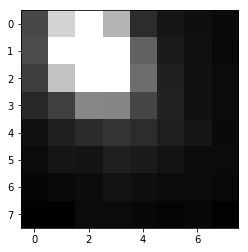

Spot reconstructed from gaussian fit parameters using sigma_min:


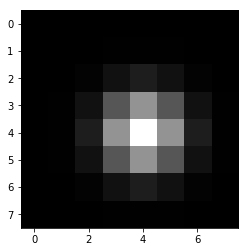

Spot reconstructed from gaussian fit parameters using sigma_max:


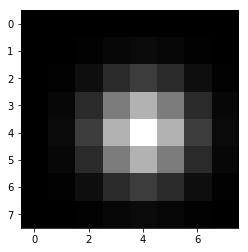

Original crop
[[ 97 217 255 191  73  54  48  44]
 [101 255 255 255 119  58  49  43]
 [ 89 202 255 255 129  63  50  45]
 [ 71  90 152 150  95  65  50  45]
 [ 50  64  72  79  73  61  54  44]
 [ 45  54  53  63  59  52  46  45]
 [ 40  43  46  51  48  45  45  43]
 [ 36  35  45  45  42  40  42  37]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   3  17  29  17   3   0]
 [  0   1  17  86 148  86  17   1]
 [  0   1  29 148 255 148  29   1]
 [  0   1  17  86 148  86  17   1]
 [  0   0   3  17  29  17   3   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   7  10   7   2   0]
 [  0   2  14  42  60  42  14   2]
 [  0   7  42 124 178 124  42   7]
 [  0  10  60 178 255 178  60  10]
 [  0   7  42 124 178 124  42   7]
 [  0   2  14  42  60  42  14   2]
 [  0   0   2   7  10   7   2   0]]

---------------------------------------------------

x: 828.63
y: 1740.0
sigma_min

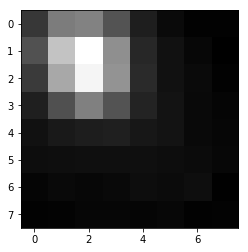

Spot reconstructed from gaussian fit parameters using sigma_min:


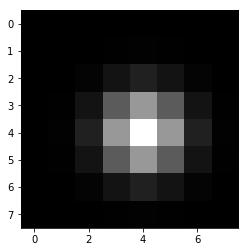

Spot reconstructed from gaussian fit parameters using sigma_max:


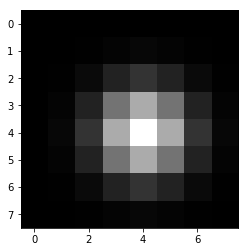

Original crop
[[ 72 124 129  93  53  38  32  32]
 [ 92 179 224 139  60  43  36  30]
 [ 74 158 216 142  62  43  38  32]
 [ 54  91 127  93  57  45  37  34]
 [ 43  49  52  54  48  45  37  35]
 [ 40  41  42  42  42  40  39  36]
 [ 34  37  36  37  40  39  41  31]
 [ 32  33  35  35  34  36  32  33]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  16  28  16   3   0]
 [  0   1  16  79 133  79  16   1]
 [  0   2  28 133 224 133  28   2]
 [  0   1  16  79 133  79  16   1]
 [  0   0   3  16  28  16   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  30  45  30   9   1]
 [  0   4  30 100 150 100  30   4]
 [  0   6  45 150 224 150  45   6]
 [  0   4  30 100 150 100  30   4]
 [  0   1   9  30  45  30   9   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 774.68
y: 1739.2
sigma_min

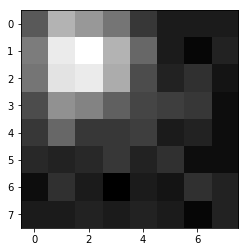

Spot reconstructed from gaussian fit parameters using sigma_min:


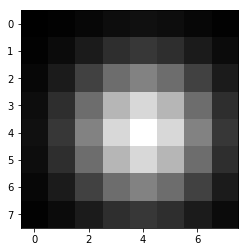

Spot reconstructed from gaussian fit parameters using sigma_max:


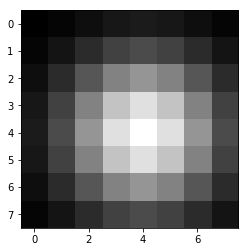

Original crop
[[38 51 47 42 33 29 29 29]
 [43 59 62 51 40 29 26 30]
 [42 58 59 50 36 30 32 28]
 [36 46 44 39 35 34 33 27]
 [33 40 33 33 34 29 30 27]
 [31 30 31 33 30 32 27 27]
 [27 32 29 25 29 28 32 30]
 [29 29 30 29 30 29 26 30]]
Reconstructed using sigma min
[[ 0  0  2  3  4  3  2  0]
 [ 0  3  6 11 13 11  6  3]
 [ 2  6 16 26 31 26 16  6]
 [ 3 11 26 44 52 44 26 11]
 [ 4 13 31 52 62 52 31 13]
 [ 3 11 26 44 52 44 26 11]
 [ 2  6 16 26 31 26 16  6]
 [ 0  3  6 11 13 11  6  3]]
Reconstructed using sigma max
[[ 0  2  4  6  7  6  4  2]
 [ 2  5 11 16 19 16 11  5]
 [ 4 11 21 32 36 32 21 11]
 [ 6 16 32 47 54 47 32 16]
 [ 7 19 36 54 62 54 36 19]
 [ 6 16 32 47 54 47 32 16]
 [ 4 11 21 32 36 32 21 11]
 [ 2  5 11 16 19 16 11  5]]

---------------------------------------------------

x: 778.65
y: 1607.5
sigma_min: 1.267796843028132
sigma_max: 1.2849184232772064
height: 89.7593562061695
max_intensity: 123


Original crop around spot at (778, 1607):


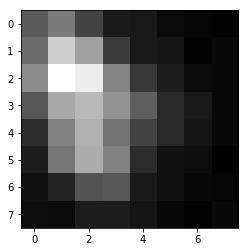

Spot reconstructed from gaussian fit parameters using sigma_min:


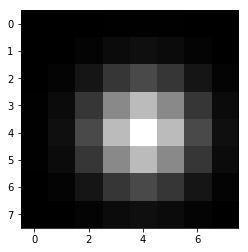

Spot reconstructed from gaussian fit parameters using sigma_max:


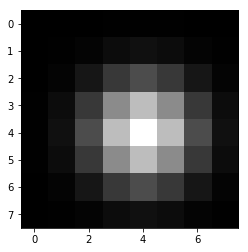

Original crop
[[ 62  74  53  38  37  32  30  29]
 [ 68 105  88  50  37  36  29  31]
 [ 80 123 116  77  49  39  32  31]
 [ 60  91  97  83  63  43  37  31]
 [ 45  76  93  71  53  43  36  31]
 [ 39  72  92  76  44  35  33  28]
 [ 34  42  59  60  38  34  31  30]
 [ 33  32  39  39  36  31  29  31]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   5   7   5   2   0]
 [  0   2  10  25  35  25  10   2]
 [  0   5  25  66  90  66  25   5]
 [  0   7  35  90 123  90  35   7]
 [  0   5  25  66  90  66  25   5]
 [  0   2  10  25  35  25  10   2]
 [  0   0   2   5   7   5   2   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   5   8   5   2   0]
 [  0   2  10  27  36  27  10   2]
 [  0   5  27  67  90  67  27   5]
 [  0   8  36  90 123  90  36   8]
 [  0   5  27  67  90  67  27   5]
 [  0   2  10  27  36  27  10   2]
 [  0   0   2   5   8   5   2   0]]

---------------------------------------------------

x: 788.17
y: 1605.9
sigma_min

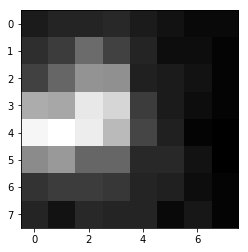

Spot reconstructed from gaussian fit parameters using sigma_min:


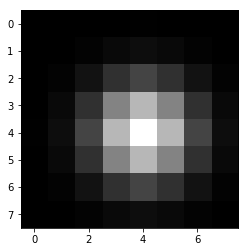

Spot reconstructed from gaussian fit parameters using sigma_max:


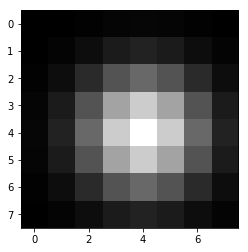

Original crop
[[29 31 31 32 29 27 25 25]
 [33 36 46 37 31 26 26 24]
 [37 45 55 54 30 29 27 24]
 [60 59 73 69 36 29 26 24]
 [76 78 74 63 38 30 24 23]
 [53 56 45 45 32 32 27 23]
 [34 36 36 35 31 30 26 24]
 [31 27 32 31 31 25 28 24]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  5 14 20 14  5  1]
 [ 0  2 14 40 56 40 14  2]
 [ 0  3 20 56 78 56 20  3]
 [ 0  2 14 40 56 40 14  2]
 [ 0  1  5 14 20 14  5  1]
 [ 0  0  1  2  3  2  1  0]]
Reconstructed using sigma max
[[ 0  0  0  1  2  1  0  0]
 [ 0  1  4  8 10  8  4  1]
 [ 0  4 13 25 31 25 13  4]
 [ 1  8 25 49 62 49 25  8]
 [ 2 10 31 62 78 62 31 10]
 [ 1  8 25 49 62 49 25  8]
 [ 0  4 13 25 31 25 13  4]
 [ 0  1  4  8 10  8  4  1]]

---------------------------------------------------

x: 876.24
y: 1594.0
sigma_min: 1.1156902423506914
sigma_max: 1.1469077183376313
height: 181.15594073817212
max_intensity: 255


Original crop around spot at (876, 1594):


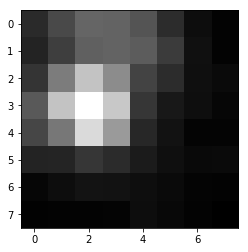

Spot reconstructed from gaussian fit parameters using sigma_min:


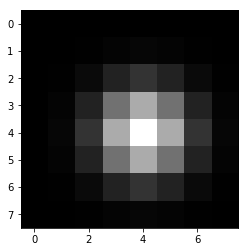

Spot reconstructed from gaussian fit parameters using sigma_max:


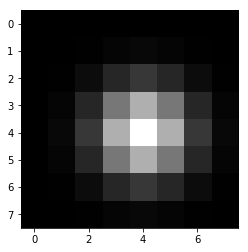

Original crop
[[ 78 104 127 125 113  81  54  46]
 [ 72  95 123 125 120  92  57  46]
 [ 87 146 206 159  99  80  56  52]
 [117 206 255 209  88  63  55  48]
 [101 142 224 171  76  58  47  47]
 [ 72  73  88  79  66  56  51  52]
 [ 48  54  59  58  55  52  47  46]
 [ 45  46  46  47  54  50  46  43]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1  10  34  51  34  10   1]
 [  0   4  34 114 170 114  34   4]
 [  0   6  51 170 255 170  51   6]
 [  0   4  34 114 170 114  34   4]
 [  0   1  10  34  51  34  10   1]
 [  0   0   1   4   6   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   8   5   1   0]
 [  0   1  12  38  55  38  12   1]
 [  0   5  38 119 174 119  38   5]
 [  0   8  55 174 255 174  55   8]
 [  0   5  38 119 174 119  38   5]
 [  0   1  12  38  55  38  12   1]
 [  0   0   1   5   8   5   1   0]]

---------------------------------------------------

x: 907.18
y: 1669.4
sigma_min

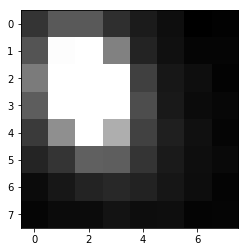

Spot reconstructed from gaussian fit parameters using sigma_min:


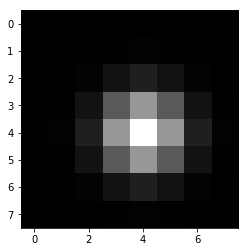

Spot reconstructed from gaussian fit parameters using sigma_max:


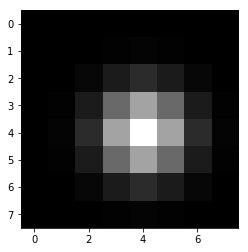

Original crop
[[ 86 117 116  81  64  53  41  43]
 [112 253 255 149  71  55  46  46]
 [144 255 255 255  95  61  53  44]
 [119 255 255 255 106  62  51  47]
 [ 90 161 255 187  96  67  55  46]
 [ 72  85 122 120  85  63  53  49]
 [ 51  61  71  76  70  60  52  45]
 [ 46  51  51  57  52  53  45  46]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  18  31  18   3   0]
 [  0   1  18  89 150  89  18   1]
 [  0   2  31 150 255 150  31   2]
 [  0   1  18  89 150  89  18   1]
 [  0   0   3  18  31  18   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   7  27  43  27   7   0]
 [  0   2  27 104 163 104  27   2]
 [  0   4  43 163 255 163  43   4]
 [  0   2  27 104 163 104  27   2]
 [  0   0   7  27  43  27   7   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 1002.4
y: 1691.6
sigma_min

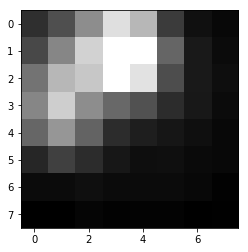

Spot reconstructed from gaussian fit parameters using sigma_min:


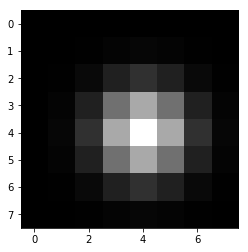

Spot reconstructed from gaussian fit parameters using sigma_max:


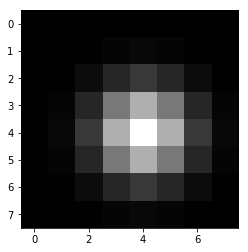

Original crop
[[ 77 104 157 227 193  87  50  43]
 [ 98 151 216 255 255 123  58  46]
 [135 193 207 255 230 102  58  48]
 [151 213 157 125 106  74  57  46]
 [124 165 121  74  62  55  49  43]
 [ 69  91  74  56  48  49  45  43]
 [ 46  46  49  46  46  46  43  38]
 [ 36  36  41  38  39  39  36  37]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  32  49  32   9   1]
 [  0   4  32 111 168 111  32   4]
 [  0   6  49 168 255 168  49   6]
 [  0   4  32 111 168 111  32   4]
 [  0   1   9  32  49  32   9   1]
 [  0   0   1   4   6   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   5   8   5   1   0]
 [  0   1  12  38  56  38  12   1]
 [  0   5  38 119 174 119  38   5]
 [  0   8  56 174 255 174  56   8]
 [  0   5  38 119 174 119  38   5]
 [  0   1  12  38  56  38  12   1]
 [  0   0   1   5   8   5   1   0]]

---------------------------------------------------

x: 1012.7
y: 1659.8
sigma_min

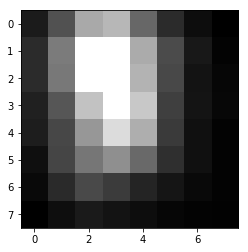

Spot reconstructed from gaussian fit parameters using sigma_min:


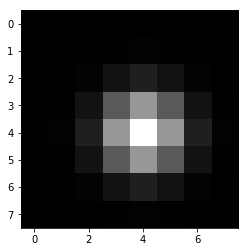

Spot reconstructed from gaussian fit parameters using sigma_max:


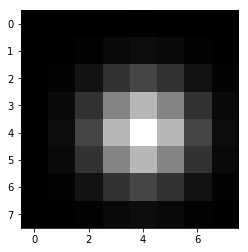

Original crop
[[ 67 112 184 195 129  80  55  44]
 [ 80 146 255 255 185 106  64  47]
 [ 80 143 255 255 192 104  60  49]
 [ 72 115 204 255 209  96  61  50]
 [ 68 103 169 226 188  92  58  47]
 [ 57 101 142 162 131  83  58  47]
 [ 52  79 105  93  74  62  52  47]
 [ 44  56  66  60  55  49  47  46]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  18  31  18   3   0]
 [  0   1  18  89 151  89  18   1]
 [  0   2  31 151 255 151  31   2]
 [  0   1  18  89 151  89  18   1]
 [  0   0   3  18  31  18   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   9  13   9   3   0]
 [  0   3  18  49  69  49  18   3]
 [  1   9  49 132 184 132  49   9]
 [  1  13  69 184 255 184  69  13]
 [  1   9  49 132 184 132  49   9]
 [  0   3  18  49  69  49  18   3]
 [  0   0   3   9  13   9   3   0]]

---------------------------------------------------

x: 1057.9
y: 1669.4
sigma_min

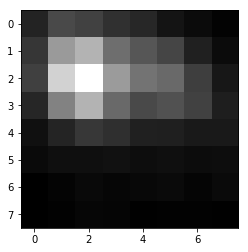

Spot reconstructed from gaussian fit parameters using sigma_min:


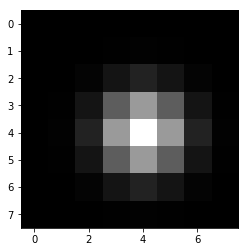

Spot reconstructed from gaussian fit parameters using sigma_max:


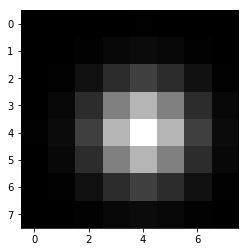

Original crop
[[ 65  98  91  76  68  52  44  37]
 [ 81 167 190 129 109  94  63  44]
 [ 90 216 255 168 134 125  88  54]
 [ 67 147 190 126  98 105  91  60]
 [ 48  66  82  75  62  61  56  56]
 [ 43  47  47  49  46  47  45  46]
 [ 34  38  42  40  41  43  39  43]
 [ 34  36  40  39  35  36  36  35]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  20  33  20   4   0]
 [  0   1  20  93 154  93  20   1]
 [  0   2  33 154 255 154  33   2]
 [  0   1  20  93 154  93  20   1]
 [  0   0   4  20  33  20   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   8  11   8   2   0]
 [  0   2  16  45  64  45  16   2]
 [  0   8  45 127 180 127  45   8]
 [  1  11  64 180 255 180  64  11]
 [  0   8  45 127 180 127  45   8]
 [  0   2  16  45  64  45  16   2]
 [  0   0   2   8  11   8   2   0]]

---------------------------------------------------

x: 1124.6
y: 1691.6
sigma_min

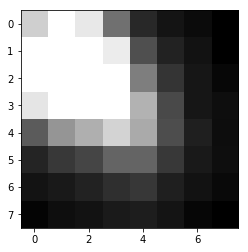

Spot reconstructed from gaussian fit parameters using sigma_min:


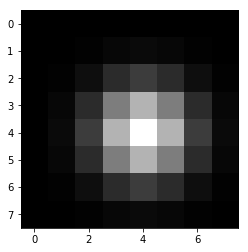

Spot reconstructed from gaussian fit parameters using sigma_max:


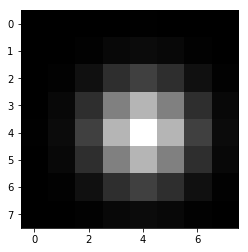

Original crop
[[215 255 236 138  79  63  55  46]
 [255 255 255 239 111  74  61  46]
 [255 255 255 255 149  89  64  52]
 [233 255 255 255 192 107  64  58]
 [121 168 189 219 185 109  72  57]
 [ 77  92 103 128 128  92  67  58]
 [ 62  67  74  85  91  72  61  54]
 [ 50  58  61  68  70  63  51  46]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   7  10   7   2   0]
 [  0   2  14  42  61  42  14   2]
 [  0   7  42 125 178 125  42   7]
 [  0  10  61 178 255 178  61  10]
 [  0   7  42 125 178 125  42   7]
 [  0   2  14  42  61  42  14   2]
 [  0   0   2   7  10   7   2   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   8  11   8   2   0]
 [  0   2  16  45  64  45  16   2]
 [  0   8  45 128 180 128  45   8]
 [  1  11  64 180 255 180  64  11]
 [  0   8  45 128 180 128  45   8]
 [  0   2  16  45  64  45  16   2]
 [  0   0   2   8  11   8   2   0]]

---------------------------------------------------

x: 1238.0
y: 1651.1
sigma_min

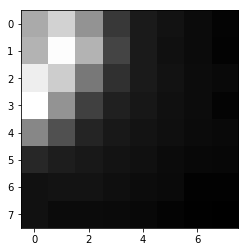

Spot reconstructed from gaussian fit parameters using sigma_min:


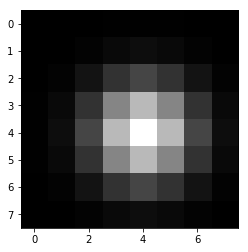

Spot reconstructed from gaussian fit parameters using sigma_max:


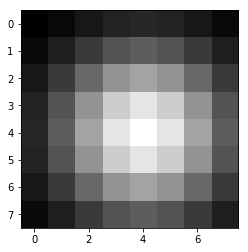

Original crop
[[178 212 158  81  55  48  42  36]
 [186 249 186  91  55  46  42  35]
 [236 208 135  74  55  48  43  40]
 [251 159  87  61  52  46  43  36]
 [148 101  64  53  49  45  42  40]
 [ 66  57  53  49  46  42  39  38]
 [ 47  49  49  45  43  41  34  34]
 [ 47  42  42  41  39  36  33  32]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   9  13   9   3   0]
 [  0   3  18  49  68  49  18   3]
 [  1   9  49 131 181 131  49   9]
 [  1  13  68 181 251 181  68  13]
 [  1   9  49 131 181 131  49   9]
 [  0   3  18  49  68  49  18   3]
 [  0   0   3   9  13   9   3   0]]
Reconstructed using sigma max
[[  8  17  30  41  46  41  30  17]
 [ 17  37  63  87  97  87  63  37]
 [ 30  63 107 148 164 148 107  63]
 [ 41  87 148 203 225 203 148  87]
 [ 46  97 164 225 251 225 164  97]
 [ 41  87 148 203 225 203 148  87]
 [ 30  63 107 148 164 148 107  63]
 [ 17  37  63  87  97  87  63  37]]

---------------------------------------------------

x: 1238.0
y: 1647.1
sigma_min

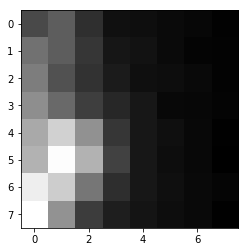

Spot reconstructed from gaussian fit parameters using sigma_min:


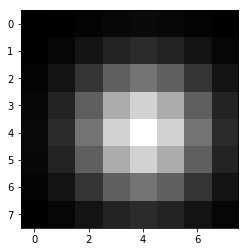

Spot reconstructed from gaussian fit parameters using sigma_max:


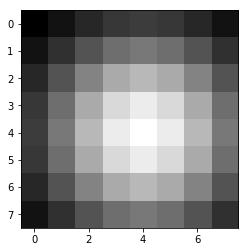

Original crop
[[ 97 114  75  49  47  44  41  37]
 [132 114  81  54  51  44  39  38]
 [141 105  78  58  48  46  43  38]
 [155 124  88  68  55  42  41  39]
 [178 212 158  81  55  48  42  36]
 [186 249 186  91  55  46  42  35]
 [236 208 135  74  55  48  43  40]
 [251 159  87  61  52  46  43  36]]
Reconstructed using sigma min
[[  0   1   4   8  10   8   4   1]
 [  1   7  19  35  42  35  19   7]
 [  4  19  51  93 114  93  51  19]
 [  8  35  93 169 206 169  93  35]
 [ 10  42 114 206 251 206 114  42]
 [  8  35  93 169 206 169  93  35]
 [  4  19  51  93 114  93  51  19]
 [  1   7  19  35  42  35  19   7]]
Reconstructed using sigma max
[[ 25  41  59  74  79  74  59  41]
 [ 41  69  98 122 131 122  98  69]
 [ 59  98 141 175 188 175 141  98]
 [ 74 122 175 217 233 217 175 122]
 [ 79 131 188 233 251 233 188 131]
 [ 74 122 175 217 233 217 175 122]
 [ 59  98 141 175 188 175 141  98]
 [ 41  69  98 122 131 122  98  69]]

---------------------------------------------------

x: 1426.1
y: 1796.3
sigma_min

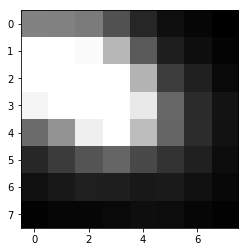

Spot reconstructed from gaussian fit parameters using sigma_min:


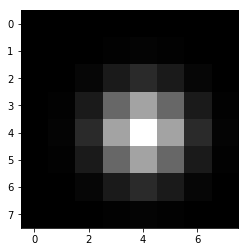

Spot reconstructed from gaussian fit parameters using sigma_max:


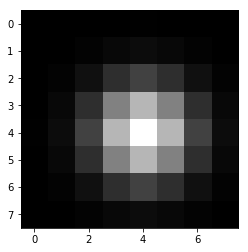

Original crop
[[151 150 145 111  75  56  48  43]
 [255 255 251 195 118  68  55  47]
 [255 255 255 255 192  94  70  51]
 [246 255 255 255 236 129  79  59]
 [132 166 241 255 200 127  81  58]
 [ 76  92 113 127 103  86  70  54]
 [ 57  63  69  68  63  65  57  50]
 [ 45  48  48  51  55  53  48  45]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  26  42  26   6   0]
 [  0   2  26 103 162 103  26   2]
 [  0   4  42 162 255 162  42   4]
 [  0   2  26 103 162 103  26   2]
 [  0   0   6  26  42  26   6   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   3   8  12   8   3   0]
 [  0   3  16  46  65  46  16   3]
 [  0   8  46 129 181 129  46   8]
 [  1  12  65 181 255 181  65  12]
 [  0   8  46 129 181 129  46   8]
 [  0   3  16  46  65  46  16   3]
 [  0   0   3   8  12   8   3   0]]

---------------------------------------------------

x: 1484.8
y: 1675.7
sigma_min

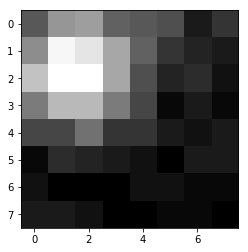

Spot reconstructed from gaussian fit parameters using sigma_min:


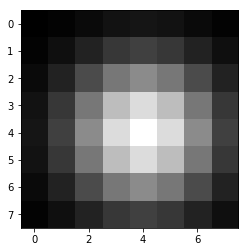

Spot reconstructed from gaussian fit parameters using sigma_max:


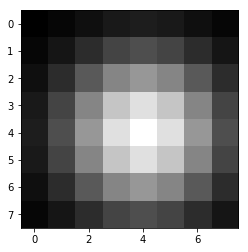

Original crop
[[37 44 45 38 37 36 30 33]
 [43 55 53 46 38 33 31 30]
 [49 56 56 46 36 31 32 29]
 [41 48 48 41 35 28 30 28]
 [35 35 40 33 33 30 29 30]
 [28 32 31 30 29 27 30 30]
 [29 27 27 27 29 29 28 28]
 [30 30 29 27 27 28 28 27]]
Reconstructed using sigma min
[[ 0  1  2  4  5  4  2  1]
 [ 1  3  7 12 14 12  7  3]
 [ 2  7 16 26 30 26 16  7]
 [ 4 12 26 41 48 41 26 12]
 [ 5 14 30 48 56 48 30 14]
 [ 4 12 26 41 48 41 26 12]
 [ 2  7 16 26 30 26 16  7]
 [ 1  3  7 12 14 12  7  3]]
Reconstructed using sigma max
[[ 0  2  4  6  7  6  4  2]
 [ 2  5 10 15 17 15 10  5]
 [ 4 10 20 29 33 29 20 10]
 [ 6 15 29 43 49 43 29 15]
 [ 7 17 33 49 56 49 33 17]
 [ 6 15 29 43 49 43 29 15]
 [ 4 10 20 29 33 29 20 10]
 [ 2  5 10 15 17 15 10  5]]

---------------------------------------------------

x: 1511.0
y: 1697.9
sigma_min: 1.5220235041418557
sigma_max: 4.290765230743821
height: 932453.9507699723
max_intensity: 76


Original crop around spot at (1511, 1697):


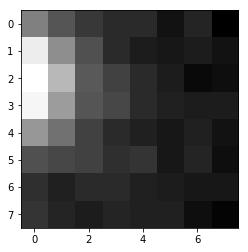

Spot reconstructed from gaussian fit parameters using sigma_min:


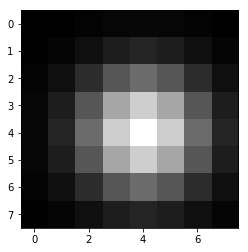

Spot reconstructed from gaussian fit parameters using sigma_max:


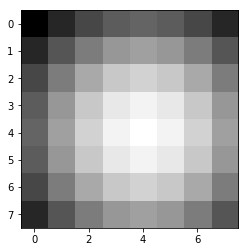

Original crop
[[49 40 34 31 31 26 30 22]
 [72 52 39 31 28 27 28 26]
 [76 61 41 36 31 28 24 25]
 [74 55 40 37 31 29 28 28]
 [54 46 36 31 29 27 29 26]
 [39 37 36 32 33 27 30 25]
 [32 29 31 31 29 28 27 27]
 [33 30 28 30 29 29 25 23]]
Reconstructed using sigma min
[[ 0  0  1  1  2  1  1  0]
 [ 0  1  4  8 10  8  4  1]
 [ 1  4 13 25 32 25 13  4]
 [ 1  8 25 49 61 49 25  8]
 [ 2 10 32 61 76 61 32 10]
 [ 1  8 25 49 61 49 25  8]
 [ 1  4 13 25 32 25 13  4]
 [ 0  1  4  8 10  8  4  1]]
Reconstructed using sigma max
[[31 38 44 47 49 47 44 38]
 [38 46 53 57 59 57 53 46]
 [44 53 61 66 68 66 61 53]
 [47 57 66 71 73 71 66 57]
 [49 59 68 73 76 73 68 59]
 [47 57 66 71 73 71 66 57]
 [44 53 61 66 68 66 61 53]
 [38 46 53 57 59 57 53 46]]

---------------------------------------------------

x: 1471.3
y: 1669.4
sigma_min: 1.6392759406637585
sigma_max: 1.6464591737258483
height: 37.72851177832613
max_intensity: 47


Original crop around spot at (1471, 1669):


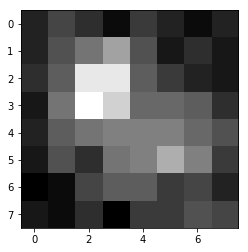

Spot reconstructed from gaussian fit parameters using sigma_min:


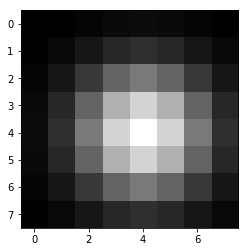

Spot reconstructed from gaussian fit parameters using sigma_max:


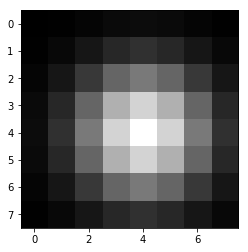

Original crop
[[28 31 29 26 30 28 26 28]
 [28 32 35 39 32 27 29 27]
 [29 33 45 45 33 30 28 27]
 [27 35 47 43 34 34 33 29]
 [28 33 35 36 36 36 34 32]
 [27 32 29 35 36 40 36 30]
 [25 26 31 33 33 30 31 28]
 [27 26 29 25 30 30 32 31]]
Reconstructed using sigma min
[[ 0  0  1  1  2  1  1  0]
 [ 0  1  4  7  8  7  4  1]
 [ 1  4 10 18 22 18 10  4]
 [ 1  7 18 32 39 32 18  7]
 [ 2  8 22 39 47 39 22  8]
 [ 1  7 18 32 39 32 18  7]
 [ 1  4 10 18 22 18 10  4]
 [ 0  1  4  7  8  7  4  1]]
Reconstructed using sigma max
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  4  7  8  7  4  1]
 [ 1  4 10 18 22 18 10  4]
 [ 2  7 18 32 39 32 18  7]
 [ 2  8 22 39 47 39 22  8]
 [ 2  7 18 32 39 32 18  7]
 [ 1  4 10 18 22 18 10  4]
 [ 0  1  4  7  8  7  4  1]]

---------------------------------------------------

x: 1245.2
y: 1601.1
sigma_min: 3.293624638731683
sigma_max: 4.999361932714675
height: 70099.86368296665
max_intensity: 66


Original crop around spot at (1245, 1601):


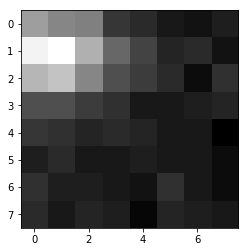

Spot reconstructed from gaussian fit parameters using sigma_min:


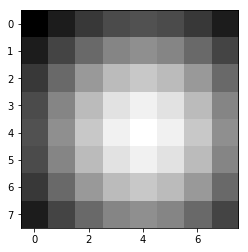

Spot reconstructed from gaussian fit parameters using sigma_max:


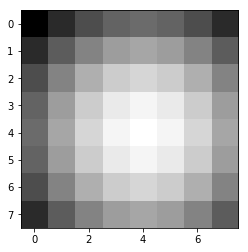

Original crop
[[50 46 45 33 31 28 27 29]
 [64 66 53 41 35 30 31 27]
 [54 56 46 37 34 31 26 32]
 [37 37 34 32 28 28 29 30]
 [33 32 30 31 30 28 28 24]
 [29 31 28 28 29 28 28 26]
 [32 29 29 28 27 32 28 26]
 [31 28 30 29 25 30 29 28]]
Reconstructed using sigma min
[[15 20 26 30 31 30 26 20]
 [20 28 36 41 43 41 36 28]
 [26 36 45 52 54 52 45 36]
 [30 41 52 60 63 60 52 41]
 [31 43 54 63 66 63 54 43]
 [30 41 52 60 63 60 52 41]
 [26 36 45 52 54 52 45 36]
 [20 28 36 41 43 41 36 28]]
Reconstructed using sigma max
[[34 40 44 46 47 46 44 40]
 [40 46 50 54 55 54 50 46]
 [44 50 56 59 60 59 56 50]
 [46 54 59 63 64 63 59 54]
 [47 55 60 64 66 64 60 55]
 [46 54 59 63 64 63 59 54]
 [44 50 56 59 60 59 56 50]
 [40 46 50 54 55 54 50 46]]

---------------------------------------------------

x: 1230.1
y: 1648.7
sigma_min: 1.4275136769314583
sigma_max: 4.11047546617598
height: 65054040.4649058
max_intensity: 186


Original crop around spot at (1230, 1648):


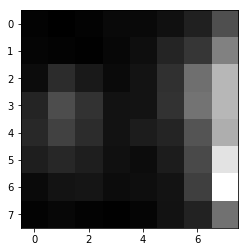

Spot reconstructed from gaussian fit parameters using sigma_min:


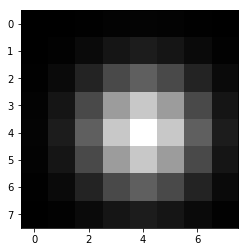

Spot reconstructed from gaussian fit parameters using sigma_max:


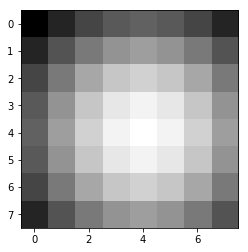

Original crop
[[ 46  44  46  49  49  53  62  88]
 [ 47  46  45  48  52  64  74 116]
 [ 51  69  58  50  55  71 106 146]
 [ 64  87  72  54  55  72 108 146]
 [ 67  81  69  54  60  65  91 141]
 [ 61  66  61  53  51  60  85 171]
 [ 50  55  56  51  52  55  79 186]
 [ 46  48  46  45  47  54  63 107]]
Reconstructed using sigma min
[[  0   0   1   2   3   2   1   0]
 [  0   2   7  15  20  15   7   2]
 [  1   7  26  54  69  54  26   7]
 [  2  15  54 113 145 113  54  15]
 [  3  20  69 145 186 145  69  20]
 [  2  15  54 113 145 113  54  15]
 [  1   7  26  54  69  54  26   7]
 [  0   2   7  15  20  15   7   2]]
Reconstructed using sigma max
[[ 72  88 102 112 115 112 102  88]
 [ 88 109 126 138 142 138 126 109]
 [102 126 146 160 165 160 146 126]
 [112 138 160 175 180 175 160 138]
 [115 142 165 180 186 180 165 142]
 [112 138 160 175 180 175 160 138]
 [102 126 146 160 165 160 146 126]
 [ 88 109 126 138 142 138 126 109]]

---------------------------------------------------

x: 872.27
y: 2014.5
sigma_min

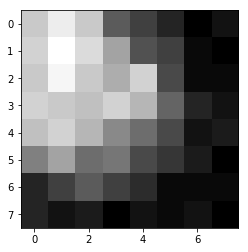

Spot reconstructed from gaussian fit parameters using sigma_min:


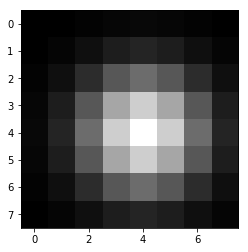

Spot reconstructed from gaussian fit parameters using sigma_max:


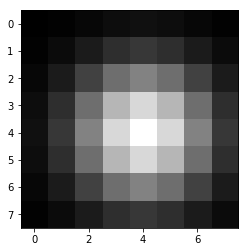

Original crop
[[44 48 44 32 29 26 22 24]
 [45 50 46 40 31 29 23 22]
 [44 49 44 41 45 30 23 23]
 [45 44 43 45 42 33 26 24]
 [43 45 42 37 34 30 24 25]
 [36 40 34 35 30 28 25 22]
 [26 29 32 29 27 23 23 23]
 [26 24 25 22 24 23 24 22]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  1  3  5  7  5  3  1]
 [ 0  3  9 17 21 17  9  3]
 [ 1  5 17 32 40 32 17  5]
 [ 1  7 21 40 50 40 21  7]
 [ 1  5 17 32 40 32 17  5]
 [ 0  3  9 17 21 17  9  3]
 [ 0  1  3  5  7  5  3  1]]
Reconstructed using sigma max
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  5  9 11  9  5  2]
 [ 1  5 13 21 25 21 13  5]
 [ 2  9 21 35 42 35 21  9]
 [ 3 11 25 42 50 42 25 11]
 [ 2  9 21 35 42 35 21  9]
 [ 1  5 13 21 25 21 13  5]
 [ 0  2  5  9 11  9  5  2]]

---------------------------------------------------

x: 1006.4
y: 1860.6
sigma_min: 1.4221874776546488
sigma_max: 1.542942527017837
height: 46.00942343564983
max_intensity: 58


Original crop around spot at (1006, 1860):


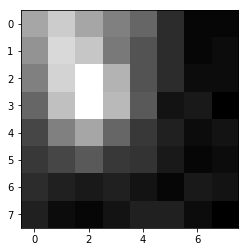

Spot reconstructed from gaussian fit parameters using sigma_min:


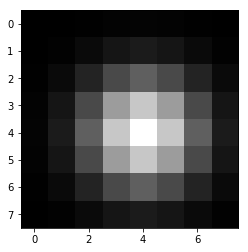

Spot reconstructed from gaussian fit parameters using sigma_max:


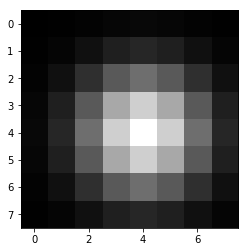

Original crop
[[44 50 44 38 34 25 19 19]
 [41 52 49 37 31 25 19 20]
 [38 51 58 46 31 25 20 20]
 [34 48 58 47 32 21 22 18]
 [29 38 44 34 27 23 20 21]
 [27 29 32 27 26 22 19 20]
 [25 23 22 23 21 19 22 21]
 [23 20 19 21 23 23 20 18]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  4  6  4  2  0]
 [ 0  2  8 16 21 16  8  2]
 [ 0  4 16 35 45 35 16  4]
 [ 1  6 21 45 58 45 21  6]
 [ 0  4 16 35 45 35 16  4]
 [ 0  2  8 16 21 16  8  2]
 [ 0  0  2  4  6  4  2  0]]
Reconstructed using sigma max
[[ 0  0  0  1  2  1  0  0]
 [ 0  1  3  7  8  7  3  1]
 [ 0  3 10 20 25 20 10  3]
 [ 1  7 20 38 47 38 20  7]
 [ 2  8 25 47 58 47 25  8]
 [ 1  7 20 38 47 38 20  7]
 [ 0  3 10 20 25 20 10  3]
 [ 0  1  3  7  8  7  3  1]]

---------------------------------------------------

x: 1744.1
y: 1594.6
sigma_min: 1.0125176850186666
sigma_max: 1.1791650668264206
height: 256.14136567643186
max_intensity: 255


Original crop around spot at (1744, 1594):


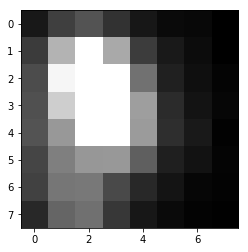

Spot reconstructed from gaussian fit parameters using sigma_min:


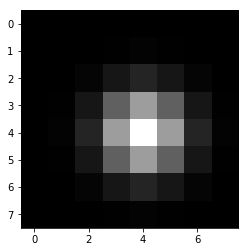

Spot reconstructed from gaussian fit parameters using sigma_max:


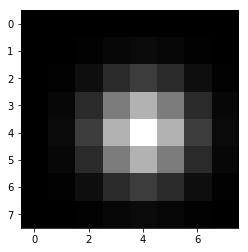

Original crop
[[ 64  96 113  86  63  53  51  44]
 [ 93 193 255 184  94  65  54  44]
 [107 247 255 255 138  72  57  48]
 [110 214 255 255 175  80  60  49]
 [113 170 255 255 172  82  65  46]
 [101 149 169 170 123  70  59  48]
 [ 98 142 143 105  77  61  49  47]
 [ 77 128 137  90  63  53  47  45]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   3   1   0   0]
 [  0   0   5  22  36  22   5   0]
 [  0   1  22  96 156  96  22   1]
 [  0   3  36 156 255 156  36   3]
 [  0   1  22  96 156  96  22   1]
 [  0   0   5  22  36  22   5   0]
 [  0   0   0   1   3   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6  10   6   2   0]
 [  0   2  14  42  60  42  14   2]
 [  0   6  42 124 177 124  42   6]
 [  0  10  60 177 255 177  60  10]
 [  0   6  42 124 177 124  42   6]
 [  0   2  14  42  60  42  14   2]
 [  0   0   2   6  10   6   2   0]]

---------------------------------------------------

x: 1761.9
y: 1612.4
sigma_min

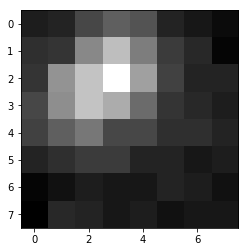

Spot reconstructed from gaussian fit parameters using sigma_min:


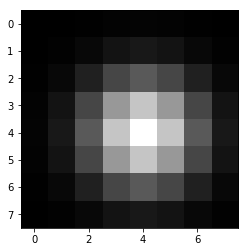

Spot reconstructed from gaussian fit parameters using sigma_max:


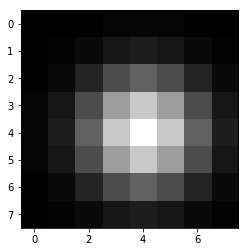

Original crop
[[26 27 33 37 35 27 25 23]
 [29 30 44 53 42 31 28 22]
 [30 46 54 64 48 32 27 27]
 [33 45 54 50 39 30 28 26]
 [32 37 41 33 33 29 29 27]
 [27 29 31 31 27 27 25 26]
 [22 24 26 25 25 27 26 24]
 [21 28 27 25 26 24 25 25]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  4  6  4  2  0]
 [ 0  2  8 17 22 17  8  2]
 [ 0  4 17 38 49 38 17  4]
 [ 1  6 22 49 64 49 22  6]
 [ 0  4 17 38 49 38 17  4]
 [ 0  2  8 17 22 17  8  2]
 [ 0  0  2  4  6  4  2  0]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  2  5  7  5  2  0]
 [ 0  2  9 19 24 19  9  2]
 [ 1  5 19 39 50 39 19  5]
 [ 1  7 24 50 64 50 24  7]
 [ 1  5 19 39 50 39 19  5]
 [ 0  2  9 19 24 19  9  2]
 [ 0  0  2  5  7  5  2  0]]

---------------------------------------------------

x: 1670.7
y: 1785.2
sigma_min: 1.0017152076513147
sigma_max: 1.0256139932780515
height: 215.46540587572093
max_intensity: 255


Original crop around spot at (1670, 1785):


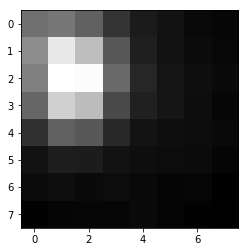

Spot reconstructed from gaussian fit parameters using sigma_min:


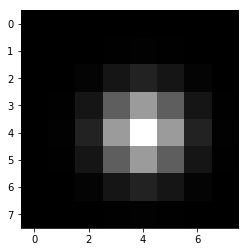

Spot reconstructed from gaussian fit parameters using sigma_max:


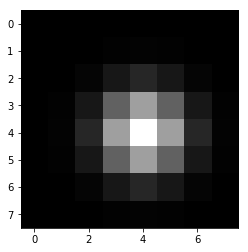

Original crop
[[129 135 117  76  54  46  38  36]
 [154 234 197 107  58  45  40  37]
 [143 255 252 123  64  48  43  39]
 [120 213 196  95  59  49  42  36]
 [ 73 116 108  66  47  44  41  38]
 [ 46  56  55  46  43  41  40  35]
 [ 40  43  39  41  38  35  36  30]
 [ 32  35  36  36  39  34  32  31]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  21  34  21   4   0]
 [  0   1  21  94 154  94  21   1]
 [  0   2  34 154 255 154  34   2]
 [  0   1  21  94 154  94  21   1]
 [  0   0   4  21  34  21   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  23  38  23   5   0]
 [  0   2  23  98 158  98  23   2]
 [  0   3  38 158 255 158  38   3]
 [  0   2  23  98 158  98  23   2]
 [  0   0   5  23  38  23   5   0]
 [  0   0   0   2   3   2   0   0]]

---------------------------------------------------

x: 1707.7
y: 1814.7
sigma_min

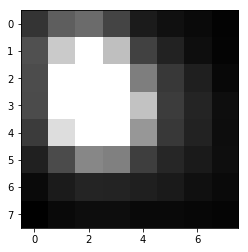

Spot reconstructed from gaussian fit parameters using sigma_min:


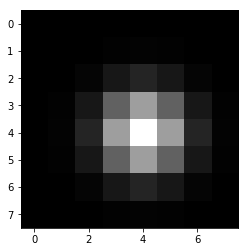

Spot reconstructed from gaussian fit parameters using sigma_max:


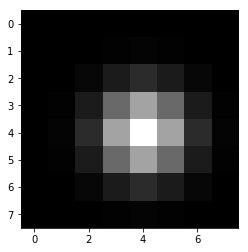

Original crop
[[ 86 120 131  98  64  55  50  44]
 [108 210 255 201  96  70  53  45]
 [105 255 255 255 147  88  67  48]
 [104 255 255 255 204  92  72  53]
 [ 91 226 255 255 168  89  70  52]
 [ 69 104 154 148  93  73  63  53]
 [ 50  64  72  71  67  63  55  50]
 [ 41  49  52  52  49  49  47  46]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  23  37  23   5   0]
 [  0   2  23  97 157  97  23   2]
 [  0   3  37 157 255 157  37   3]
 [  0   2  23  97 157  97  23   2]
 [  0   0   5  23  37  23   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   7  27  42  27   7   0]
 [  0   2  27 104 163 104  27   2]
 [  0   4  42 163 255 163  42   4]
 [  0   2  27 104 163 104  27   2]
 [  0   0   7  27  42  27   7   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 1853.8
y: 1718.7
sigma_min

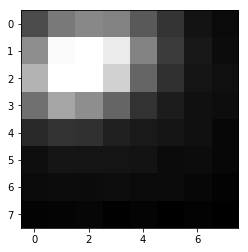

Spot reconstructed from gaussian fit parameters using sigma_min:


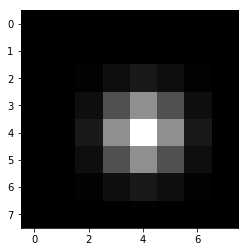

Spot reconstructed from gaussian fit parameters using sigma_max:


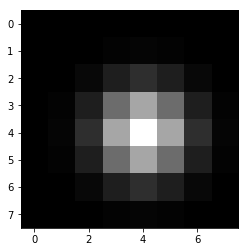

Original crop
[[ 94 136 149 143 107  74  44  36]
 [154 250 255 237 144  80  49  38]
 [187 255 255 214 117  71  45  41]
 [127 174 154 117  72  52  42  39]
 [ 63  72  70  57  50  46  42  34]
 [ 40  46  45  45  44  37  38  34]
 [ 36  38  37  39  36  37  34  30]
 [ 30  31  33  28  31  27  30  27]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  14  25  14   2   0]
 [  0   0  14  80 143  80  14   0]
 [  0   1  25 143 255 143  25   1]
 [  0   0  14  80 143  80  14   0]
 [  0   0   2  14  25  14   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   3   5   3   0   0]
 [  0   0   8  29  45  29   8   0]
 [  0   3  29 108 166 108  29   3]
 [  0   5  45 166 255 166  45   5]
 [  0   3  29 108 166 108  29   3]
 [  0   0   8  29  45  29   8   0]
 [  0   0   0   3   5   3   0   0]]

---------------------------------------------------

x: 1651.5
y: 1949.7
sigma_min

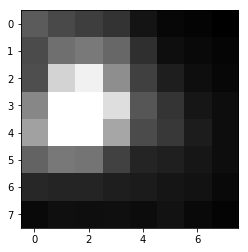

Spot reconstructed from gaussian fit parameters using sigma_min:


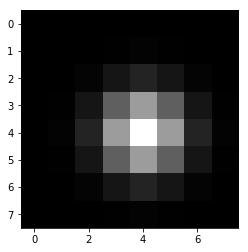

Spot reconstructed from gaussian fit parameters using sigma_max:


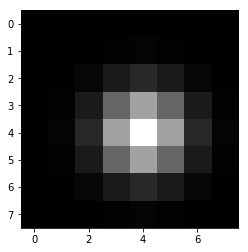

Original crop
[[109  94  83  74  46  35  32  28]
 [ 95 127 136 120  70  41  36  33]
 [ 98 216 242 154  85  55  41  35]
 [148 255 255 225 105  75  48  40]
 [171 255 255 176  95  78  53  40]
 [116 135 131  86  61  56  48  40]
 [ 63  60  60  55  52  47  44  36]
 [ 36  42  41  42  39  44  36  32]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   3   1   0   0]
 [  0   0   4  21  35  21   4   0]
 [  0   1  21  95 155  95  21   1]
 [  0   3  35 155 255 155  35   3]
 [  0   1  21  95 155  95  21   1]
 [  0   0   4  21  35  21   4   0]
 [  0   0   0   1   3   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   6  25  40  25   6   0]
 [  0   2  25 102 161 102  25   2]
 [  0   4  40 161 255 161  40   4]
 [  0   2  25 102 161 102  25   2]
 [  0   0   6  25  40  25   6   0]
 [  0   0   0   2   4   2   0   0]]

---------------------------------------------------

x: 1718.7
y: 1985.4
sigma_min

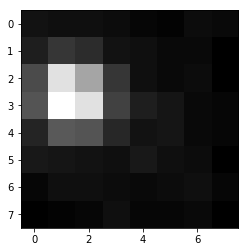

Spot reconstructed from gaussian fit parameters using sigma_min:


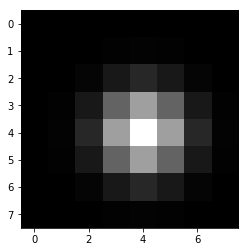

Spot reconstructed from gaussian fit parameters using sigma_max:


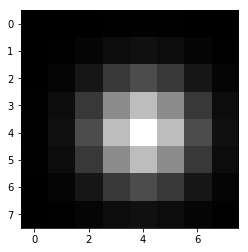

Original crop
[[ 21  20  20  19  17  16  19  18]
 [ 25  33  30  21  20  18  18  15]
 [ 40  90  70  33  20  18  19  15]
 [ 43 100  90  37  25  22  18  17]
 [ 27  45  43  28  21  22  18  17]
 [ 23  22  21  20  23  20  19  15]
 [ 17  20  20  19  18  19  20  17]
 [ 15  16  17  20  17  17  18  15]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   9  39  62  39   9   0]
 [  0   1  15  62 100  62  15   1]
 [  0   0   9  39  62  39   9   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   8  22  29  22   8   1]
 [  0   4  22  54  73  54  22   4]
 [  0   6  29  73 100  73  29   6]
 [  0   4  22  54  73  54  22   4]
 [  0   1   8  22  29  22   8   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 1695.4
y: 2034.8
sigma_min

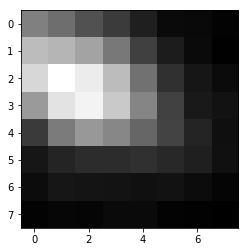

Spot reconstructed from gaussian fit parameters using sigma_min:


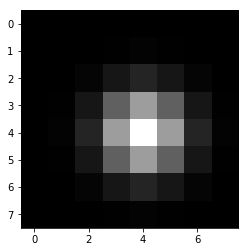

Spot reconstructed from gaussian fit parameters using sigma_max:


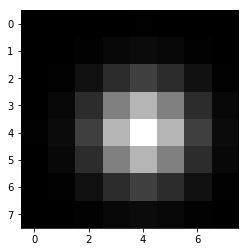

Original crop
[[127 113  91  74  52  36  35  31]
 [173 168 154 121  78  50  36  29]
 [194 225 210 173 115  66  45  37]
 [147 203 215 183 131  79  48  42]
 [ 73 123 145 132 107  80  57  40]
 [ 45  57  62  62  65  60  52  41]
 [ 38  45  44  43  41  42  38  32]
 [ 31  33  32  36  36  31  30  28]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  19  31  19   4   0]
 [  0   1  19  84 138  84  19   1]
 [  0   2  31 138 225 138  31   2]
 [  0   1  19  84 138  84  19   1]
 [  0   0   4  19  31  19   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   7  10   7   2   0]
 [  0   2  14  40  56  40  14   2]
 [  0   7  40 112 159 112  40   7]
 [  0  10  56 159 225 159  56  10]
 [  0   7  40 112 159 112  40   7]
 [  0   2  14  40  56  40  14   2]
 [  0   0   2   7  10   7   2   0]]

---------------------------------------------------

x: 173.27
y: 192.32
sigma_min

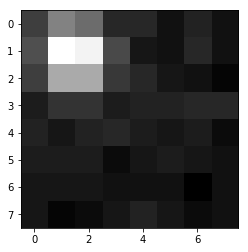

Spot reconstructed from gaussian fit parameters using sigma_min:


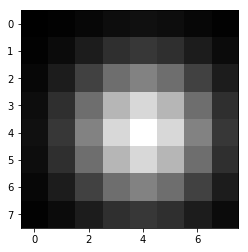

Spot reconstructed from gaussian fit parameters using sigma_max:


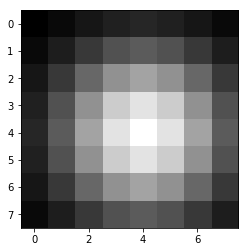

Original crop
[[24 36 32 20 20 16 19 16]
 [27 58 56 26 17 16 20 16]
 [24 43 43 23 20 17 16 14]
 [18 22 22 18 19 19 20 20]
 [19 17 19 20 18 17 18 15]
 [18 18 18 15 17 18 17 16]
 [17 17 17 16 16 16 13 16]
 [17 14 15 17 19 17 15 16]]
Reconstructed using sigma min
[[ 0  0  2  3  4  3  2  0]
 [ 0  2  6 10 12 10  6  2]
 [ 2  6 15 25 29 25 15  6]
 [ 3 10 25 41 49 41 25 10]
 [ 4 12 29 49 58 49 29 12]
 [ 3 10 25 41 49 41 25 10]
 [ 2  6 15 25 29 25 15  6]
 [ 0  2  6 10 12 10  6  2]]
Reconstructed using sigma max
[[ 1  3  6  9 10  9  6  3]
 [ 3  8 14 19 21 19 14  8]
 [ 6 14 24 33 37 33 24 14]
 [ 9 19 33 46 52 46 33 19]
 [10 21 37 52 58 52 37 21]
 [ 9 19 33 46 52 46 33 19]
 [ 6 14 24 33 37 33 24 14]
 [ 3  8 14 19 21 19 14  8]]

---------------------------------------------------

x: 902.42
y: 345.44
sigma_min: 1.6270582820361261
sigma_max: 1.642239559471606
height: 42.507330584292255
max_intensity: 55


Original crop around spot at (902, 345):


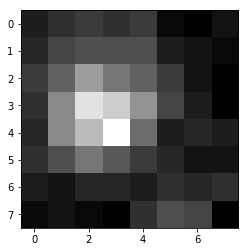

Spot reconstructed from gaussian fit parameters using sigma_min:


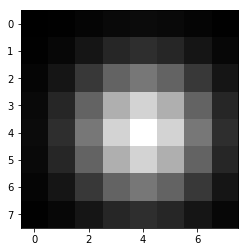

Spot reconstructed from gaussian fit parameters using sigma_max:


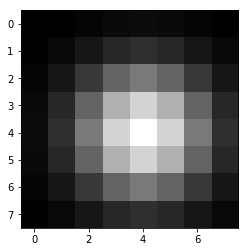

Original crop
[[32 34 35 34 35 30 29 31]
 [33 36 37 37 37 32 31 30]
 [35 39 45 41 39 35 31 29]
 [34 43 52 50 44 36 32 29]
 [33 43 48 55 40 32 33 32]
 [34 37 41 38 35 33 31 31]
 [32 31 33 33 32 34 33 34]
 [30 31 30 29 34 37 36 29]]
Reconstructed using sigma min
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  4  8 10  8  4  1]
 [ 1  4 12 21 25 21 12  4]
 [ 2  8 21 37 45 37 21  8]
 [ 2 10 25 45 55 45 25 10]
 [ 2  8 21 37 45 37 21  8]
 [ 1  4 12 21 25 21 12  4]
 [ 0  1  4  8 10  8  4  1]]
Reconstructed using sigma max
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  4  8 10  8  4  1]
 [ 1  4 12 21 26 21 12  4]
 [ 2  8 21 37 45 37 21  8]
 [ 2 10 26 45 55 45 26 10]
 [ 2  8 21 37 45 37 21  8]
 [ 1  4 12 21 26 21 12  4]
 [ 0  1  4  8 10  8  4  1]]

---------------------------------------------------

x: 1728.9
y: 228.02
sigma_min: 1.5331207951332955
sigma_max: 3.122545260510605
height: 67.54231438015127
max_intensity: 65


Original crop around spot at (1728, 228):


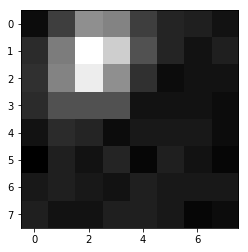

Spot reconstructed from gaussian fit parameters using sigma_min:


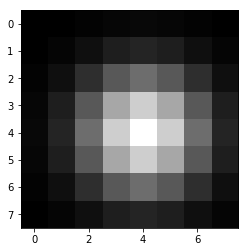

Spot reconstructed from gaussian fit parameters using sigma_max:


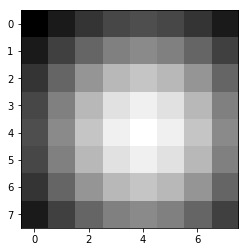

Original crop
[[26 34 47 45 34 30 29 27]
 [31 44 65 57 37 30 27 29]
 [32 45 62 47 32 26 27 27]
 [31 37 37 37 27 27 27 26]
 [27 31 30 26 28 28 28 26]
 [24 29 27 30 25 29 27 25]
 [28 29 28 27 29 28 28 28]
 [29 27 27 29 29 28 25 26]]
Reconstructed using sigma min
[[ 0  0  0  1  2  1  0  0]
 [ 0  1  4  7  9  7  4  1]
 [ 0  4 11 22 27 22 11  4]
 [ 1  7 22 42 52 42 22  7]
 [ 2  9 27 52 65 52 27  9]
 [ 1  7 22 42 52 42 22  7]
 [ 0  4 11 22 27 22 11  4]
 [ 0  1  4  7  9  7  4  1]]
Reconstructed using sigma max
[[12 18 23 27 28 27 23 18]
 [18 25 33 38 40 38 33 25]
 [23 33 43 50 52 50 43 33]
 [27 38 50 58 61 58 50 38]
 [28 40 52 61 65 61 52 40]
 [27 38 50 58 61 58 50 38]
 [23 33 43 50 52 50 43 33]
 [18 25 33 38 40 38 33 25]]

---------------------------------------------------

x: 1704.3
y: 222.47
sigma_min: 1.9685612730290685
sigma_max: 5.874793380811013
height: 18725.236361456933
max_intensity: 51


Original crop around spot at (1704, 222):


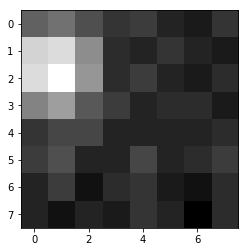

Spot reconstructed from gaussian fit parameters using sigma_min:


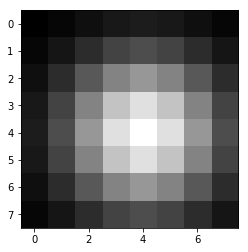

Spot reconstructed from gaussian fit parameters using sigma_max:


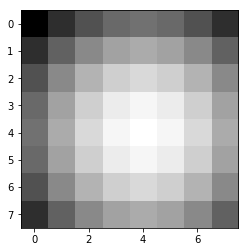

Original crop
[[33 35 31 28 29 26 25 28]
 [46 47 38 27 26 28 26 25]
 [47 51 39 27 29 26 25 27]
 [37 40 32 29 26 27 27 25]
 [28 30 30 26 26 26 26 27]
 [29 31 26 26 30 26 27 29]
 [26 29 24 27 28 25 24 27]
 [26 24 26 25 28 26 22 27]]
Reconstructed using sigma min
[[ 0  2  3  5  6  5  3  2]
 [ 2  4  9 14 15 14  9  4]
 [ 3  9 18 26 30 26 18  9]
 [ 5 14 26 39 44 39 26 14]
 [ 6 15 30 44 51 44 30 15]
 [ 5 14 26 39 44 39 26 14]
 [ 3  9 18 26 30 26 18  9]
 [ 2  4  9 14 15 14  9  4]]
Reconstructed using sigma max
[[32 35 38 39 40 39 38 35]
 [35 39 42 44 44 44 42 39]
 [38 42 45 47 48 47 45 42]
 [39 44 47 49 50 49 47 44]
 [40 44 48 50 51 50 48 44]
 [39 44 47 49 50 49 47 44]
 [38 42 45 47 48 47 45 42]
 [35 39 42 44 44 44 42 39]]

---------------------------------------------------

x: 1698.7
y: 217.71
sigma_min: 2.3285561967093704
sigma_max: 28.148162436692797
height: 73.02713713701255
max_intensity: 52


Original crop around spot at (1698, 217):


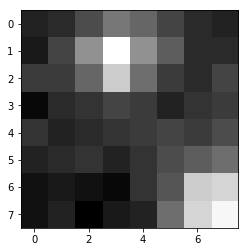

Spot reconstructed from gaussian fit parameters using sigma_min:


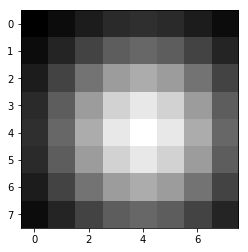

Spot reconstructed from gaussian fit parameters using sigma_max:


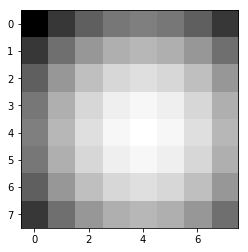

Original crop
[[26 27 31 36 34 30 27 26]
 [25 30 39 52 39 33 27 27]
 [29 29 34 46 35 29 27 30]
 [23 27 28 30 29 26 28 29]
 [28 26 27 28 29 30 29 31]
 [26 27 28 26 28 31 33 35]
 [24 25 24 23 28 32 46 47]
 [24 26 22 25 26 35 47 51]]
Reconstructed using sigma min
[[ 2  5  8 10 11 10  8  5]
 [ 5  9 15 20 22 20 15  9]
 [ 8 15 24 32 35 32 24 15]
 [10 20 32 43 47 43 32 20]
 [11 22 35 47 52 47 35 22]
 [10 20 32 43 47 43 32 20]
 [ 8 15 24 32 35 32 24 15]
 [ 5  9 15 20 22 20 15  9]]
Reconstructed using sigma max
[[50 51 51 51 51 51 51 51]
 [51 51 51 51 51 51 51 51]
 [51 51 51 51 51 51 51 51]
 [51 51 51 51 51 51 51 51]
 [51 51 51 51 52 51 51 51]
 [51 51 51 51 51 51 51 51]
 [51 51 51 51 51 51 51 51]
 [51 51 51 51 51 51 51 51]]

---------------------------------------------------

x: 1675.7
y: 258.96
sigma_min: 1.7020764294269033
sigma_max: 5.270897223255205
height: 5993.355394819177
max_intensity: 54


Original crop around spot at (1675, 258):


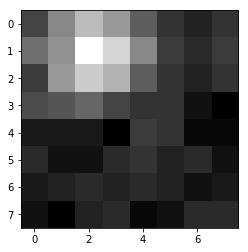

Spot reconstructed from gaussian fit parameters using sigma_min:


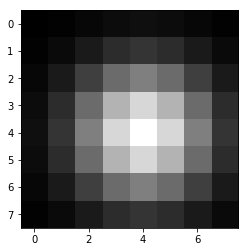

Spot reconstructed from gaussian fit parameters using sigma_max:


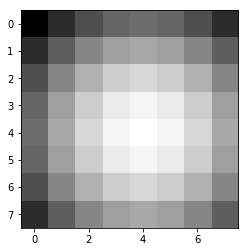

Original crop
[[32 40 46 42 35 30 28 30]
 [37 41 54 49 40 31 29 31]
 [31 42 48 45 35 30 28 30]
 [33 34 36 32 30 30 26 24]
 [27 27 27 24 31 30 25 25]
 [29 26 26 29 30 28 29 26]
 [27 28 29 28 29 28 26 27]
 [26 24 28 29 25 26 29 29]]
Reconstructed using sigma min
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  5  9 11  9  5  2]
 [ 1  5 13 22 27 22 13  5]
 [ 2  9 22 38 45 38 22  9]
 [ 3 11 27 45 54 45 27 11]
 [ 2  9 22 38 45 38 22  9]
 [ 1  5 13 22 27 22 13  5]
 [ 0  2  5  9 11  9  5  2]]
Reconstructed using sigma max
[[30 34 37 39 40 39 37 34]
 [34 39 42 45 45 45 42 39]
 [37 42 46 49 50 49 46 42]
 [39 45 49 52 53 52 49 45]
 [40 45 50 53 54 53 50 45]
 [39 45 49 52 53 52 49 45]
 [37 42 46 49 50 49 46 42]
 [34 39 42 45 45 45 42 39]]

---------------------------------------------------

x: 1767.7
y: 186.76
sigma_min: 1.3329183453223907
sigma_max: 1.340838451942721
height: 63.77939141121187
max_intensity: 125


Original crop around spot at (1767, 186):


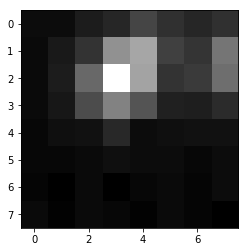

Spot reconstructed from gaussian fit parameters using sigma_min:


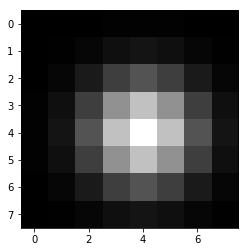

Spot reconstructed from gaussian fit parameters using sigma_max:


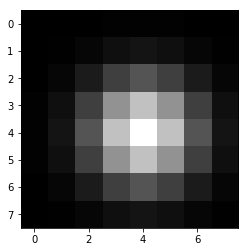

Original crop
[[ 30  30  36  40  52  44  40  44]
 [ 29  35  45  82  90  50  46  71]
 [ 29  36  66 125  89  45  48  68]
 [ 29  34  55  76  58  38  37  42]
 [ 28  31  32  41  30  31  32  32]
 [ 28  28  29  31  30  30  28  30]
 [ 27  25  29  25  28  29  27  30]
 [ 29  26  29  28  26  29  27  25]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   7   9   7   3   0]
 [  0   3  13  30  40  30  13   3]
 [  1   7  30  71  94  71  30   7]
 [  1   9  40  94 125  94  40   9]
 [  1   7  30  71  94  71  30   7]
 [  0   3  13  30  40  30  13   3]
 [  0   0   3   7   9   7   3   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   7  10   7   3   0]
 [  0   3  13  31  41  31  13   3]
 [  1   7  31  71  94  71  31   7]
 [  1  10  41  94 125  94  41  10]
 [  1   7  31  71  94  71  31   7]
 [  0   3  13  31  41  31  13   3]
 [  0   0   3   7  10   7   3   0]]

---------------------------------------------------

x: 1774.9
y: 186.76
sigma_min

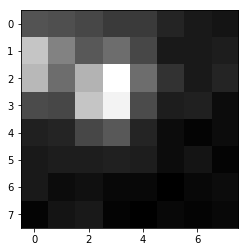

Spot reconstructed from gaussian fit parameters using sigma_min:


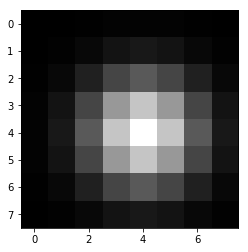

Spot reconstructed from gaussian fit parameters using sigma_max:


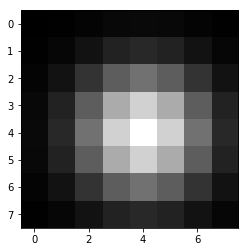

Original crop
[[44 43 41 38 38 33 30 29]
 [71 55 45 50 41 30 30 31]
 [68 50 67 85 50 36 30 33]
 [42 41 71 82 42 31 32 27]
 [32 33 41 45 33 27 25 27]
 [30 31 31 32 31 27 29 25]
 [30 27 28 26 26 24 26 27]
 [25 29 30 25 24 26 25 26]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  2  6  8  6  2  0]
 [ 0  2 10 23 30 23 10  2]
 [ 1  6 23 50 65 50 23  6]
 [ 1  8 30 65 85 65 30  8]
 [ 1  6 23 50 65 50 23  6]
 [ 0  2 10 23 30 23 10  2]
 [ 0  0  2  6  8  6  2  0]]
Reconstructed using sigma max
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  6 11 13 11  6  2]
 [ 1  6 17 31 38 31 17  6]
 [ 2 11 31 56 69 56 31 11]
 [ 3 13 38 69 85 69 38 13]
 [ 2 11 31 56 69 56 31 11]
 [ 1  6 17 31 38 31 17  6]
 [ 0  2  6 11 13 11  6  2]]

---------------------------------------------------

x: 1816.1
y: 140.74
sigma_min: 1.8274167686756349
sigma_max: 2.3446699916315454
height: 36.37609410856405
max_intensity: 51


Original crop around spot at (1816, 140):


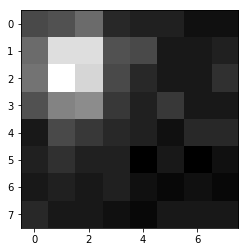

Spot reconstructed from gaussian fit parameters using sigma_min:


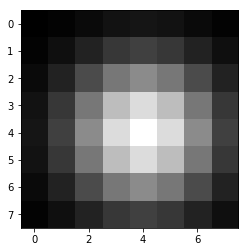

Spot reconstructed from gaussian fit parameters using sigma_max:


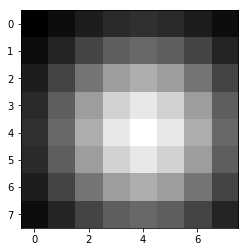

Original crop
[[29 30 33 25 24 24 22 22]
 [33 47 47 30 29 23 23 24]
 [34 51 46 29 25 23 23 26]
 [30 36 37 27 24 27 23 23]
 [23 29 27 25 24 22 25 25]
 [24 26 24 24 20 23 20 22]
 [23 24 23 24 22 21 22 21]
 [25 23 23 22 21 23 23 23]]
Reconstructed using sigma min
[[ 0  1  2  4  4  4  2  1]
 [ 1  3  7 11 13 11  7  3]
 [ 2  7 15 24 28 24 15  7]
 [ 4 11 24 37 43 37 24 11]
 [ 4 13 28 43 51 43 28 13]
 [ 4 11 24 37 43 37 24 11]
 [ 2  7 15 24 28 24 15  7]
 [ 1  3  7 11 13 11  7  3]]
Reconstructed using sigma max
[[ 2  5  8 10 11 10  8  5]
 [ 5  9 15 20 22 20 15  9]
 [ 8 15 24 32 35 32 24 15]
 [10 20 32 42 46 42 32 20]
 [11 22 35 46 51 46 35 22]
 [10 20 32 42 46 42 32 20]
 [ 8 15 24 32 35 32 24 15]
 [ 5  9 15 20 22 20 15  9]]

---------------------------------------------------

x: 1842.3
y: 120.12
sigma_min: 1.866294891471328
sigma_max: 2.029837566378046
height: 28.847667261653886
max_intensity: 44


Original crop around spot at (1842, 120):


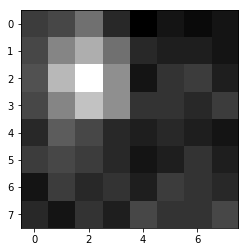

Spot reconstructed from gaussian fit parameters using sigma_min:


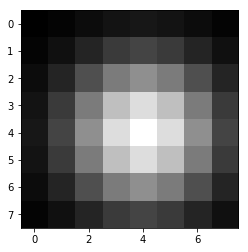

Spot reconstructed from gaussian fit parameters using sigma_max:


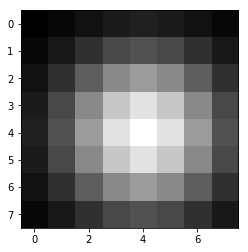

Original crop
[[25 26 30 23 19 21 20 21]
 [26 32 36 30 23 22 22 21]
 [27 37 44 33 21 24 25 22]
 [26 32 38 33 24 24 23 25]
 [23 28 26 23 22 23 22 21]
 [25 26 25 23 21 22 24 22]
 [21 25 23 24 22 25 24 23]
 [23 21 24 22 26 24 24 26]]
Reconstructed using sigma min
[[ 0  1  2  3  4  3  2  1]
 [ 1  3  6 10 12 10  6  3]
 [ 2  6 13 21 24 21 13  6]
 [ 3 10 21 33 38 33 21 10]
 [ 4 12 24 38 44 38 24 12]
 [ 3 10 21 33 38 33 21 10]
 [ 2  6 13 21 24 21 13  6]
 [ 1  3  6 10 12 10  6  3]]
Reconstructed using sigma max
[[ 0  2  3  5  6  5  3  2]
 [ 2  4  9 13 14 13  9  4]
 [ 3  9 16 23 27 23 16  9]
 [ 5 13 23 34 38 34 23 13]
 [ 6 14 27 38 44 38 27 14]
 [ 5 13 23 34 38 34 23 13]
 [ 3  9 16 23 27 23 16  9]
 [ 2  4  9 13 14 13  9  4]]

---------------------------------------------------

x: 1961.3
y: 199.46
sigma_min: 1.4581553208804503
sigma_max: 1.6422494332436717
height: 54.69736198073373
max_intensity: 93


Original crop around spot at (1961, 199):


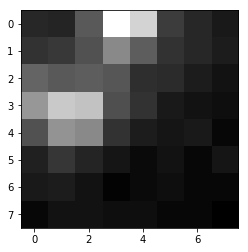

Spot reconstructed from gaussian fit parameters using sigma_min:


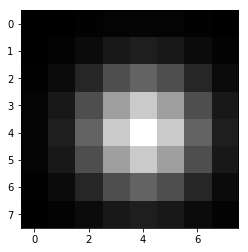

Spot reconstructed from gaussian fit parameters using sigma_max:


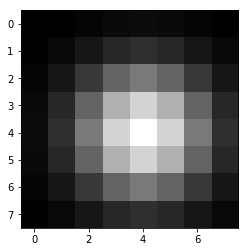

Original crop
[[33 32 47 93 81 39 33 29]
 [36 38 45 60 48 36 33 30]
 [50 47 48 46 35 34 30 27]
 [64 78 76 44 36 29 27 26]
 [45 63 60 36 30 28 29 24]
 [31 37 32 28 25 27 24 28]
 [29 30 27 23 25 26 24 24]
 [24 27 27 26 26 24 24 22]]
Reconstructed using sigma min
[[ 0  0  0  1  2  1  0  0]
 [ 0  1  4  8 11  8  4  1]
 [ 0  4 14 28 36 28 14  4]
 [ 1  8 28 58 73 58 28  8]
 [ 2 11 36 73 93 73 36 11]
 [ 1  8 28 58 73 58 28  8]
 [ 0  4 14 28 36 28 14  4]
 [ 0  1  4  8 11  8  4  1]]
Reconstructed using sigma max
[[ 0  0  2  3  4  3  2  0]
 [ 0  3  8 14 17 14  8  3]
 [ 2  8 21 36 44 36 21  8]
 [ 3 14 36 64 77 64 36 14]
 [ 4 17 44 77 93 77 44 17]
 [ 3 14 36 64 77 64 36 14]
 [ 2  8 21 36 44 36 21  8]
 [ 0  3  8 14 17 14  8  3]]

---------------------------------------------------

x: 2036.7
y: 356.55
sigma_min: 1.0401097411246425
sigma_max: 1.4511931243160794
height: 107.96337610866959
max_intensity: 160


Original crop around spot at (2036, 356):


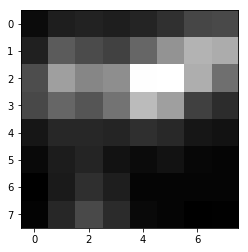

Spot reconstructed from gaussian fit parameters using sigma_min:


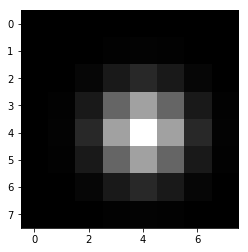

Spot reconstructed from gaussian fit parameters using sigma_max:


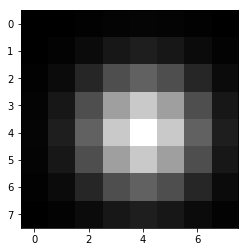

Original crop
[[ 31  41  43  41  44  51  62  64]
 [ 42  73  65  60  79 103 120 116]
 [ 66 109  96 100 159 160 117  84]
 [ 63  79  70  86 124 109  59  49]
 [ 37  46  46  45  50  47  37  35]
 [ 30  40  44  35  31  35  29  28]
 [ 25  39  50  41  28  28  28  28]
 [ 27  46  64  48  30  28  25  26]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  15  25  15   3   0]
 [  0   1  15  63 100  63  15   1]
 [  0   2  25 100 160 100  25   2]
 [  0   1  15  63 100  63  15   1]
 [  0   0   3  15  25  15   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   1   2   3   2   1   0]
 [  0   2   7  14  18  14   7   2]
 [  1   7  23  48  61  48  23   7]
 [  2  14  48  99 126  99  48  14]
 [  3  18  61 126 160 126  61  18]
 [  2  14  48  99 126  99  48  14]
 [  1   7  23  48  61  48  23   7]
 [  0   2   7  14  18  14   7   2]]

---------------------------------------------------

x: 54.262
y: 848.47
sigma_min

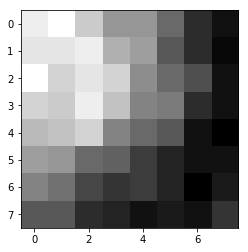

Spot reconstructed from gaussian fit parameters using sigma_min:


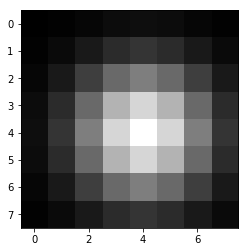

Spot reconstructed from gaussian fit parameters using sigma_max:


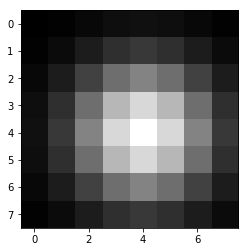

Original crop
[[44 46 40 34 34 29 22 19]
 [43 43 44 37 35 27 22 18]
 [46 41 43 41 33 29 26 19]
 [41 40 44 39 32 31 22 19]
 [38 39 41 32 29 27 19 17]
 [35 34 29 28 24 21 19 19]
 [32 30 25 23 24 21 17 20]
 [27 27 22 21 19 20 19 23]]
Reconstructed using sigma min
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  4  8  9  8  4  1]
 [ 1  4 11 19 22 19 11  4]
 [ 2  8 19 32 38 32 19  8]
 [ 2  9 22 38 46 38 22  9]
 [ 2  8 19 32 38 32 19  8]
 [ 1  4 11 19 22 19 11  4]
 [ 0  1  4  8  9  8  4  1]]
Reconstructed using sigma max
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  5  8 10  8  5  2]
 [ 1  5 12 20 23 20 12  5]
 [ 2  8 20 33 38 33 20  8]
 [ 3 10 23 38 46 38 23 10]
 [ 2  8 20 33 38 33 20  8]
 [ 1  5 12 20 23 20 12  5]
 [ 0  2  5  8 10  8  5  2]]

---------------------------------------------------

x: 73.304
y: 950.82
sigma_min: 1.4196143605342968
sigma_max: 1.748012378314881
height: 34.3249779178008
max_intensity: 59


Original crop around spot at (73, 950):


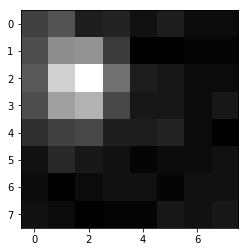

Spot reconstructed from gaussian fit parameters using sigma_min:


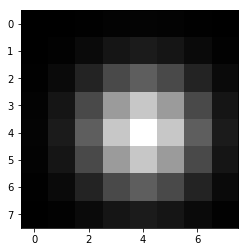

Spot reconstructed from gaussian fit parameters using sigma_max:


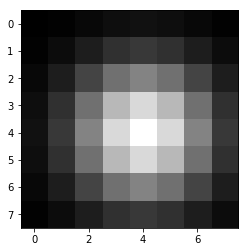

Original crop
[[27 30 21 22 19 21 18 18]
 [29 40 41 26 16 16 17 17]
 [31 51 59 35 21 20 18 18]
 [29 43 46 28 20 20 18 20]
 [24 27 28 21 21 22 18 16]
 [19 23 20 19 17 18 18 19]
 [18 16 18 19 19 17 19 19]
 [19 18 16 17 17 20 19 20]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  4  6  4  2  0]
 [ 0  2  8 17 21 17  8  2]
 [ 0  4 17 35 46 35 17  4]
 [ 1  6 21 46 59 46 21  6]
 [ 0  4 17 35 46 35 17  4]
 [ 0  2  8 17 21 17  8  2]
 [ 0  0  2  4  6  4  2  0]]
Reconstructed using sigma max
[[ 0  0  2  3  4  3  2  0]
 [ 0  3  7 11 13 11  7  3]
 [ 2  7 15 26 30 26 15  7]
 [ 3 11 26 42 50 42 26 11]
 [ 4 13 30 50 59 50 30 13]
 [ 3 11 26 42 50 42 26 11]
 [ 2  7 15 26 30 26 15  7]
 [ 0  3  7 11 13 11  7  3]]

---------------------------------------------------

x: 1225.3
y: 1403.1
sigma_min: 3.1548769584474576
sigma_max: 11.106037852071925
height: 1956.7316778442698
max_intensity: 45


Original crop around spot at (1225, 1403):


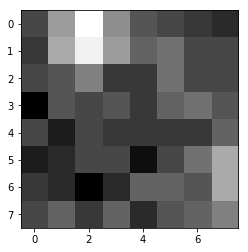

Spot reconstructed from gaussian fit parameters using sigma_min:


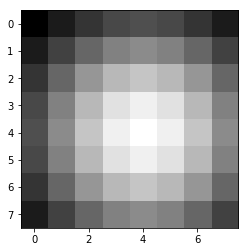

Spot reconstructed from gaussian fit parameters using sigma_max:


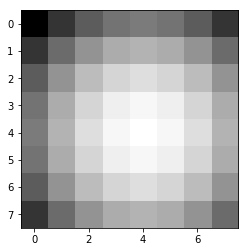

Original crop
[[32 38 45 37 33 32 31 30]
 [31 39 44 38 34 35 32 32]
 [32 33 36 31 31 35 32 32]
 [27 33 32 33 31 34 35 33]
 [32 29 32 31 31 31 31 34]
 [29 30 32 32 28 32 35 39]
 [31 30 27 30 34 34 33 39]
 [32 34 31 34 30 33 34 36]]
Reconstructed using sigma min
[[ 9 12 16 19 20 19 16 12]
 [12 18 23 27 28 27 23 18]
 [16 23 30 35 36 35 30 23]
 [19 27 35 40 42 40 35 27]
 [20 28 36 42 45 42 36 28]
 [19 27 35 40 42 40 35 27]
 [16 23 30 35 36 35 30 23]
 [12 18 23 27 28 27 23 18]]
Reconstructed using sigma max
[[39 40 41 42 42 42 41 40]
 [40 41 42 43 43 43 42 41]
 [41 42 43 44 44 44 43 42]
 [42 43 44 44 44 44 44 43]
 [42 43 44 44 45 44 44 43]
 [42 43 44 44 44 44 44 43]
 [41 42 43 44 44 44 43 42]
 [40 41 42 43 43 43 42 41]]

---------------------------------------------------

x: 1232.5
y: 1408.6
sigma_min: 1.5069171734244304
sigma_max: 1.7687851319399521
height: 47.342774117901875
max_intensity: 75


Original crop around spot at (1232, 1408):


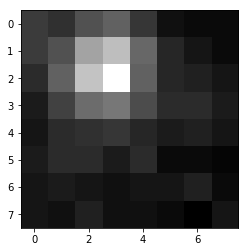

Spot reconstructed from gaussian fit parameters using sigma_min:


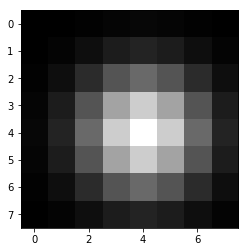

Spot reconstructed from gaussian fit parameters using sigma_max:


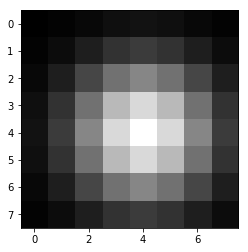

Original crop
[[39 37 43 46 38 31 30 30]
 [39 43 58 63 47 35 32 30]
 [36 46 64 75 46 35 34 32]
 [33 40 48 50 42 36 36 33]
 [32 36 37 38 35 33 34 32]
 [33 36 36 33 36 30 30 29]
 [32 33 32 31 32 32 34 30]
 [32 31 34 31 31 30 28 32]]
Reconstructed using sigma min
[[ 0  0  0  1  2  1  0  0]
 [ 0  1  4  8 10  8  4  1]
 [ 0  4 12 24 31 24 12  4]
 [ 1  8 24 48 60 48 24  8]
 [ 2 10 31 60 75 60 31 10]
 [ 1  8 24 48 60 48 24  8]
 [ 0  4 12 24 31 24 12  4]
 [ 0  1  4  8 10  8  4  1]]
Reconstructed using sigma max
[[ 0  1  3  4  5  4  3  1]
 [ 1  4  9 15 17 15  9  4]
 [ 3  9 20 33 39 33 20  9]
 [ 4 15 33 54 63 54 33 15]
 [ 5 17 39 63 75 63 39 17]
 [ 4 15 33 54 63 54 33 15]
 [ 3  9 20 33 39 33 20  9]
 [ 1  4  9 15 17 15  9  4]]

---------------------------------------------------

x: 1226.1
y: 1415.8
sigma_min: 1.6161059947541039
sigma_max: 2.0229726874000256
height: 45.55624872516039
max_intensity: 62


Original crop around spot at (1226, 1415):


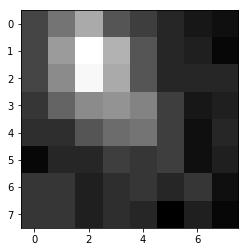

Spot reconstructed from gaussian fit parameters using sigma_min:


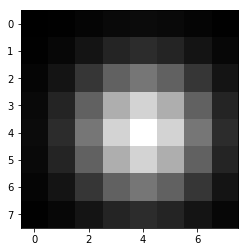

Spot reconstructed from gaussian fit parameters using sigma_max:


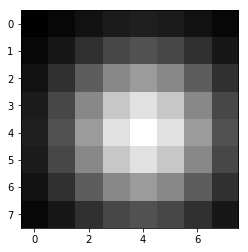

Original crop
[[38 44 51 40 37 34 32 31]
 [38 49 62 52 40 34 33 30]
 [38 47 61 51 40 34 34 34]
 [36 42 47 48 46 37 32 33]
 [35 35 40 43 44 37 31 34]
 [30 34 34 37 36 37 31 33]
 [36 36 33 35 36 34 36 31]
 [36 36 33 35 34 29 33 30]]
Reconstructed using sigma min
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  5  9 11  9  5  1]
 [ 1  5 13 23 28 23 13  5]
 [ 2  9 23 42 51 42 23  9]
 [ 2 11 28 51 62 51 28 11]
 [ 2  9 23 42 51 42 23  9]
 [ 1  5 13 23 28 23 13  5]
 [ 0  1  5  9 11  9  5  1]]
Reconstructed using sigma max
[[ 1  2  5  7  8  7  5  2]
 [ 2  6 12 18 20 18 12  6]
 [ 5 12 23 33 38 33 23 12]
 [ 7 18 33 48 54 48 33 18]
 [ 8 20 38 54 62 54 38 20]
 [ 7 18 33 48 54 48 33 18]
 [ 5 12 23 33 38 33 23 12]
 [ 2  6 12 18 20 18 12  6]]

---------------------------------------------------

x: 1144.4
y: 1402.3
sigma_min: 1.6455871002418159
sigma_max: 5.708290595355711
height: 4259.497099670032
max_intensity: 66


Original crop around spot at (1144, 1402):


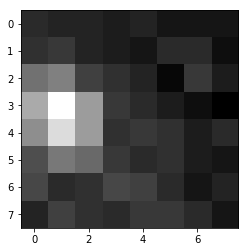

Spot reconstructed from gaussian fit parameters using sigma_min:


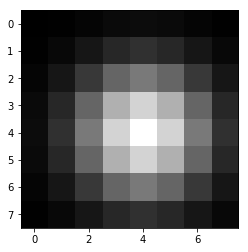

Spot reconstructed from gaussian fit parameters using sigma_max:


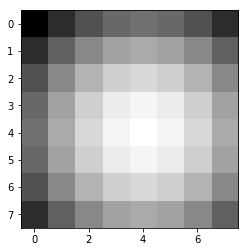

Original crop
[[36 35 35 34 35 33 33 33]
 [37 38 35 34 33 36 36 32]
 [46 48 39 37 35 31 38 34]
 [54 66 52 38 36 34 32 30]
 [50 61 52 37 38 37 34 36]
 [41 47 45 38 36 37 34 33]
 [40 36 37 40 39 36 33 35]
 [35 39 37 36 38 38 36 33]]
Reconstructed using sigma min
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  5 10 12 10  5  2]
 [ 1  5 15 26 31 26 15  5]
 [ 2 10 26 45 54 45 26 10]
 [ 3 12 31 54 66 54 31 12]
 [ 2 10 26 45 54 45 26 10]
 [ 1  5 15 26 31 26 15  5]
 [ 0  2  5 10 12 10  5  2]]
Reconstructed using sigma max
[[40 44 48 50 51 50 48 44]
 [44 50 54 56 57 56 54 50]
 [48 54 58 61 62 61 58 54]
 [50 56 61 64 64 64 61 56]
 [51 57 62 64 66 64 62 57]
 [50 56 61 64 64 64 61 56]
 [48 54 58 61 62 61 58 54]
 [44 50 54 56 57 56 54 50]]

---------------------------------------------------

x: 1859.8
y: 1353.9
sigma_min: 1.2472801640915299
sigma_max: 1.4213956283560727
height: 61.76734682366986
max_intensity: 74


Original crop around spot at (1859, 1353):


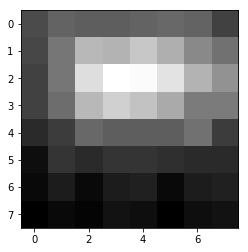

Spot reconstructed from gaussian fit parameters using sigma_min:


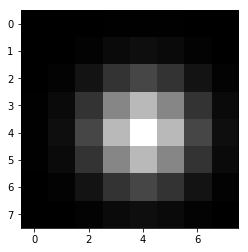

Spot reconstructed from gaussian fit parameters using sigma_max:


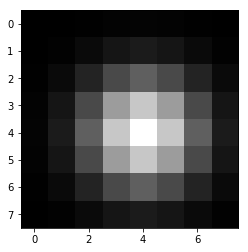

Original crop
[[36 41 40 40 41 42 41 34]
 [35 45 59 58 62 57 49 44]
 [34 45 67 74 73 68 58 51]
 [34 43 59 64 61 56 46 46]
 [29 33 42 40 40 40 44 33]
 [23 31 29 31 31 30 29 29]
 [22 26 22 26 27 22 26 27]
 [20 22 21 24 23 20 23 24]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  4  2  1  0]
 [ 0  1  5 14 20 14  5  1]
 [ 0  2 14 38 53 38 14  2]
 [ 0  4 20 53 74 53 20  4]
 [ 0  2 14 38 53 38 14  2]
 [ 0  1  5 14 20 14  5  1]
 [ 0  0  1  2  4  2  1  0]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  2  6  7  6  2  0]
 [ 0  2 10 21 27 21 10  2]
 [ 1  6 21 45 57 45 21  6]
 [ 1  7 27 57 74 57 27  7]
 [ 1  6 21 45 57 45 21  6]
 [ 0  2 10 21 27 21 10  2]
 [ 0  0  2  6  7  6  2  0]]


In [4]:
import math

margin = 4

print(str(len(coords)) + ' spots found by expert:\n')

for x, y in coords:
    print('\n---------------------------------------------------\n')
    
    x_min = int(x)-margin if int(x)-margin >= 0 else 0
    x_max = int(x)+margin if int(x)+margin < im.shape[1] else im.shape[1]-1
    y_min = int(y)-margin if int(y)-margin >= 0 else 0
    y_max = int(y)+margin if int(y)+margin < im.shape[0] else im.shape[0]-1

    crop = im[y_min:y_max, x_min:x_max]
    params = fitgaussian(crop)
    fit = gaussian(*params)
    (height, x_param, y_param, width_x, width_y) = params
    sigma_min = math.sqrt(min(width_x, width_y)/2)
    sigma_max = math.sqrt(max(width_x, width_y)/2)
    max_intensity = np.amax(crop)
    print('x:', x)
    print('y:', y)
    print('sigma_min:', sigma_min)
    print('sigma_max:', sigma_max)
    print('height:', height)
    print('max_intensity:', max_intensity)
    
    print('\n\nOriginal crop around spot at ' + str((int(x), int(y))) + ':')
    plt.figure()
    im_copy = crop
#     im_copy[int(y)-margin, int(x)-margin] = 1
    plt.imshow(im_copy, cmap='gray')
#     plt.xlim(x_min, x_max)
#     plt.ylim(y_min, y_max)
#     for coord in coords:
#         plt.scatter(x, y, color='y')
    plt.show()
    
    print('Spot reconstructed from gaussian fit parameters using sigma_min:')
    patch_sigma_min = np.zeros([margin*2, margin*2])
    for j in range(margin*2):
        for i in range(margin*2):
            x_dist = i - margin
            y_dist = j - margin
            exp_num = x_dist**2 + y_dist**2
            exp_den = 2*(sigma_min**2)
            exp_quantity = exp_num/exp_den
            value = max_intensity*np.exp(-exp_quantity)
            if (value < 0):
                value = 0
            patch_sigma_min[i][j] = value
    plt.figure()
    plt.imshow(patch_sigma_min, cmap='gray')
    plt.show()
    
    print('Spot reconstructed from gaussian fit parameters using sigma_max:')
    patch_sigma_max = np.zeros([margin*2, margin*2])
    for j in range(margin*2):
        for i in range(margin*2):
            x_dist = i - margin
            y_dist = j - margin
            exp_num = x_dist**2 + y_dist**2
            exp_den = 2*(sigma_max**2)
            exp_quantity = exp_num/exp_den
            value = max_intensity*np.exp(-exp_quantity)
            if (value < 0):
                value = 0
            patch_sigma_max[i][j] = value
    plt.figure()
    plt.imshow(patch_sigma_max, cmap='gray')
    plt.show()
    
    print('Original crop')
    print(im[y_min:y_max, x_min:x_max])
    print('Reconstructed using sigma min')
    print(patch_sigma_min.astype(int))
    print('Reconstructed using sigma max')
    print(patch_sigma_max.astype(int))
    


### Collect the sigma and intensity values.

In [5]:
import math

margin = 4

max_intensity_list = []
sigma_min_list = []
sigma_max_list = []

for x, y in coords:
    
    x_min = int(x)-margin if int(x)-margin >= 0 else 0
    x_max = int(x)+margin if int(x)+margin < im.shape[1] else im.shape[1]-1
    y_min = int(y)-margin if int(y)-margin >= 0 else 0
    y_max = int(y)+margin if int(y)+margin < im.shape[0] else im.shape[0]-1

    crop = im[y_min:y_max, x_min:x_max]
    params = fitgaussian(crop)
    fit = gaussian(*params)
    (height, x_param, y_param, width_x, width_y) = params
    sigma_min = math.sqrt(min(width_x, width_y)/2)
    sigma_max = math.sqrt(max(width_x, width_y)/2)
    max_intensity = np.amax(crop)

    max_intensity_list.append(max_intensity)
    sigma_min_list.append(sigma_min)
    sigma_max_list.append(sigma_max)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


### Visualize the distribution of max intensities and stdevs across all spots found by "expert"

Max intensity of spots marked by expert:
mean(max_intensity_list) = 177.64


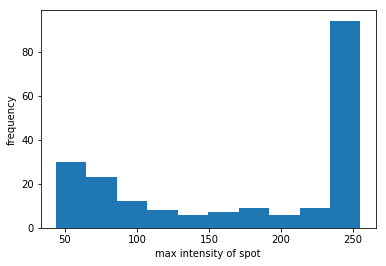

Stdev (along axis which minimizes stdev) of spots marked by expert:
mean(sigma_min_list) = 1.29


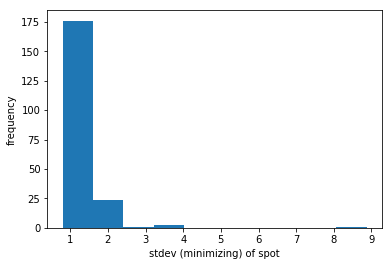

Stdev (along axis which maximizes stdev) of spots marked by expert:
mean(sigma_max_list) = 1.93


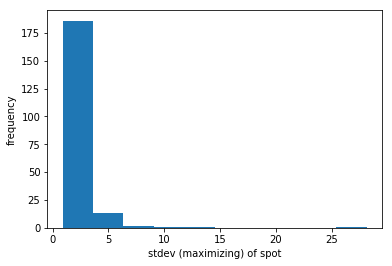

In [6]:
plt.figure()
plt.hist(max_intensity_list)
print('Max intensity of spots marked by expert:\nmean(max_intensity_list) = ' + str(round(np.mean(max_intensity_list), 2)))
plt.xlabel('max intensity of spot')
plt.ylabel('frequency')
plt.show()

plt.figure()
plt.hist(sigma_min_list)
print('Stdev (along axis which minimizes stdev) of spots marked by expert:\nmean(sigma_min_list) = ' + str(round(np.mean(sigma_min_list), 2)))
plt.xlabel('stdev (minimizing) of spot')
plt.ylabel('frequency')
plt.show()

plt.figure()
plt.hist(sigma_max_list)
print('Stdev (along axis which maximizes stdev) of spots marked by expert:\nmean(sigma_max_list) = ' + str(round(np.mean(sigma_max_list), 2)))
plt.xlabel('stdev (maximizing) of spot')
plt.ylabel('frequency')
plt.show()

In [7]:
print(min(sigma_min_list))
print(min(sigma_max_list))
print(max(sigma_min_list))
print(max(sigma_max_list))

0.796542729964953
0.8938715122225305
8.878159271417275
28.148162436692797
